<a href="https://colab.research.google.com/github/bala-supraja/CarMax/blob/main/CarMax's_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial EDA

**Problem Statement:**

CarMax is considering opening new stores in the United States. How should marketing and inventory strategy be approached to drive maximum sales depending on the location of the new store?

In [1]:
#import imp libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from matplotlib_venn import venn2

In [2]:
# Load the dataset
file = '/content/Fall 2024 Dataset (1).csv'
data = pd.read_csv(file, on_bad_lines='skip')

In [3]:
#To check how many observations are present in data
row_count = len(data)

print("Number of Observations:", row_count)

Number of Observations: 100000


In [ ]:
# converting the data in column 'purchase_flag' with values 'TRUE' to 1 and 'FALSE' to 0
# Strip whitespace and handle case sensitivity, then convert 'TRUE' to 1 and 'FALSE' to 0
data['purchase_flag'] = data['purchase_flag'].astype(str).str.strip().str.upper().apply(lambda x: 1 if x == 'TRUE' else 0)

# Display the updated dataframe
print(data.head(20))

    Unnamed: 0  campaign_a_touchpoints  campaign_b_touchpoints  \
0            0                      10                       0   
1            1                       0                       1   
2            2                       0                       5   
3            3                       0                       5   
4            4                       0                       0   
5            5                       0                       0   
6            6                       0                       0   
7            7                       0                       0   
8            8                       0                       0   
9            9                       0                       0   
10          10                       0                       3   
11          11                       0                       0   
12          12                       0                       0   
13          13                       0                       0   
14        

In [ ]:
# Display basic information about the dataset
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              100000 non-null  int64  
 1   campaign_a_touchpoints  100000 non-null  int64  
 2   campaign_b_touchpoints  100000 non-null  int64  
 3   campaign_c_touchpoints  100000 non-null  int64  
 4   total_touchpoints       100000 non-null  int64  
 5   num_web_visits          100000 non-null  int64  
 6   purchase_flag           100000 non-null  int64  
 7   vehicle_class           30003 non-null   object 
 8   finance_customer        100000 non-null  int64  
 9   service_plan_customer   100000 non-null  int64  
 10  trade_in_customer       100000 non-null  bool   
 11  state                   100000 non-null  object 
 12  unaided_awareness       100000 non-null  float64
dtypes: bool(1), float64(1), int64(9), object(2)
memory usage: 9.3

In [ ]:
# Check for missing values
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
Unnamed: 0                    0
campaign_a_touchpoints        0
campaign_b_touchpoints        0
campaign_c_touchpoints        0
total_touchpoints             0
num_web_visits                0
purchase_flag                 0
vehicle_class             69997
finance_customer              0
service_plan_customer         0
trade_in_customer             0
state                         0
unaided_awareness             0
dtype: int64


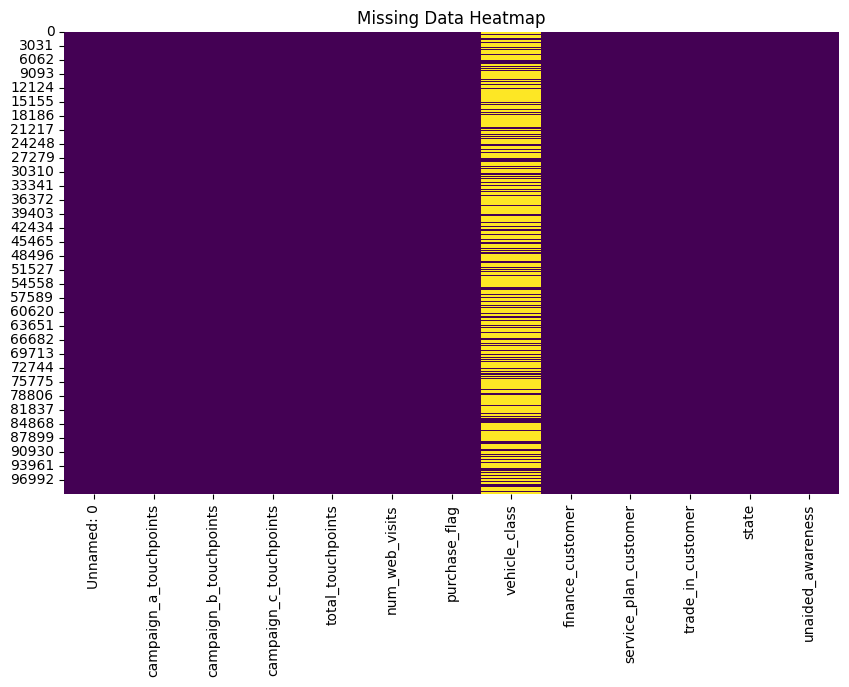

In [ ]:
# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

We observed that the 'vehicle_class' column has missing values because it represents the type of vehicle purchased. These values are only recorded when the 'purchase_flag' is equal to 1, indicating that a purchase has been made. In cases where no purchase occurs, the column remains empty.

In [ ]:
#To verify if there are any missing values in the 'vehicle_class' column when 'purchase_flag' equals 1 (i.e., when a purchase is made).
# Filter data for purchase_flag == 1
purchased_data = data[data['purchase_flag'] == 1]

# Check for missing values in the vehicle_class column
missing_vehicle_class_count = purchased_data['vehicle_class'].isna().sum()

# Total rows with purchase_flag == 1
total_purchases = purchased_data.shape[0]

# Display the results
print(f"Total Purchases (purchase_flag == 1): {total_purchases}")
print(f"Missing values in 'vehicle_class': {missing_vehicle_class_count}")

if missing_vehicle_class_count > 0:
    print(f"Percentage of missing values: {(missing_vehicle_class_count / total_purchases) * 100:.2f}%")
else:
    print("No missing values in 'vehicle_class'.")

Total Purchases (purchase_flag == 1): 30003
Missing values in 'vehicle_class': 0
No missing values in 'vehicle_class'.


This indicates that the 'vehicle_class' column remains empty when no purchase is made. However, it consistently contains values for all instances where a purchase has been made.

In [ ]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicates}")

Number of Duplicate Rows: 0


In [ ]:
# Summary statistics
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
          Unnamed: 0  campaign_a_touchpoints  campaign_b_touchpoints  \
count  100000.000000           100000.000000           100000.000000   
mean    49999.500000                0.185650                1.644060   
std     28867.657797                1.642355                4.329376   
min         0.000000                0.000000                0.000000   
25%     24999.750000                0.000000                0.000000   
50%     49999.500000                0.000000                0.000000   
75%     74999.250000                0.000000                1.000000   
max     99999.000000               95.000000               98.000000   

       campaign_c_touchpoints  total_touchpoints  num_web_visits  \
count           100000.000000      100000.000000   100000.000000   
mean                 0.179440           2.009150       25.875940   
std                  0.831365           4.710237       24.373602   
min                  0.000000           0.000000        1.0

In [ ]:
# Count the number of purchases (purchase_flag == 1)
purchase_counts = data['purchase_flag'][data['purchase_flag'] == 1].count()

# Count the number of non-purchases (purchase_flag == 0)
non_purchase_counts = data['purchase_flag'][data['purchase_flag'] == 0].count()

# Total number of entries in the dataset
total_entries = len(data)

# Display the results
print("Number of Purchases:", purchase_counts)
print("Number of Non-Purchases:", non_purchase_counts)
print("Total Entries:", total_entries)


Number of Purchases: 30003
Number of Non-Purchases: 69997
Total Entries: 100000


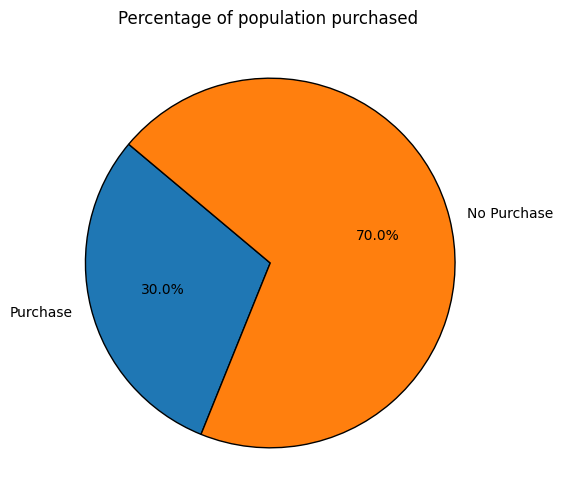

In [ ]:
# Count True and False values, handling string representations
true_count = data['purchase_flag'].apply(lambda x: x.lower() in ['true', '1'] if isinstance(x, str) else bool(x)).sum()  # Count True/TRUE/1 as True
false_count = len(data['purchase_flag']) - true_count  # Count of False values

# Calculate percentages
total = true_count + false_count
percentages = [true_count / total * 100, false_count / total * 100]

# Labels for the pie chart
labels = ['Purchase', 'No Purchase']

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    percentages,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={"edgecolor": "black"}
)
plt.title("Percentage of population purchased ")
plt.show()

Out of the entire population of observations, 30% have made a purchase at CarMax.

# Inventory Strategies

## Analysis by State

Now that we know the overall conversion percentage for our data, let’s analyze the conversion rates for each state to see if this pattern holds consistently across all states.

In [ ]:
# Total number of rows per state
total_rows = data['state'].value_counts()

# Number of purchases (purchase_flag = 1) per state
purchases_per_state = data[data['purchase_flag'] == 1]['state'].value_counts()

# Combine the two into a DataFrame
summary_table = pd.DataFrame({
    'state': total_rows.index,
    'number_of_observations': total_rows.values,
    'number_of_purchases': total_rows.index.map(
        lambda state: purchases_per_state.get(state, 0)  # Safely get counts or default to 0
    )
})

# Add conversion rate column
summary_table['conversion_rate (%)'] = (summary_table['number_of_purchases'] / summary_table['number_of_observations']) * 100

# Sort the table by conversion rate in descending order
summary_table = summary_table.sort_values(by='conversion_rate (%)', ascending=False)

# Display the sorted table
print(summary_table)

   state  number_of_observations  number_of_purchases  conversion_rate (%)
21    CT                    2439                  812            33.292333
39    CA                    2365                  769            32.515856
34    VA                    2385                  771            32.327044
13    SC                    2455                  788            32.097760
30    NV                    2397                  763            31.831456
31    CO                    2395                  759            31.691023
18    NM                    2448                  775            31.658497
38    MD                    2366                  748            31.614539
33    PA                    2386                  754            31.601006
2     FL                    2519                  791            31.401350
15    RI                    2453                  767            31.267835
16    GA                    2451                  764            31.170951
28    TN                 

<ipython-input-10-9edaa4807ddf>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




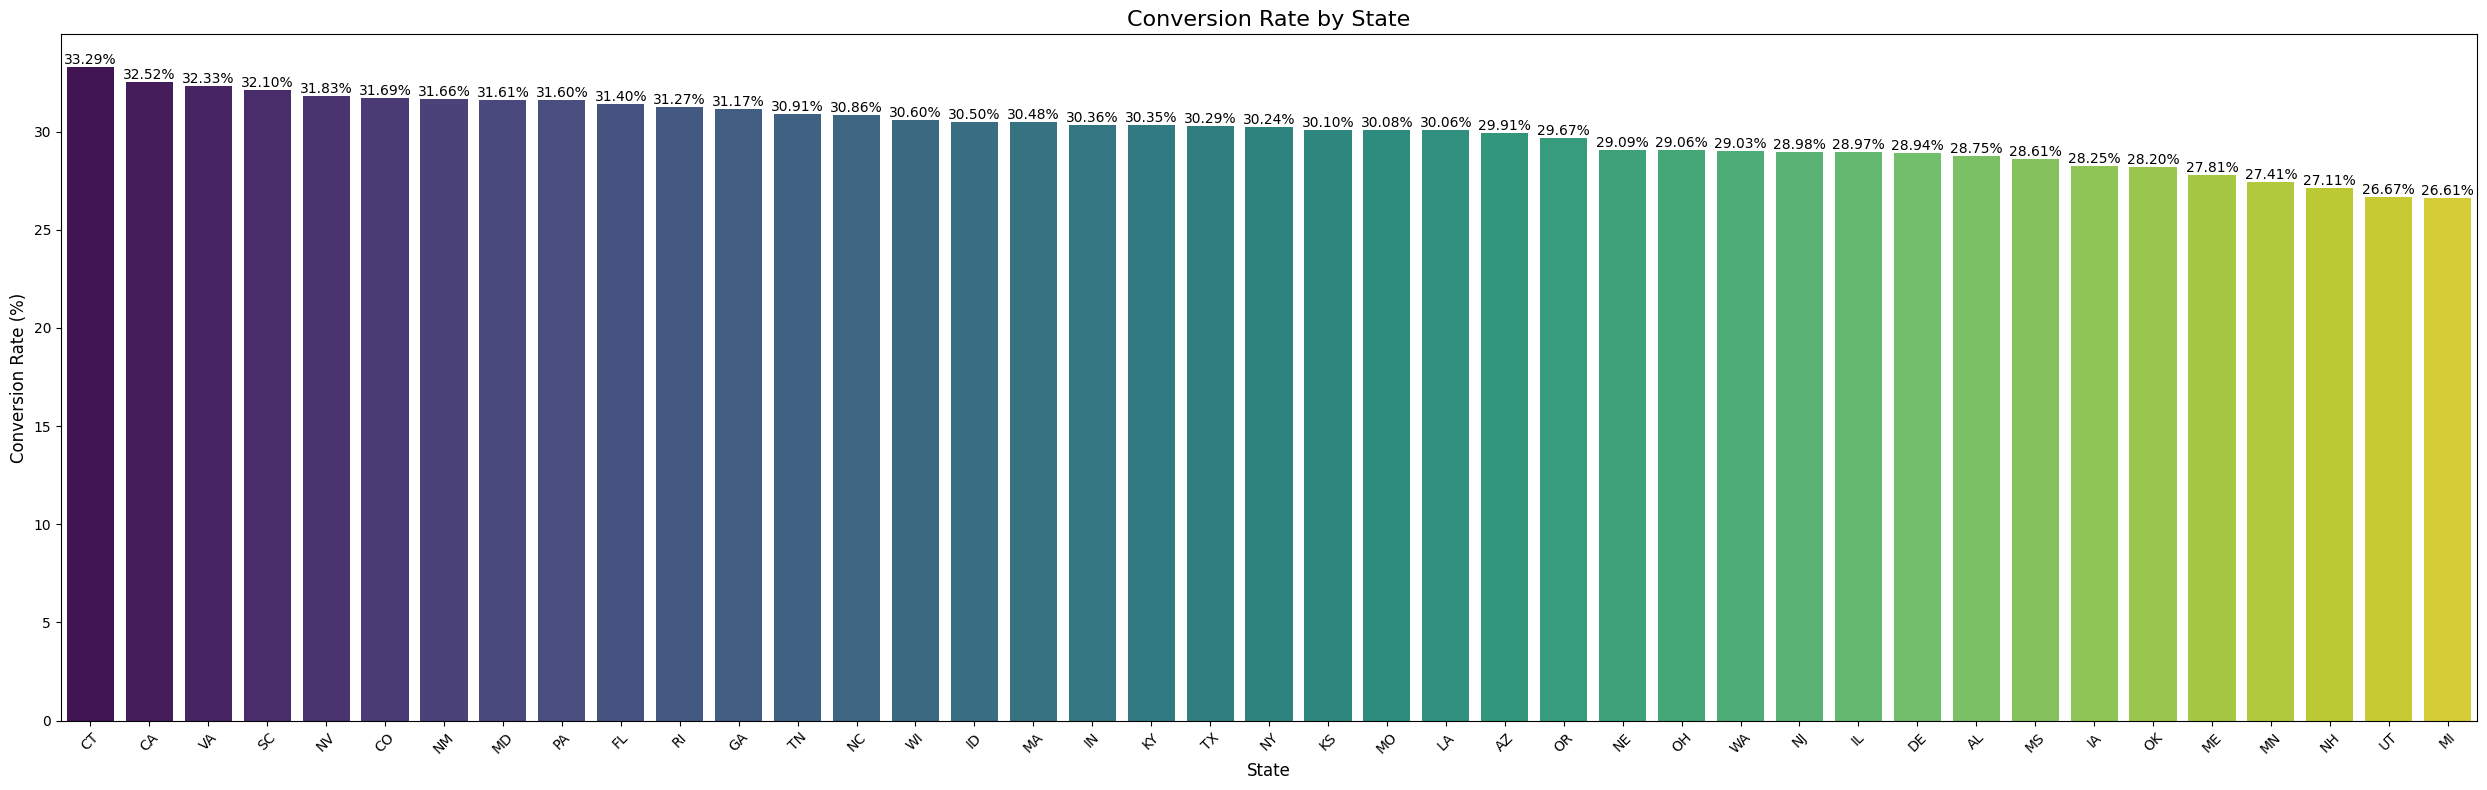

In [ ]:
# Bar plot Visualisation of conversion rate by state

# Sort the table by conversion rate in descending order
summary_table = summary_table.sort_values(by='conversion_rate (%)', ascending=False)

# Visualization
plt.figure(figsize=(25, 8))
ax = sns.barplot(
    data=summary_table,
    x='state',
    y='conversion_rate (%)',
    palette='viridis'
)

# Annotate percentages on top of each bar
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.2f}%",  # Format to 2 decimal places
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Add labels and title
plt.title('Conversion Rate by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Conversion Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

We observe that the conversion rate remains consistent at approximately 30% across all states, aligning closely with the overall conversion rate for the entire dataset. Although there are slight variations—Connecticut (CT) has the highest conversion rate at 33%, while Michigan (MI) records the lowest at 26%—these differences are relatively minor and still closely reflect the universal rate.

## Analysis by Type of car Purchased

Now, focusing on the 30% of the population that made a purchase, we aim to understand their preferences by analyzing the types of vehicles they chose.

<ipython-input-6-2b8bc932c2d6>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_purchases = counts.get(1, 0)
<ipython-input-6-2b8bc932c2d6>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


  types_of_cars  number_sold  percentage_share (%)
0     SMALL SUV         9903             33.006699
1    MEDIUM SUV         6023             20.074659
2       COMPACT         3240             10.798920
3        PICKUP         3221             10.735593
4        LUXURY         2709              9.029097
5      MID SIZE         2201              7.335933
6           VAN          889              2.963037
7    SPORTS CAR          712              2.373096
8     LARGE SUV          599              1.996467
9     FULL SIZE          506              1.686498


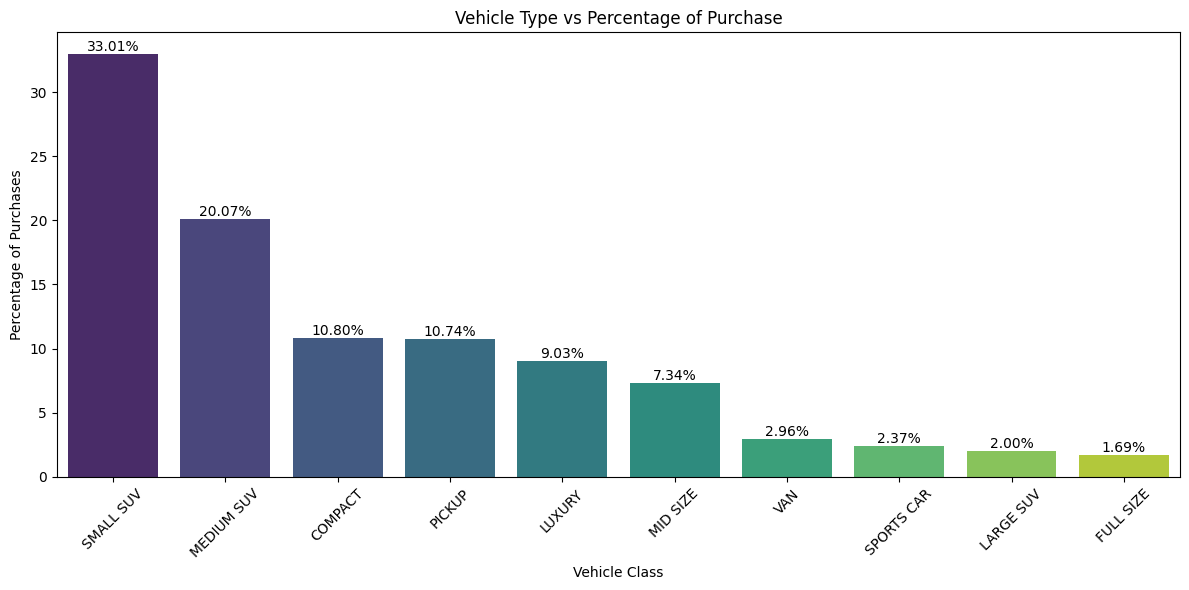

In [ ]:
# # Types of cars purchased when
# Filter only rows where purchase_flag is 1
purchased_vehicles = data[data['purchase_flag'] == 1]

# Count the number of each vehicle type
vehicle_counts = purchased_vehicles['vehicle_class'].value_counts()

# Count 'TRUE' and 'FALSE' values
counts = data['purchase_flag'].value_counts()

# Total purchases (from number of purchase-flag == 1)
total_purchases = counts.get(1, 0)

# Create a summary table
vehicle_summary_table = pd.DataFrame({
    'types_of_cars': vehicle_counts.index,
    'number_sold': vehicle_counts.values,
    'percentage_share (%)': (vehicle_counts.values / total_purchases) * 100
})

# Display the table
print(vehicle_summary_table)

# Visualizations for better understanding
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=vehicle_summary_table,
    x='types_of_cars',
    y='percentage_share (%)',
    palette='viridis'
)

# Annotate percentages above bars
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.2f}%",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Add labels and title
plt.title('Vehicle Type vs Percentage of Purchase')
plt.xlabel('Vehicle Class')
plt.ylabel('Percentage of Purchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Let's now look into each state if this purchase pattern is same for the state level

In [ ]:
# Understanding the Different Types of Cars Purchased Per State, Sorted in Descending Order of Purchase Percentage
# Filter only rows where purchase_flag is 1
purchased_vehicles = data[data['purchase_flag'] == 1]

# Group by state and vehicle_class to count purchases
state_vehicle_counts = purchased_vehicles.groupby(['state', 'vehicle_class']).size().reset_index(name='sale_per_state')

# Calculate total purchases per state
total_purchases_per_state = purchased_vehicles.groupby('state').size().reset_index(name='purchases_per_state')

# Merge total purchases into state_vehicle_counts
state_vehicle_counts = state_vehicle_counts.merge(total_purchases_per_state, on='state')

# Calculate the percentage for each vehicle type in a state
state_vehicle_counts['percentage_of_purchases'] = (state_vehicle_counts['sale_per_state'] / state_vehicle_counts['purchases_per_state']) * 100

# Sort data by state and descending percentage of purchases
state_vehicle_counts = state_vehicle_counts.sort_values(by=['state', 'percentage_of_purchases'], ascending=[True, False])

# Display the sorted results
print(state_vehicle_counts.head(30))

   state vehicle_class  sale_per_state  purchases_per_state  \
7     AL     SMALL SUV             188                  700   
4     AL    MEDIUM SUV             138                  700   
6     AL        PICKUP              97                  700   
5     AL      MID SIZE              72                  700   
3     AL        LUXURY              65                  700   
0     AL       COMPACT              59                  700   
1     AL     FULL SIZE              25                  700   
8     AL    SPORTS CAR              22                  700   
9     AL           VAN              19                  700   
2     AL     LARGE SUV              15                  700   
17    AZ     SMALL SUV             224                  736   
14    AZ    MEDIUM SUV             148                  736   
10    AZ       COMPACT              95                  736   
13    AZ        LUXURY              71                  736   
16    AZ        PICKUP              70                 

Let's look at the top 3 most purchased car types and least 3 least purchased car types across different states.

<ipython-input-13-80b94b522774>:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_vehicles_by_state = state_vehicle_counts.groupby('state', group_keys=False).apply(get_top_vehicles_by_state)


    state vehicle_class  Count
0      AL     SMALL SUV    188
1      AL    MEDIUM SUV    138
2      AL        PICKUP     97
3      AZ     SMALL SUV    224
4      AZ    MEDIUM SUV    148
..    ...           ...    ...
118    WA    MEDIUM SUV    126
119    WA       COMPACT     98
120    WI     SMALL SUV    314
121    WI    MEDIUM SUV    156
122    WI       COMPACT     70

[123 rows x 3 columns]


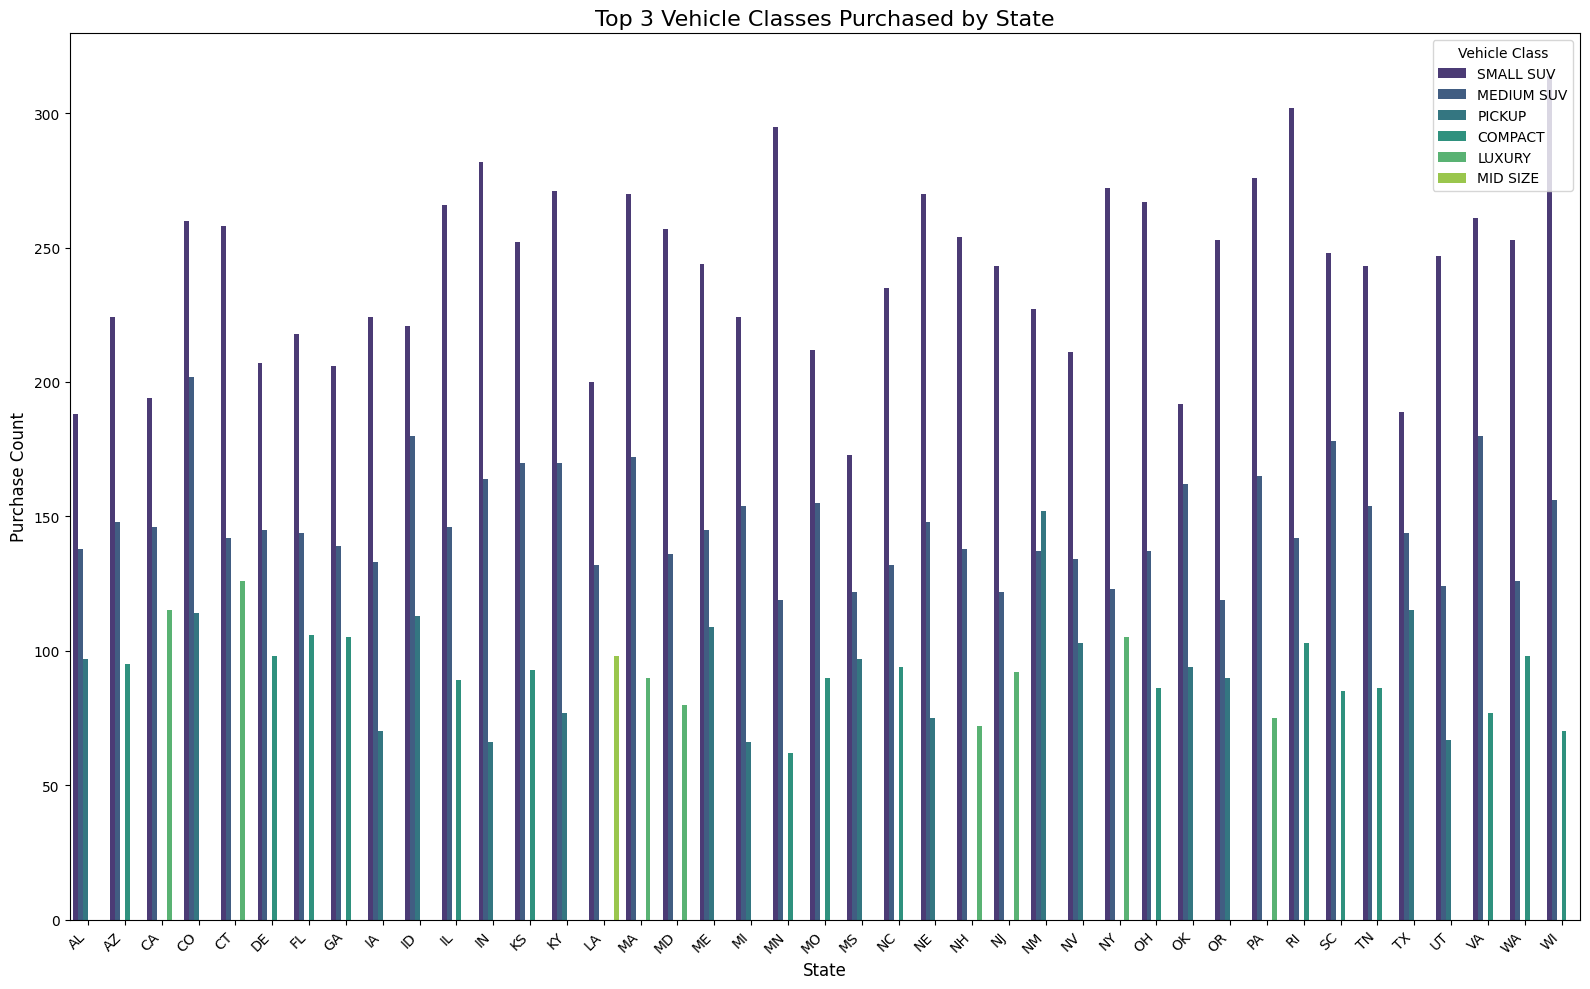

In [ ]:
# Filter data where purchase_flag == 1
purchased_data = data[data['purchase_flag'] == 1]

# Group by state and vehicle_class, and count the number of purchases
state_vehicle_counts = (
    purchased_data.groupby(['state', 'vehicle_class'])
    .size()
    .reset_index(name='Count')
)

# Sort by state and count in descending order
state_vehicle_counts = state_vehicle_counts.sort_values(by=['state', 'Count'], ascending=[True, False])

# Get the top three vehicles for each state
def get_top_vehicles_by_state(group):
    return group.nlargest(3, 'Count')

top_vehicles_by_state = state_vehicle_counts.groupby('state', group_keys=False).apply(get_top_vehicles_by_state)

# Reset index for cleaner presentation
top_vehicles_by_state.reset_index(drop=True, inplace=True)

# Display the result
print(top_vehicles_by_state)

# Visualization of Top 3 Vehicle Classes by State
plt.figure(figsize=(16, 10))

# Create a bar plot
sns.barplot(
    data=top_vehicles_by_state,
    x='state',
    y='Count',
    hue='vehicle_class',
    palette='viridis'
)

# Add labels and title
plt.title('Top 3 Vehicle Classes Purchased by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Purchase Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Vehicle Class', loc='upper right')
plt.tight_layout()

# Show the plot
plt.show()

When analyzing the top most purchased car types, Small SUVs and Medium SUVs consistently occupy the top two positions across all states. This trend highlights the universal preference for these vehicle classes, regardless of regional variations.

While the third position varies across states, it is dominated by vehicle types such as Pickup trucks, Compact cars, Luxury cars, and Mid-size cars depending on the region. This suggests that there is still notable demand for these car types, though it is more state-specific.

By emphasizing consistent high-demand vehicles like Small and Medium SUVs while fine-tuning the stock of third-position vehicles based on state-specific needs, CarMax can optimize its inventory strategy to enhance customer satisfaction and increase sales.

<ipython-input-12-311310052dd4>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  least_sold_per_state = state_vehicle_counts.groupby('state', group_keys=False).apply(least_sold_vehicles)


3 Least Sold Vehicles Per State:
    state vehicle_class  Count
2      AL     LARGE SUV     15
9      AL           VAN     19
8      AL    SPORTS CAR     22
19     AZ           VAN     10
11     AZ     FULL SIZE     13
..    ...           ...    ...
391    WA     FULL SIZE     12
398    WA    SPORTS CAR     14
402    WI     LARGE SUV      7
401    WI     FULL SIZE     10
408    WI    SPORTS CAR     12

[123 rows x 3 columns]


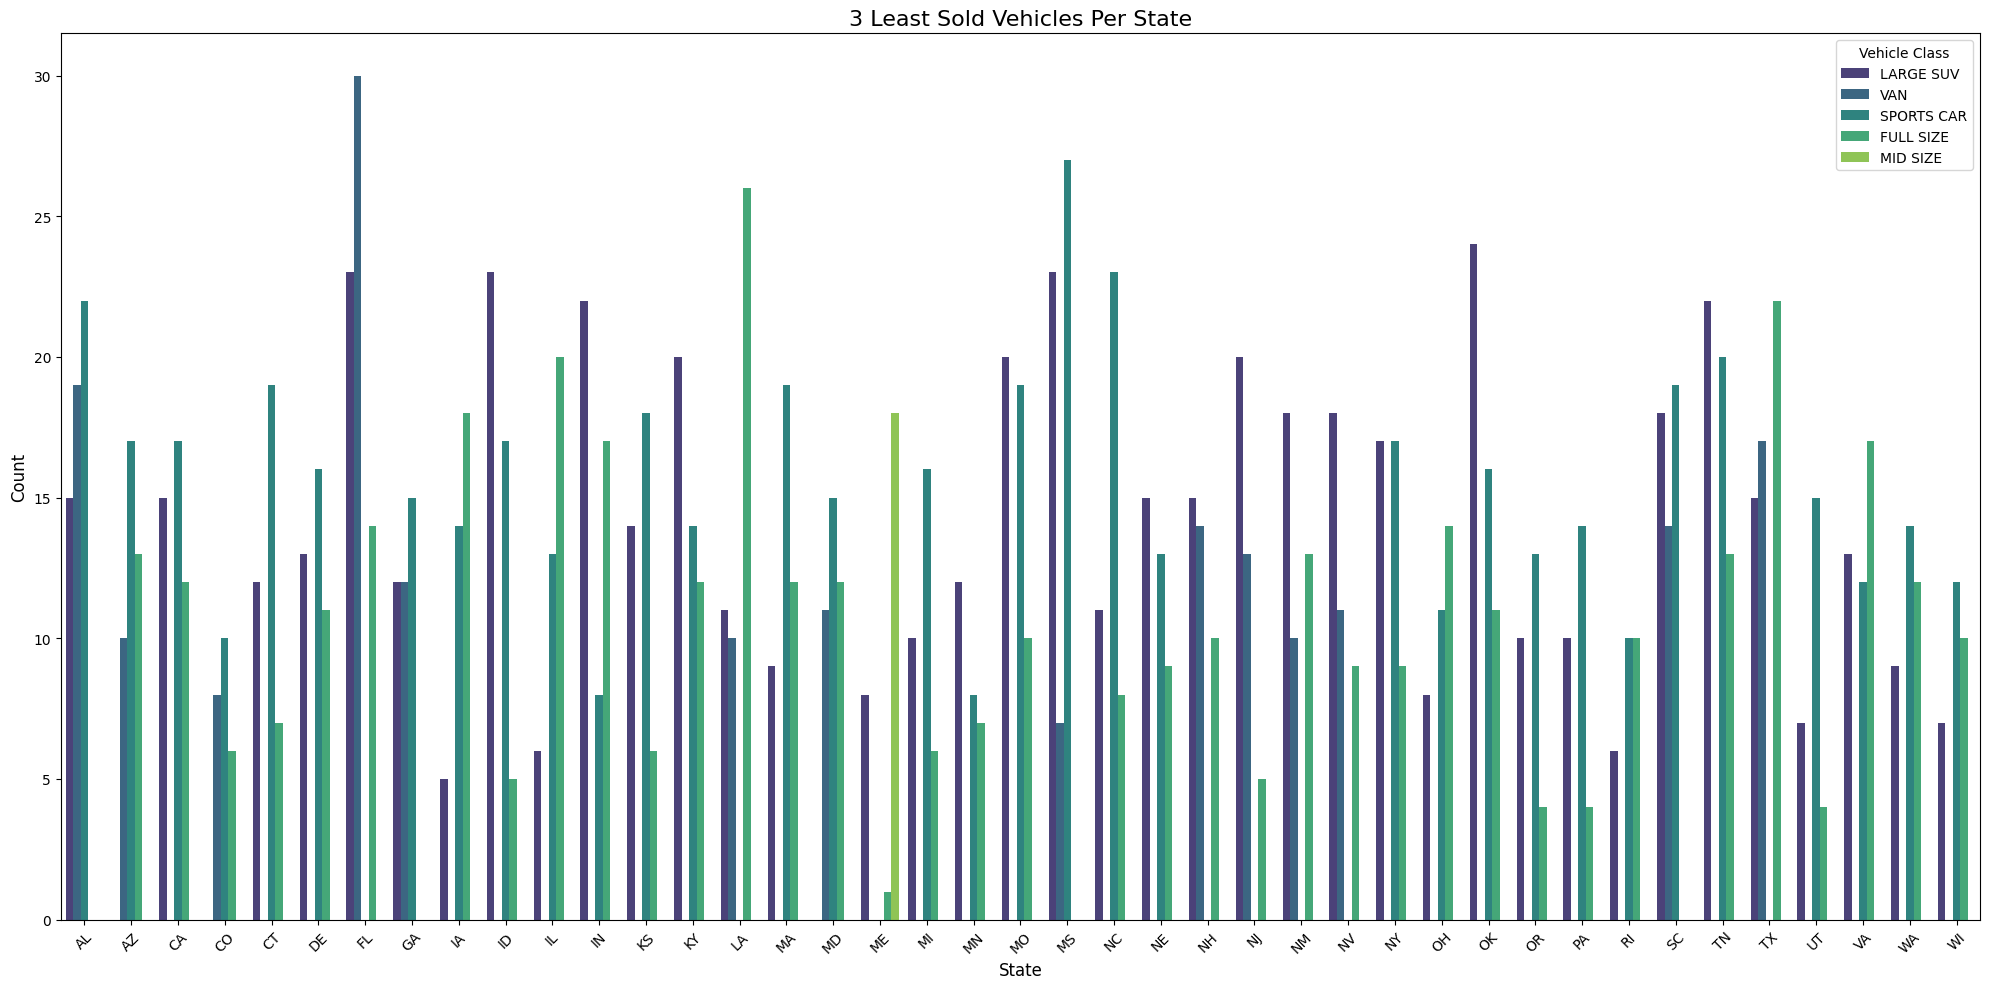

In [ ]:
# Group by state and vehicle_class, count the number of purchases
state_vehicle_counts = data.groupby(['state', 'vehicle_class']).size().reset_index(name='Count')

# Get the 3 least sold vehicle types per state
def least_sold_vehicles(state_group):
    return state_group.nsmallest(3, 'Count')

least_sold_per_state = state_vehicle_counts.groupby('state', group_keys=False).apply(least_sold_vehicles)

# Display the result
print("3 Least Sold Vehicles Per State:")
print(least_sold_per_state)

# Visualization
plt.figure(figsize=(20, 10))

# Create a barplot
sns.barplot(
    data=least_sold_per_state,
    x='state',
    y='Count',
    hue='vehicle_class',
    dodge=True,
    palette='viridis'
)

# Add labels and title
plt.title('3 Least Sold Vehicles Per State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Vehicle Class', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

When analyzing the least sold car types across different states, we observe that the bottom-performing vehicles consistently fall within the following categories:
Large SUV, Van, Sports Car, Full Size, and Mid Size.
The least sold combinations vary by state, with different groupings of these five car types occupying the bottom three positions.

But on a high level, the inventory strategies based on 'vehicle_class' can be standardized across all states. This is because the characteristics and purchasing patterns of each state align with the overall trends observed when considering all states collectively.

## Analysis by Type of payment (Financed or Outright)

Finance_customer: Weather a purchaser financed their vehicle (1) or purchased it right out (0)


  Customer Type  Count  Percentage
0      Financed  22357   74.515882
1      Outright   7646   25.484118
Car Purchases: 30003


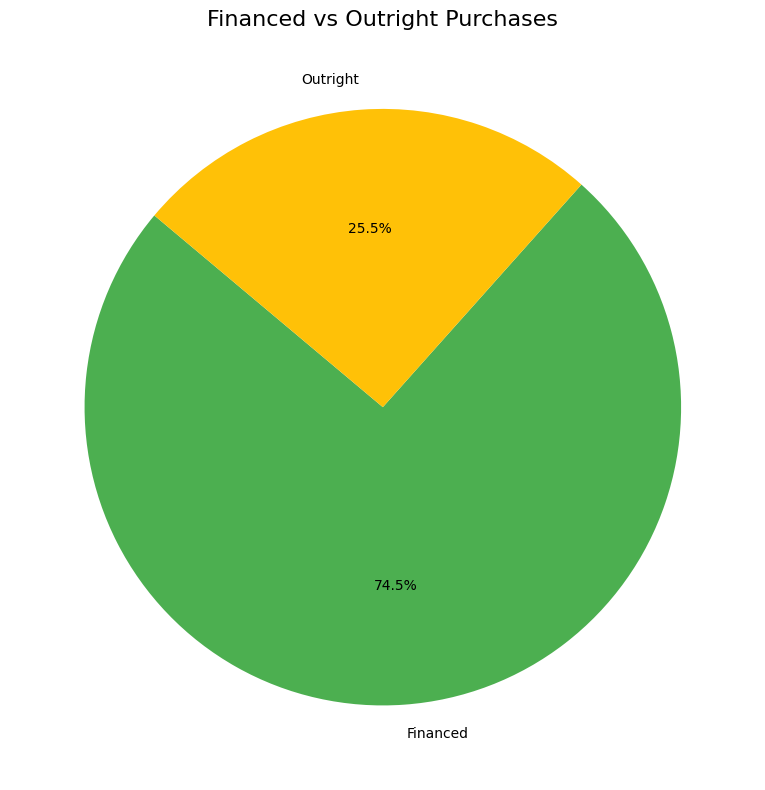

In [ ]:
purchased_data = data[data['purchase_flag'] == 1]

# Count Finance and Outright customers
finance_counts = purchased_data['finance_customer'].value_counts()

# Create a summary table
finance_summary = pd.DataFrame({
    'Customer Type': ['Financed', 'Outright'],
    'Count': [finance_counts.get(1, 0), finance_counts.get(0, 0)],
    'Percentage': [
        (finance_counts.get(1, 0) / len(purchased_data)) * 100,
        (finance_counts.get(0, 0) / len(purchased_data)) * 100
    ]
})

# Display the summary
print(finance_summary)
print("Car Purchases:", len(purchased_data))

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    finance_summary['Count'],
    labels=finance_summary['Customer Type'],
    autopct='%1.1f%%',
    startangle=140,
    colors=['#4CAF50', '#FFC107']  # Example colors for better differentiation
)

# Add title
plt.title('Financed vs Outright Purchases', fontsize=16)
plt.tight_layout()

# Show the chart
plt.show()

This visualization shows that, among the purchases made, 25% were bought outright, while 75% were financed.

Let's see if this papttern is consistant through different states:

In [ ]:
# Filter rows where purchase_flag is 1
purchased_data = data[data['purchase_flag'] == 1]

# Group by state and finance_customer to count financed and outright purchases
state_finance_counts = purchased_data.groupby(['state', 'finance_customer']).size().reset_index(name='Count')

# Add a column for Customer Type (Financed/Outright)
state_finance_counts['Customer_Type'] = state_finance_counts['finance_customer'].replace({1: 'Financed', 0: 'Outright'})

# Reshape the data into a pivot table for a cleaner view
result_table = state_finance_counts.pivot(index='state', columns='Customer_Type', values='Count').fillna(0).reset_index()

# Add a column for total purchases
result_table['Total Purchases'] = result_table['Financed'] + result_table['Outright']

# Add columns for percentages
result_table['Percentage Financed (%)'] = (result_table['Financed'] / result_table['Total Purchases']) * 100
result_table['Percentage Outright (%)'] = (result_table['Outright'] / result_table['Total Purchases']) * 100

# Sort the table by "Percentage Financed (%)" in descending order
result_table = result_table.sort_values(by='Percentage Financed (%)', ascending=False).reset_index(drop=True)

# Display the updated table
print(result_table)

Customer_Type state  Financed  Outright  Total Purchases  \
0                MS       585       117              702   
1                DE       564       127              691   
2                PA       614       140              754   
3                GA       607       157              764   
4                LA       602       158              760   
5                CA       607       162              769   
6                TX       591       158              749   
7                MD       587       161              748   
8                MN       520       145              665   
9                CT       633       179              812   
10               AL       545       155              700   
11               RI       596       171              767   
12               OH       552       160              712   
13               IN       574       167              741   
14               FL       606       185              791   
15               OR       532       165 

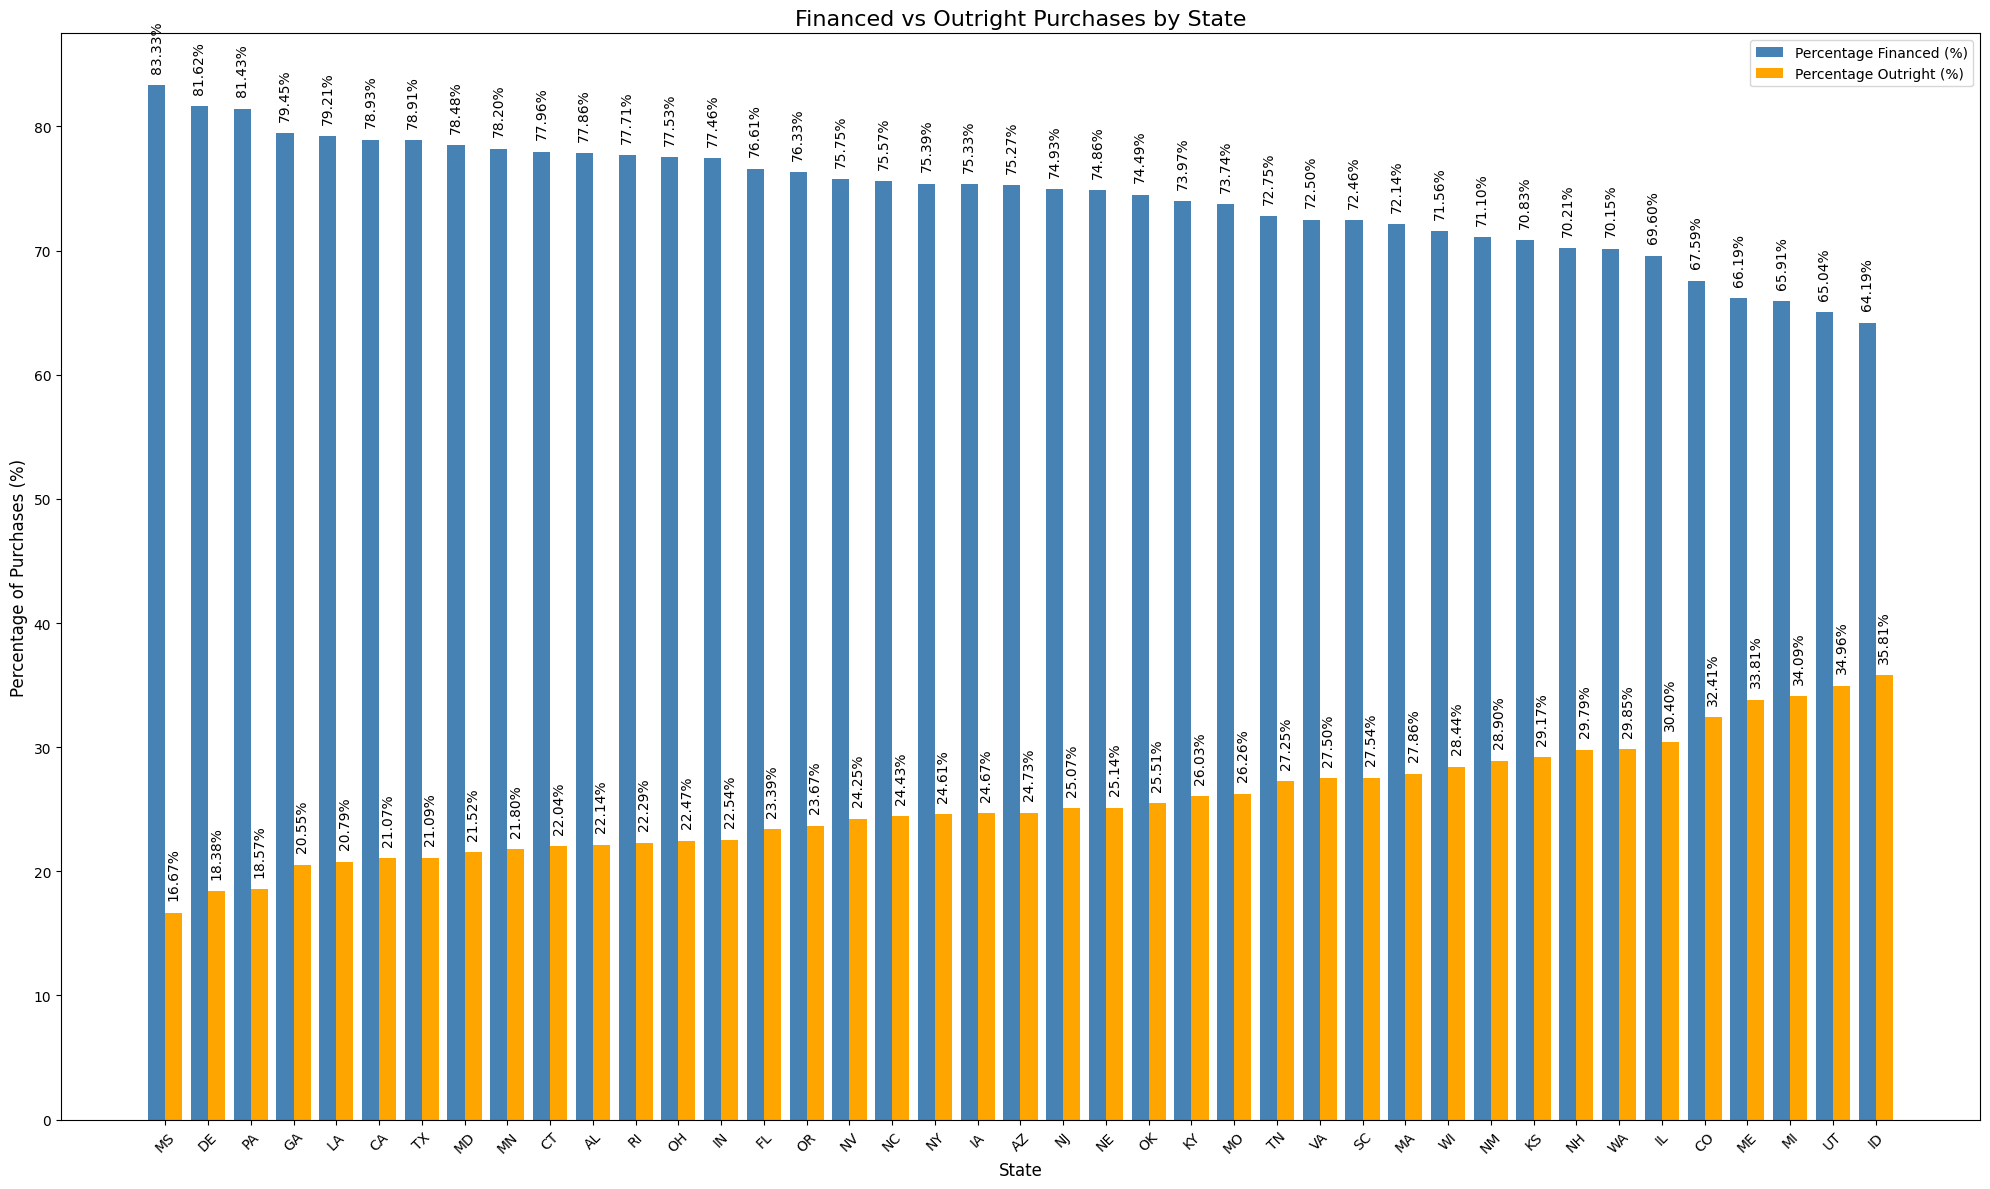

In [ ]:
#Visualizing the percentages

# Sort the result_table by "Percentage Financed (%)" in descending order
sorted_table = result_table.sort_values(by='Percentage Financed (%)', ascending=False)

# Data preparation after sorting
states = sorted_table['state']
financed_percentages = sorted_table['Percentage Financed (%)']
outright_percentages = sorted_table['Percentage Outright (%)']

# Grouped bar chart for percentages
bar_width = 0.4
indices = np.arange(len(states))

plt.figure(figsize=(20, 12))

# Plot percentages
plt.bar(indices - bar_width / 2, financed_percentages, bar_width, label='Percentage Financed (%)', color='steelblue')
plt.bar(indices + bar_width / 2, outright_percentages, bar_width, label='Percentage Outright (%)', color='orange')

# Annotate percentages vertically on top of bars
for i, val in enumerate(financed_percentages):
    plt.text(indices[i] - bar_width / 2, val + 1, f"{val:.2f}%", ha='center', va='bottom', fontsize=10, rotation=90)
for i, val in enumerate(outright_percentages):
    plt.text(indices[i] + bar_width / 2, val + 1, f"{val:.2f}%", ha='center', va='bottom', fontsize=10, rotation=90)

# Add labels and title
plt.xlabel('State', fontsize=12)
plt.ylabel('Percentage of Purchases (%)', fontsize=12)
plt.title('Financed vs Outright Purchases by State', fontsize=16)
plt.xticks(indices, states, rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

When we analyze the percentages of financed and outright payments across the states, we notice significant variations compared to the overall data. The pie chart for the overall dataset indicates that 25% of all purchases are outright, while 75% are financed. However, these percentages vary widely across states.

For instance:

Mississippi (MS) has the lowest percentage of outright purchases at 16%, indicating a strong preference for financed purchases in this state.

Idaho (ID) records the highest percentage of outright purchases at 35%, showcasing a significantly higher inclination for outright payments compared to other states.

Despite state-level variations, financed purchases consistently account for the majority of transactions

In [ ]:
#Understanding Financed Payments over different states using US-density Map
# Filter rows where purchase_flag is 1 and finance_customer == 1 (Financed)
financed_data = purchased_data[purchased_data['finance_customer'] == 1]

# Group by state to count financed purchases
financed_counts = financed_data.groupby('state').size().reset_index(name='Financed Count')


# Filter rows where purchase_flag is 1 and finance_customer == 1 (Financed)
financed_data = purchased_data[purchased_data['finance_customer'] == 1]

# Group by state to count financed purchases
financed_counts = financed_data.groupby('state').size().reset_index(name='Financed Count')

# US Map Visualization for Financed Purchases
fig = px.choropleth(
    financed_counts,
    locations='state',  # State abbreviations
    locationmode='USA-states',  # Match state abbreviations to US states
    color='Financed Count',  # Column to use for color intensity
    color_continuous_scale=px.colors.sequential.Plasma_r,  # Purple-to-Yellow gradient
    scope='usa',  # Limit the map to the US
    title='Density of Financed Purchases by State',
    labels={'Financed Count': 'Financed Purchases'}  # Legend label
)

# Update layout for better visualization
fig.update_layout(
    title_text='Density of Financed Purchases by State',
    title_x=0.5,
    geo=dict(
        lakecolor="rgb(255, 255, 255)"  # Set lake color
    )
)

# Show the map
fig.show()

In [ ]:
#Understanding Outright Payments over different states using US-density Map
# Filter rows where purchase_flag is 1 and finance_customer == 0 (Outright)
outright_data = purchased_data[purchased_data['finance_customer'] == 0]

# Group by state to count outright purchases
outright_counts = outright_data.groupby('state').size().reset_index(name='Outright Count')


# Filter rows where purchase_flag is 1 and finance_customer == 0 (Outright)
outright_data = purchased_data[purchased_data['finance_customer'] == 0]

# Group by state to count outright purchases
outright_counts = outright_data.groupby('state').size().reset_index(name='Outright Count')

# US Map Visualization for Outright Purchases
fig = px.choropleth(
    outright_counts,
    locations='state',  # State abbreviations
    locationmode='USA-states',  # Match state abbreviations to US states
    color='Outright Count',  # Column to use for color intensity
    color_continuous_scale=px.colors.sequential.Plasma_r,  # Purple-to-Yellow gradient
    scope='usa',  # Limit the map to the US
    title='Density of Outright Purchases by State',
    labels={'Outright Count': 'Outright Purchases'}  # Legend label
)

# Update layout for better visualization
fig.update_layout(
    title_text='Density of Outright Purchases by State',
    title_x=0.5,
    geo=dict(
        lakecolor="rgb(255, 255, 255)"  # Set lake color
    )
)

# Show the map
fig.show()

From these graphs, we observe that southern states are more inclined toward financing their purchases, whereas northern states show a higher tendency for outright payments. This provides a high-level insight, as the overall percentage of outright purchases across all states averages around 26%, with financing remaining the preferred method for the majority of purchases.

Let's now examine the types of cars purchased under the two payment methods: financed and outright.

In [ ]:
#
# Filter rows where purchase_flag is 1
purchased_data = data[data['purchase_flag'] == 1]

# Group data by finance_customer (Financed or Outright) and vehicle_class
grouped_data = purchased_data.groupby(['finance_customer', 'vehicle_class']).size().reset_index(name='Count')

# Calculate total counts for each finance_customer type (Financed/Outright)
total_counts = purchased_data.groupby('finance_customer').size().reset_index(name='Total_Count')

# Merge total counts with grouped data
grouped_data = grouped_data.merge(total_counts, on='finance_customer')

# Calculate percentage of each vehicle type within financed or outright
grouped_data['Percentage'] = (grouped_data['Count'] / grouped_data['Total_Count']) * 100

# Add a column for Customer Type (Financed/Outright)
grouped_data['Customer_Type'] = grouped_data['finance_customer'].replace({1: 'Financed', 0: 'Outright'})

# Final table with required columns sorted by descending Percentage
result_table = grouped_data[['Customer_Type', 'vehicle_class', 'Count', 'Percentage']].sort_values(by=['Customer_Type', 'Percentage'], ascending=[True, False])

# Display the table
print(result_table)

   Customer_Type vehicle_class  Count  Percentage
17      Financed     SMALL SUV   7422   33.197656
14      Financed    MEDIUM SUV   4451   19.908753
10      Financed       COMPACT   2408   10.770676
16      Financed        PICKUP   2366   10.582815
13      Financed        LUXURY   2046    9.151496
15      Financed      MID SIZE   1653    7.393657
19      Financed           VAN    645    2.885002
18      Financed    SPORTS CAR    530    2.370622
12      Financed     LARGE SUV    449    2.008320
11      Financed     FULL SIZE    387    1.731001
7       Outright     SMALL SUV   2481   32.448339
4       Outright    MEDIUM SUV   1572   20.559770
6       Outright        PICKUP    855   11.182318
0       Outright       COMPACT    832   10.881507
3       Outright        LUXURY    663    8.671201
5       Outright      MID SIZE    548    7.167146
9       Outright           VAN    244    3.191211
8       Outright    SPORTS CAR    182    2.380330
2       Outright     LARGE SUV    150    1.961810


<ipython-input-76-3522f066c4cd>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




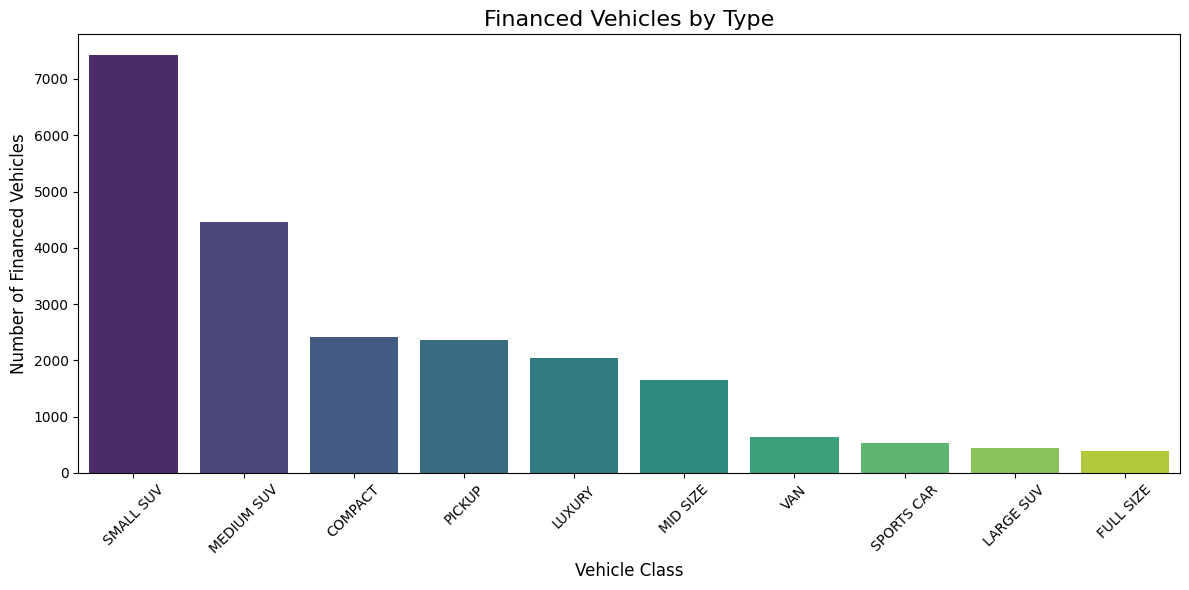

<ipython-input-76-3522f066c4cd>:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




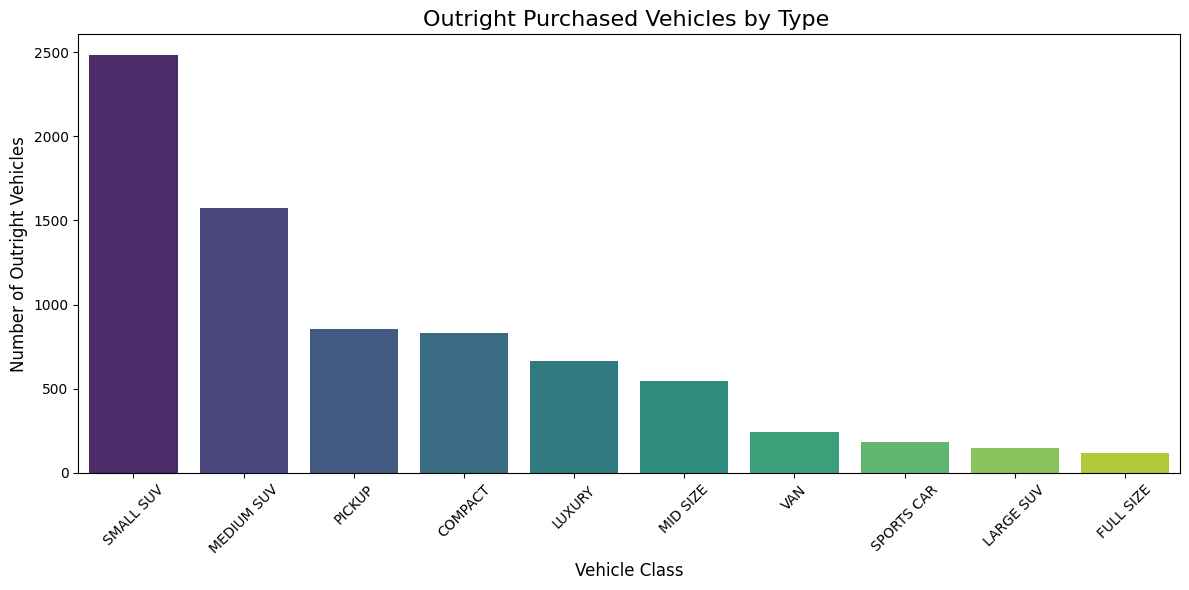

In [ ]:
# Filter rows where purchase_flag is 1
purchased_data = data[data['purchase_flag'] == 1]

# ----> Changed this part <----
# Group data by finance_customer (Financed or Outright) and vehicle_class
#Calculate financed_counts with vehicle_class included:
financed_counts = purchased_data[purchased_data['finance_customer'] == 1].groupby('vehicle_class').size().reset_index(name='Financed Count')
outright_counts = purchased_data[purchased_data['finance_customer'] == 0].groupby('vehicle_class').size().reset_index(name='Count')


# Sort data by 'Financed Count' in descending order for visualization
financed_counts_sorted = financed_counts.sort_values(by='Financed Count', ascending=False)

# Visualization for Financed Vehicles
plt.figure(figsize=(12, 6))
sns.barplot(
    data=financed_counts_sorted,
    x='vehicle_class',
    y='Financed Count',
    palette='viridis'
)

# Add labels and title
plt.title('Financed Vehicles by Type', fontsize=16)
plt.xlabel('Vehicle Class', fontsize=12)
plt.ylabel('Number of Financed Vehicles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


# Sort data by Count in descending order for visualization
outright_counts_sorted = outright_counts.sort_values(by='Count', ascending=False)

# Visualization for Outright Vehicles
plt.figure(figsize=(12, 6))
sns.barplot(
    data=outright_counts_sorted,
    x='vehicle_class',
    y='Count',
    palette='viridis'
)

# Add labels and title
plt.title('Outright Purchased Vehicles by Type ', fontsize=16)
plt.xlabel('Vehicle Class', fontsize=12)
plt.ylabel('Number of Outright Vehicles', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

We observe a slight difference in the third most purchased vehicle type between the two payment methods. For financed purchases, the third position is occupied by Compact vehicles, while for outright purchases, it is Pickup trucks. However, when examining the visualizations, the bar sizes for Compact and Pickup vehicles appear nearly identical, indicating that both are equally preferred.  

At a high level, we notice a consistent pattern across both financed and outright payment methods, aligning with the overall trends observed in the entire dataset. In all cases, Small SUVs and Medium SUVs remain the most purchased vehicle types.


The similarity in purchasing patterns for financed and outright vehicles suggests that customer preferences remain stable regardless of the purchasing method. This insight can help streamline inventory and marketing strategies, focusing efforts on the most popular vehicle classes, such as Small and Medium SUVs.

We notice that when analyzing state-wise data for financed and outright customers to understand the types of cars purchased, the sequence remains consistent with the overall data.
This consistency indicates that customer preferences for vehicle types are uniform across states and purchasing methods.

As a result:

Inventory Strategies can be standardized across states, focusing on maintaining sufficient stock of Small SUVs and Medium SUVs, which dominate purchases for both financed and outright buyers.

Marketing Efforts can emphasize the features and benefits of these vehicle types, catering to a wide audience and leveraging their universal popularity.

## Analysis by Service plan customers

Number of customers: 30003
Number of customers who bought a service plan: 18267
Percentage of customers who bought a service plan: 60.883911608839114


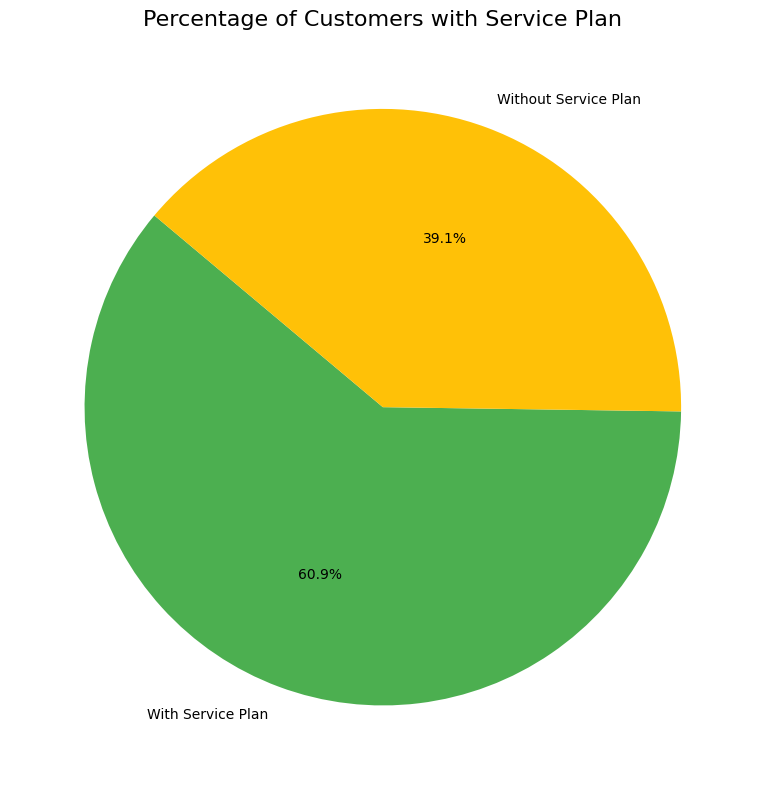

In [ ]:
# Filter rows where purchase_flag is 1
purchased_customers = data[data['purchase_flag'] == 1]

# Count the number of customers who bought a service plan
service_plan_count = purchased_customers['service_plan_customer'].sum()
purchased_count = purchased_customers['purchase_flag'].sum()
service_plan_percent = (service_plan_count / purchased_count)* 100

# Display the result
print(f"Number of customers: {purchased_count}")
print(f"Number of customers who bought a service plan: {service_plan_count}")
print(f"Percentage of customers who bought a service plan: {service_plan_percent}")

# Data for visualization
labels = ['With Service Plan', 'Without Service Plan']
sizes = [service_plan_count, purchased_count - service_plan_count]
colors = ['#4CAF50', '#FFC107']

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

# Add title
plt.title('Percentage of Customers with Service Plan', fontsize=16)
plt.tight_layout()

# Show the chart
plt.show()

61% of customers who made a purchase also opted for a service plan. Let’s examine whether this pattern remains consistent across different scenarios.  

Let's start with analyzing if this trend holds true across all states.


In [ ]:
# Filter rows where purchase_flag is 1
purchased_customers = data[data['purchase_flag'] == 1]

# Count the number of service plans bought and total purchases per state
service_plan_counts = purchased_customers.groupby('state')['service_plan_customer'].sum().reset_index(name='Service Plans Bought')
total_purchases_counts = purchased_customers.groupby('state')['purchase_flag'].count().reset_index(name='Total Purchases')

# Merge the two datasets
summary_table = service_plan_counts.merge(total_purchases_counts, on='state')

# Add a column for percentage of people getting a service plan
summary_table['Percentage with Service Plan (%)'] = (summary_table['Service Plans Bought'] / summary_table['Total Purchases']) * 100

# Sort by the number of service plans bought in descending order
summary_table = summary_table.sort_values(by='Service Plans Bought', ascending=False).reset_index(drop=True)

# Display the tabular data
print(summary_table)

   state  Service Plans Bought  Total Purchases  \
0     NV                   533              763   
1     CT                   530              812   
2     GA                   520              764   
3     PA                   515              754   
4     CA                   493              769   
5     NC                   491              745   
6     KS                   486              761   
7     LA                   485              760   
8     FL                   481              791   
9     TX                   480              749   
10    KY                   480              749   
11    MD                   479              748   
12    CO                   474              759   
13    SC                   470              788   
14    TN                   470              745   
15    IN                   463              741   
16    WA                   462              727   
17    NM                   457              775   
18    MS                   454 

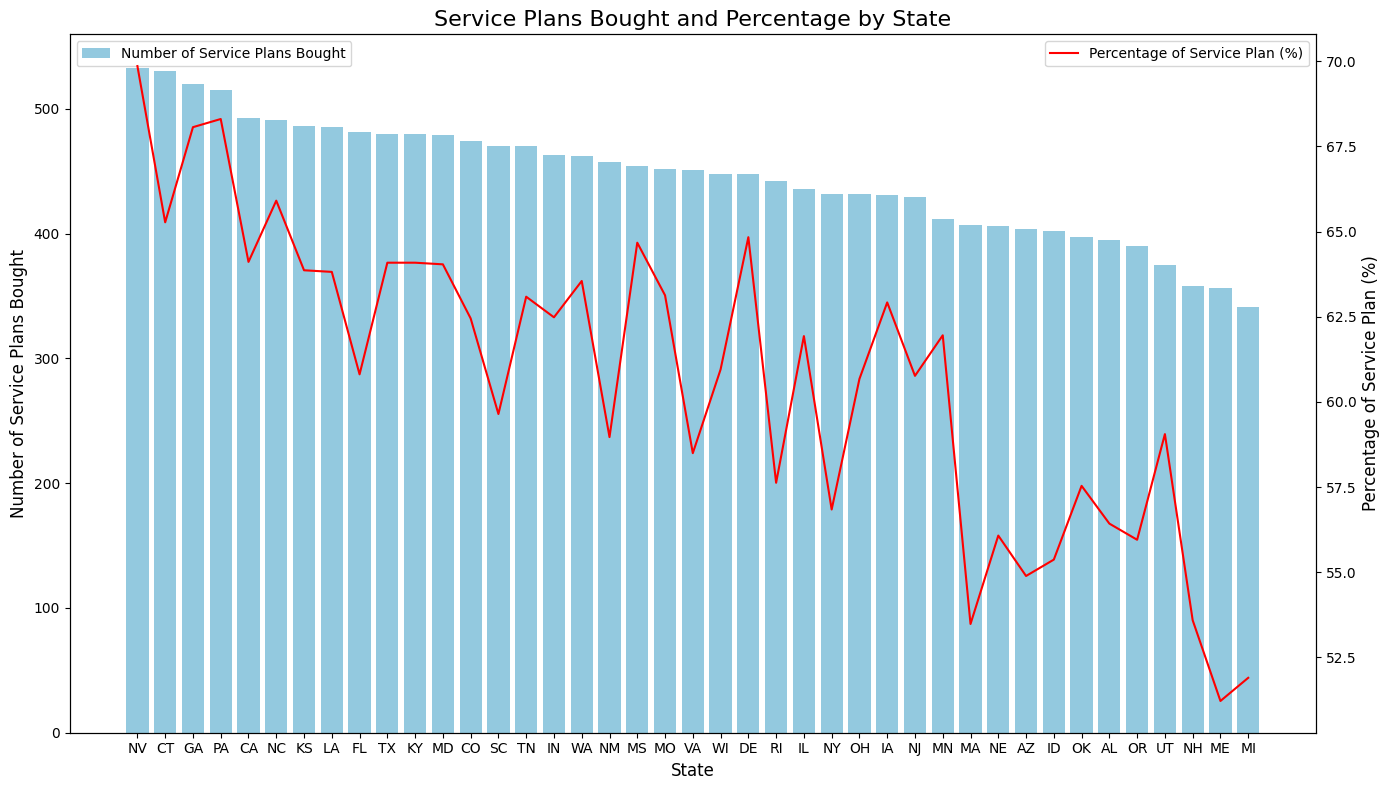

In [ ]:
# Plot setup
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for the number of service plans bought
sns.barplot(
    x='state',
    y='Service Plans Bought',
    data=summary_table,
    ax=ax1,
    color='skyblue',
    label='Number of Service Plans Bought'
)

# Adding a secondary y-axis for percentage
ax2 = ax1.twinx()
sns.lineplot(
    x='state',
    y='Percentage with Service Plan (%)',
    data=summary_table,
    ax=ax2,
    color='red',
    label='Percentage of Service Plan (%)'
)

# Add labels and title
ax1.set_xlabel('State', fontsize=12)
ax1.set_ylabel('Number of Service Plans Bought', fontsize=12)
ax2.set_ylabel('Percentage of Service Plan (%)', fontsize=12)
plt.title('Service Plans Bought and Percentage by State', fontsize=16)

# Customize ticks
plt.xticks(rotation=45)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()


We observe that the percentage of purchasers opting for a service plan varies between 70% at its highest and 50% at its lowest. This indicates that even under less favorable circumstances, one out of two purchasers (50%) will buy a service plan, while at its peak, seven out of ten purchasers (70%) opt for a service plan.

Let's explore whether the purchase of a service plan is influenced by the type of car purchased.

In [ ]:
# Filter data for purchases where a service plan was taken
purchased_data = data[data['purchase_flag'] == 1]
service_plan_data = purchased_data[purchased_data['service_plan_customer'] == 1]

# Group by vehicle_class and count the number of service plans
service_plan_counts = (
    service_plan_data.groupby('vehicle_class').size().reset_index(name='Count')
)

# Calculate total purchases with a service plan
total_service_plans = service_plan_counts['Count'].sum()

# Add a percentage column
service_plan_counts['Percentage (%)'] = (
    (service_plan_counts['Count'] / total_service_plans) * 100
)

# Sort by percentage in descending order
service_plan_counts = service_plan_counts.sort_values(by='Percentage (%)', ascending=False).reset_index(drop=True)

# Display the result
print(service_plan_counts)

  vehicle_class  Count  Percentage (%)
0     SMALL SUV   6060       33.174577
1    MEDIUM SUV   3623       19.833580
2       COMPACT   2026       11.091038
3        PICKUP   1941       10.625719
4        LUXURY   1602        8.769913
5      MID SIZE   1325        7.253517
6           VAN    549        3.005420
7    SPORTS CAR    461        2.523677
8     LARGE SUV    356        1.948870
9     FULL SIZE    324        1.773690


Let us also take a look at if not buying a service plan is influencd by car type

In [ ]:
# Filter data for purchases where a service plan was not taken
purchased_data = data[data['purchase_flag'] == 1]
no_service_plan_data = purchased_data[purchased_data['service_plan_customer'] == 0]

# Group by vehicle_class and count the number of purchases without service plans
no_service_plan_counts = (
    no_service_plan_data.groupby('vehicle_class').size().reset_index(name='Count')
)

# Calculate total purchases without a service plan
total_no_service_plans = no_service_plan_counts['Count'].sum()

# Add a percentage column
no_service_plan_counts['Percentage (%)'] = (
    (no_service_plan_counts['Count'] / total_no_service_plans) * 100
)

# Sort by percentage in descending order
no_service_plan_counts = no_service_plan_counts.sort_values(by='Percentage (%)', ascending=False).reset_index(drop=True)

# Display the result
print(no_service_plan_counts)

  vehicle_class  Count  Percentage (%)
0     SMALL SUV   3843       32.745399
1    MEDIUM SUV   2400       20.449898
2        PICKUP   1280       10.906612
3       COMPACT   1214       10.344240
4        LUXURY   1107        9.432515
5      MID SIZE    876        7.464213
6           VAN    340        2.897069
7    SPORTS CAR    251        2.138718
8     LARGE SUV    243        2.070552
9     FULL SIZE    182        1.550784


As observed with financed and outright payment methods, the third most purchased vehicle type is Compact for customers who opted for a service plan, whereas it is Pickup for those who did not purchase a service plan. However, the counts are very close, indicating that both Pickup and Compact vehicles are almost equally preferred.

Given the similarity in patterns between service plan purchases and payment methods, there may be a potential connection between the type of payment method and the likelihood of purchasing a service plan.


But on a high level This pattern is consistent with what we observe when analyzing the overall data to determine the most purchased types of vehicles. This indicates that inventory and marketing strategies do not need to be significantly different for customers who opt for a service plan.

In [ ]:
# Filter rows where purchase_flag is 1 (only customers who made a purchase)
purchased_customers = data[data['purchase_flag'] == 1]

# Filter for financed and outright customers
financed_customers = purchased_customers[purchased_customers['finance_customer'] == 1]
outright_customers = purchased_customers[purchased_customers['finance_customer'] == 0]

# Count the number of financed customers who took a service plan
financed_service_plan_count = financed_customers['service_plan_customer'].sum()
financed_count = financed_customers['finance_customer'].sum()
financed_service_plan_percent = (financed_service_plan_count / financed_count) * 100

# Count the number of outright customers who took a service plan
outright_service_plan_count = outright_customers['service_plan_customer'].sum()
outright_count = outright_customers['finance_customer'].count()  # Total outright customers
outright_service_plan_percent = (outright_service_plan_count / outright_count) * 100

# Display the results
print(f"Financed Customers: {financed_count}")
print(f"Financed Customers with Service Plan: {financed_service_plan_count}")
print(f"Percentage of Financed Customers with Service Plan: {financed_service_plan_percent:.2f}%\n")

print(f"Outright Customers: {outright_count}")
print(f"Outright Customers with Service Plan: {outright_service_plan_count}")
print(f"Percentage of Outright Customers with Service Plan: {outright_service_plan_percent:.2f}%")


Financed Customers: 22357
Financed Customers with Service Plan: 13641
Percentage of Financed Customers with Service Plan: 61.01%

Outright Customers: 7646
Outright Customers with Service Plan: 4626
Percentage of Outright Customers with Service Plan: 60.50%


When analyzing which type of payment method is more inclined toward purchasing a service plan, we find that for both Financed and Outright purchases, the adoption rate is approximately 60%. This aligns with the universal percentage observed across the entire dataset. However, financed purchases are slightly more prone to including a service plan than outright purchases.

This finding is surprising, as one might expect outright customers—who typically have higher purchasing power —to be more willing to invest in a service plan.

This raises questions about the nature of the service plan itself—specifically, whether its cost is a significant upfront addition that outright buyers might find burdensome, but more convenient when integrated into financed payments.

Conclusion for Service Plan customers:

The similar purchasing pattern for service plan customers suggests that their vehicle preferences align with the overall trends. This reinforces the idea that the same inventory strategies for general vehicle buyers can effectively cater to service plan customers.

Since service plan customers share similar preferences, marketing campaigns can remain consistent, emphasizing the benefits of both the vehicles and the service plans. Highlighting how service plans enhance vehicle ownership (e.g., by reducing long-term maintenance costs) will resonate with a broad audience.

## Analysis by Trade_in_customer

In [ ]:
# Total number of customers
total_customers = data.shape[0]

# Calculate counts for each category
trade_in_no_purchase = data[(data['trade_in_customer'] == 1) & (data['purchase_flag'] == 0)].shape[0]
trade_in_and_purchase = data[(data['trade_in_customer'] == 1) & (data['purchase_flag'] == 1)].shape[0]
just_purchase = data[(data['trade_in_customer'] == 0) & (data['purchase_flag'] == 1)].shape[0]
neither_trade_nor_purchase = data[(data['trade_in_customer'] == 0) & (data['purchase_flag'] == 0)].shape[0]

# Calculate percentages
percentage_trade_in_no_purchase = (trade_in_no_purchase / total_customers) * 100
percentage_trade_in_and_purchase = (trade_in_and_purchase / total_customers) * 100
percentage_just_purchase = (just_purchase / total_customers) * 100
percentage_neither = (neither_trade_nor_purchase / total_customers) * 100

# Create a summary table
summary_table = pd.DataFrame({
    'Category': [
        'Trade-In without Purchase',
        'Trade-In and Purchase',
        'Just Purchase',
        'Neither Trade-In nor Purchase'
    ],
    'Count': [
        trade_in_no_purchase,
        trade_in_and_purchase,
        just_purchase,
        neither_trade_nor_purchase
    ],
    'Percentage (%)': [
        percentage_trade_in_no_purchase,
        percentage_trade_in_and_purchase,
        percentage_just_purchase,
        percentage_neither
    ]
})

# Display the summary table
print(summary_table)

                        Category  Count  Percentage (%)
0      Trade-In without Purchase  13115          13.115
1          Trade-In and Purchase   8173           8.173
2                  Just Purchase  21830          21.830
3  Neither Trade-In nor Purchase  56882          56.882


This output highlights the percentage of trade-ins and purchases within the dataset. Overall, we observe that only 21% of trade-ins occur, with just 8% contributing to a purchase following a trade-in. The majority of the observations show neither a trade-in nor a purchase.

This analysis aligns with our initial findings regarding the percentage of purchases. Specifically, Trade-In and Purchase accounts for 8% of the data, while Just Purchase makes up 22%. Together, these categories total 30%, confirming our earlier observation that 30% of the recorded data results in purchases.

Additionally, 13% of customers engage in a trade-in without making a purchase, suggesting an opportunity to convert these interactions into sales.

Let's focus specifically on the trade-in population to better understand the differences between Trade-Ins Without Purchase and Trade-Ins With Purchase.

                 Category  Count  Percentage (%)
0         Total Trade-Ins  21288      100.000000
1          Just Trade-Ins  13115       61.607478
2  Trade-Ins and Purchase   8173       38.392522


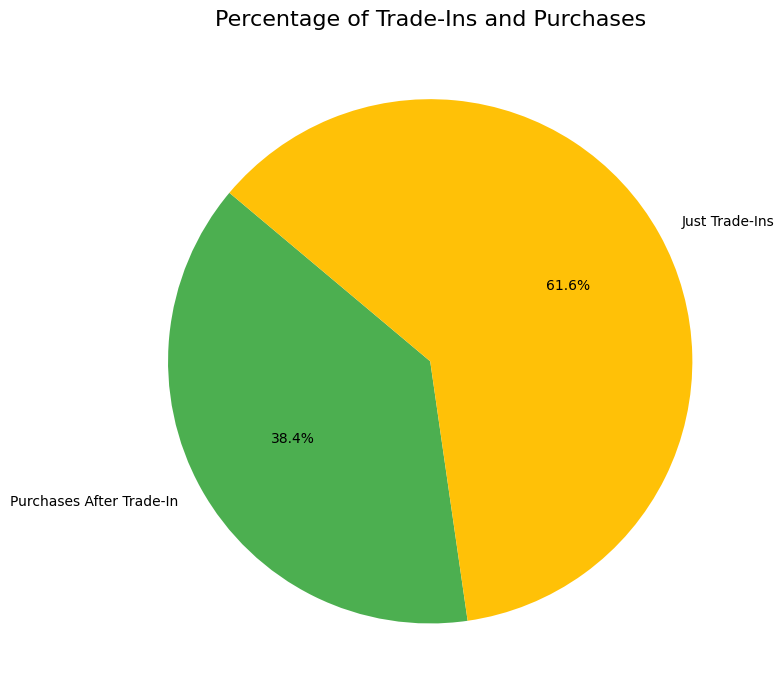

In [ ]:
# Filter data where trade_in_customer == 1
trade_in_data = data[data['trade_in_customer'] == 1]

# Calculate counts for each category
total_trade_ins = trade_in_data.shape[0]
just_trade_ins = trade_in_data[trade_in_data['purchase_flag'] == 0].shape[0]
trade_ins_and_purchase = trade_in_data[trade_in_data['purchase_flag'] == 1].shape[0]

# Calculate percentages
percentage_just_trade_ins = (just_trade_ins / total_trade_ins) * 100
percentage_trade_ins_and_purchase = (trade_ins_and_purchase / total_trade_ins) * 100

# Create a summary table
summary_table = pd.DataFrame({
    'Category': [
        'Total Trade-Ins',
        'Just Trade-Ins',
        'Trade-Ins and Purchase'
    ],
    'Count': [
        total_trade_ins,
        just_trade_ins,
        trade_ins_and_purchase
    ],
    'Percentage (%)': [
        100.0,  # Total Trade-Ins is 100%
        percentage_just_trade_ins,
        percentage_trade_ins_and_purchase
    ]
})

# Display the summary table
print(summary_table)


# Data for visualization
labels = ['Purchases After Trade-In', 'Just Trade-Ins']
sizes = [percentage_trade_ins_and_purchase, percentage_just_trade_ins]
colors = ['#4CAF50', '#FFC107']

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

# Add title
plt.title('Percentage of Trade-Ins and Purchases', fontsize=16)
plt.tight_layout()

# Show the plot
plt.show()

Out of the trade-in population, 61% consists of customers who only complete a trade-in without making a purchase, while 38% go on to make a purchase after completing a trade-in.

In [ ]:
# Group by state and calculate metrics
summary_by_state = data.groupby('state').apply(lambda state_data: pd.Series({
    'Total Trade-Ins': state_data['trade_in_customer'].sum(),
    'Purchases After Trade-In': state_data[(state_data['trade_in_customer'] == 1) & (state_data['purchase_flag'] == 1)].shape[0],
    'Just Trade-Ins': state_data['trade_in_customer'].sum() - state_data[(state_data['trade_in_customer'] == 1) & (state_data['purchase_flag'] == 1)].shape[0]
}))

# Calculate percentages
summary_by_state['Percentage Trade and Purchase (%)'] = (summary_by_state['Purchases After Trade-In'] / summary_by_state['Total Trade-Ins']) * 100
summary_by_state['Percentage Just Trade-In (%)'] = (summary_by_state['Just Trade-Ins'] / summary_by_state['Total Trade-Ins']) * 100

# Reset the index for a cleaner table
summary_by_state.reset_index(inplace=True)

# Sort by 'Percentage Just Trade-In (%)' in descending order
summary_by_state = summary_by_state.sort_values(by='Percentage Just Trade-In (%)', ascending=False)

# Display the results
print(summary_by_state)



   state  Total Trade-Ins  Purchases After Trade-In  Just Trade-Ins  \
10    IL              531                       177             354   
37    UT              501                       167             334   
17    ME              506                       174             332   
25    NJ              520                       180             340   
15    MA              589                       212             377   
24    NH              530                       192             338   
33    RI              590                       214             376   
38    VA              529                       192             337   
23    NE              512                       186             326   
28    NY              572                       210             362   
7     GA              453                       167             286   
22    NC              523                       195             328   
32    PA              489                       183             306   
9     

<ipython-input-21-5552c85897c1>:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



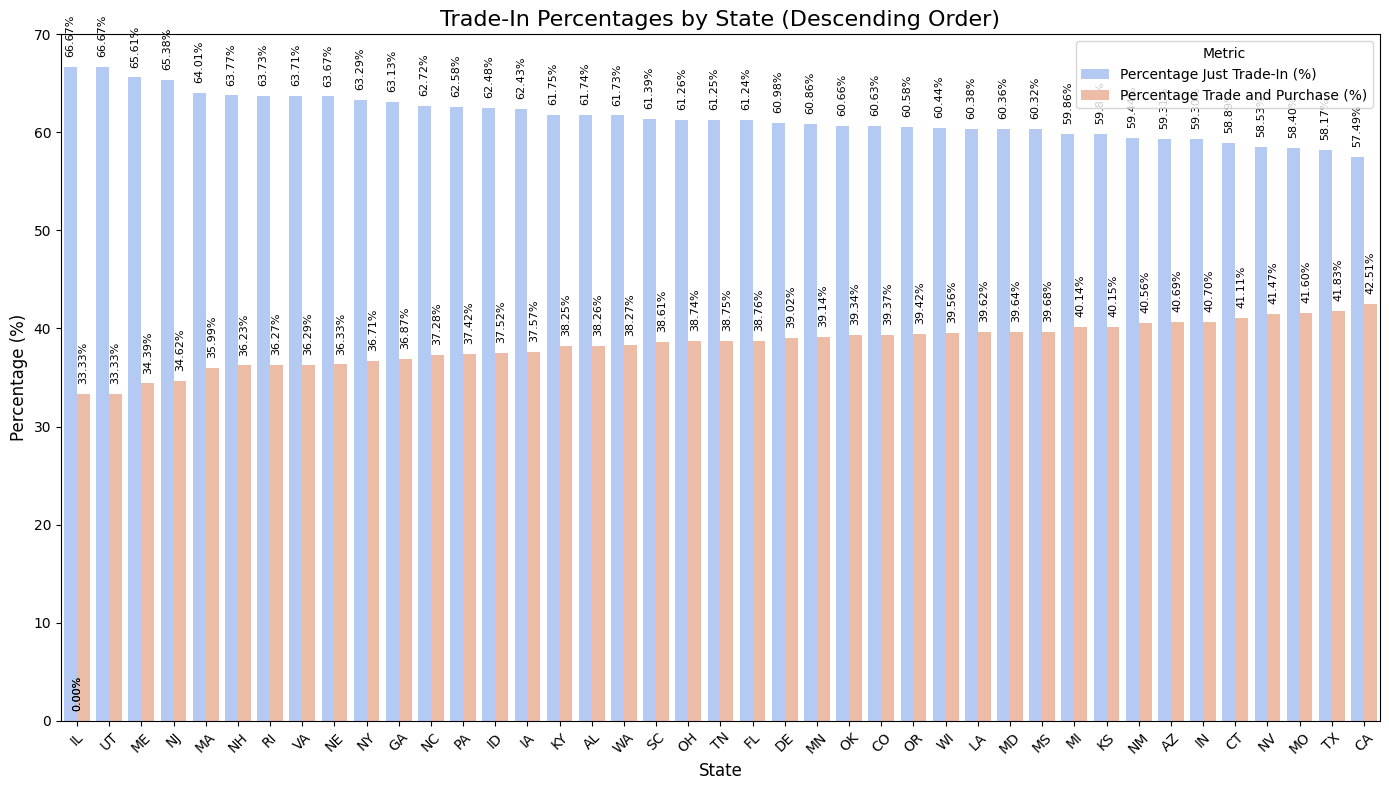

In [ ]:
# Visualization setup for percentages
plt.figure(figsize=(14, 8))

# Melt the percentage columns for easier plotting
percentage_data = summary_by_state.melt(
    id_vars='state',
    value_vars=['Percentage Trade and Purchase (%)', 'Percentage Just Trade-In (%)'],
    var_name='Metric',
    value_name='Percentage'
)

# Sort the percentage data by 'Percentage' in descending order
percentage_data = percentage_data.sort_values(by='Percentage', ascending=False)

# Create a grouped bar chart for percentages
ax = sns.barplot(
    data=percentage_data,
    x='state',
    y='Percentage',
    hue='Metric',
    palette='coolwarm'
)

# Add labels and title
plt.title('Trade-In Percentages by State (Descending Order)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Metric', fontsize=10)
plt.tight_layout()

# Annotate bars with percentages in vertical orientation
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.2f}%",  # Display percentage
        (bar.get_x() + bar.get_width() / 2, bar.get_height() + 1),  # Position
        ha='center',
        va='bottom',
        fontsize=8,
        rotation=90,  # Vertical orientation
        color='black'
    )

# Show the plot
plt.show()




Looking at the overall numbers for trade-in customers, we see that **38% of trade-ins also result in a purchase**. When analyzed on a state-by-state basis, this percentage ranges from a minimum of **33%** to a maximum of **42%,** which is around the overall figure of 38%.

Now that we've analyzed the data from the trade-in perspective, it's important to note that trade-in data differs slightly from purchase data ( i.e not all purchases are associated with trade-ins, and not all trade-ins result in purchases.)

In [ ]:
# Group by state and calculate metrics
summary_by_state = data.groupby('state').apply(lambda state_data: pd.Series({
    'Purchases After Trade-In': state_data[(state_data['trade_in_customer'] == 1) & (state_data['purchase_flag'] == 1)].shape[0],
    'Purchases Not Trade-In': state_data[(state_data['trade_in_customer'] == 0) & (state_data['purchase_flag'] == 1)].shape[0]
}))

# Reset the index for a cleaner table
summary_by_state.reset_index(inplace=True)

# Calculate overall metrics
total_purchases_with_trade_in = summary_by_state['Purchases After Trade-In'].sum()
total_purchases_without_trade_in = summary_by_state['Purchases Not Trade-In'].sum()
total_purchases = total_purchases_with_trade_in + total_purchases_without_trade_in

# Overall percentages
overall_percentage_trade_in = (total_purchases_with_trade_in / total_purchases) * 100
overall_percentage_without_trade_in = (total_purchases_without_trade_in / total_purchases) * 100

# Create a summary table
overall_summary = pd.DataFrame({
    'Metric': ['Purchases with Trade-In', 'Purchases without Trade-In'],
    'Count': [total_purchases_with_trade_in, total_purchases_without_trade_in],
    'Percentage (%)': [overall_percentage_trade_in, overall_percentage_without_trade_in]
})

# Display the results
print(overall_summary)


                       Metric  Count  Percentage (%)
0     Purchases with Trade-In   8173       27.240609
1  Purchases without Trade-In  21830       72.759391


<ipython-input-51-095737dc7d68>:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Only **27% of all purchases** are associated with a trade-in.

We can use a Venn diagram to better visualize and understand this situation.

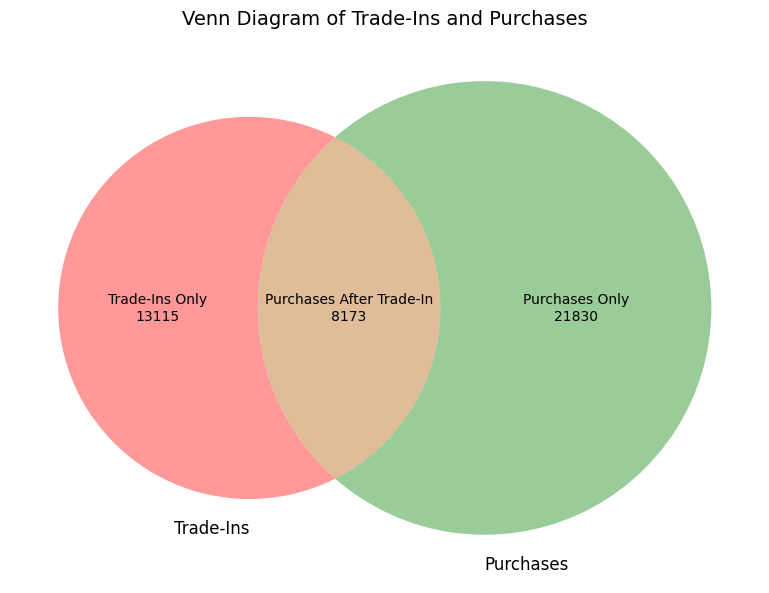

In [ ]:
# Count for purchases (purchase_flag == 1)
purchase_count = data[data['purchase_flag'] == 1].shape[0]

# Count for trade-ins (trade_in_customer == 1)
trade_in_count = data[data['trade_in_customer'] == 1].shape[0]

# Count for purchases after trade-in (trade_in_customer == 1 and purchase_flag == 1)
purchase_after_trade_in_count = data[(data['trade_in_customer'] == 1) & (data['purchase_flag'] == 1)].shape[0]

# Create the Venn diagram
plt.figure(figsize=(8, 6))
venn = venn2(
    subsets=(
        trade_in_count - purchase_after_trade_in_count,  # Only trade-ins (no purchases)
        purchase_count - purchase_after_trade_in_count,  # Only purchases (no trade-ins)
        purchase_after_trade_in_count                   # Purchases after trade-in
    ),
    set_labels=('Trade-Ins', 'Purchases')
)

# Annotate the counts on the diagram
venn.get_label_by_id('10').set_text(f"Trade-Ins Only\n{trade_in_count - purchase_after_trade_in_count}")
venn.get_label_by_id('01').set_text(f"Purchases Only\n{purchase_count - purchase_after_trade_in_count}")
venn.get_label_by_id('11').set_text(f"Purchases After Trade-In\n{purchase_after_trade_in_count}")

# Add title
plt.title("Venn Diagram of Trade-Ins and Purchases", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


A significant portion, 13,115 individuals, only completed a trade-in without making a purchase. This suggests that while customers are willing to engage with the trade-in process, they may not find a suitable vehicle to purchase, or there may be other barriers preventing a conversion.

Only 27% of all purchases involved a trade-in, indicating that trade-ins are not the primary driver for purchases.

Over 60% of trade-in customers do not proceed to make a purchase, suggesting opportunities to improve the conversion rate from trade-ins to purchases.

From the recent bar graph, it is evident that states like California (CA), Texas (TX), Missouri (MO), Nevada (NV), and Connecticut (CT) exhibit a higher ratio of purchases after trade-ins compared to other states. These states seem to have more effective strategies or favorable conditions that drive trade-in customers to complete a purchase.

## Understanding Unaided Awareness

Summary Statistics for Unaided Awareness:
count    100000.000000
mean          0.182791
std           0.072074
min           0.049422
25%           0.128091
50%           0.168585
75%           0.223633
max           0.457150
Name: unaided_awareness, dtype: float64


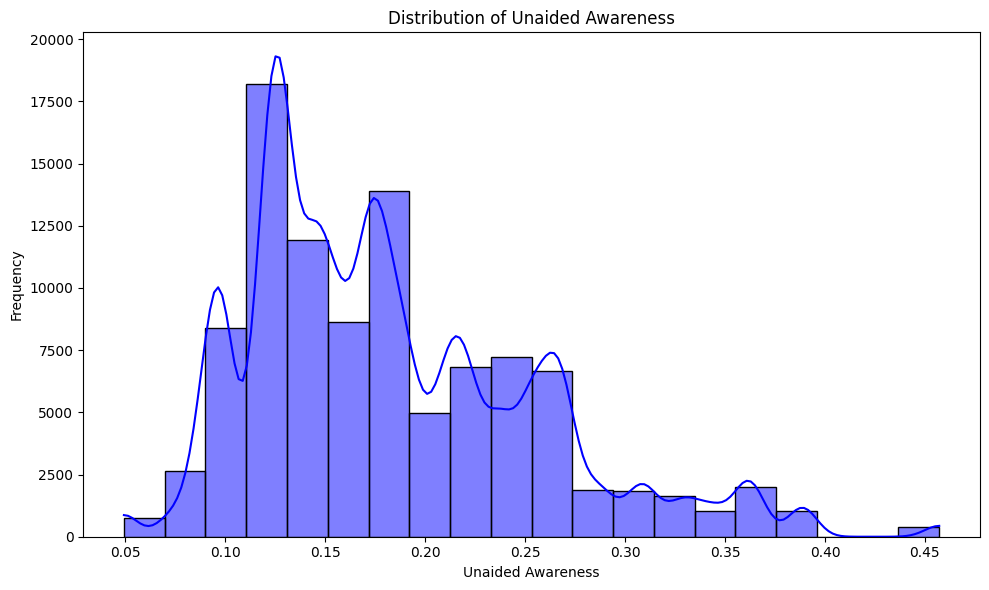

In [ ]:
#Understanding Distribution of unaided awarenesses

# Summary statistics
print("Summary Statistics for Unaided Awareness:")
print(data['unaided_awareness'].describe())

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['unaided_awareness'], bins=20, kde=True, color='blue')
plt.title('Distribution of Unaided Awareness')
plt.xlabel('Unaided Awareness')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

We measured the level of awareness of CarMax among the individuals contributing to our observation, where 0 represents no awareness (CarMax completely unknown) and 1 represents full awareness (CarMax fully known). This reflects how well the average person in a market recalls the CarMax brand without any prompting or priming.

The distribution peaks around the 0.10–0.15 range, indicating that the majority of people have low-to-moderate awareness of CarMax.
Awareness levels taper off significantly beyond the 0.25 mark, showing that only a small portion of the population has high unaided awareness of the CarMax brand.

The most common level of awareness lies in the 0.10 range, suggesting that CarMax is somewhat known but not highly recognized among a majority of individuals in the market.

<ipython-input-57-20f73c937a7a>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




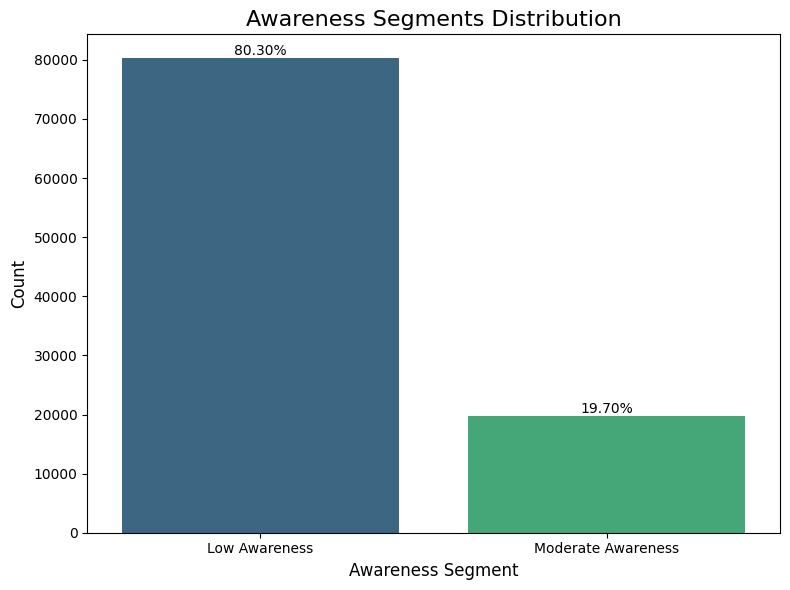

In [ ]:
#Segmentation and Insights

# Segment unaided awareness
data['awareness_segment'] = pd.cut(
    data['unaided_awareness'],
    bins=[0, 0.25, 0.50],
    labels=['Low Awareness', 'Moderate Awareness']
)

# Count segments and calculate percentages
awareness_counts = data['awareness_segment'].value_counts()
awareness_percentages = (awareness_counts / awareness_counts.sum()) * 100

# Visualization
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=awareness_counts.index, y=awareness_counts.values, palette='viridis')

# Annotate the percentages on top of the bars
for i, (count, percentage) in enumerate(zip(awareness_counts.values, awareness_percentages)):
    plt.text(i, count + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.title('Awareness Segments Distribution', fontsize=16)
plt.xlabel('Awareness Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


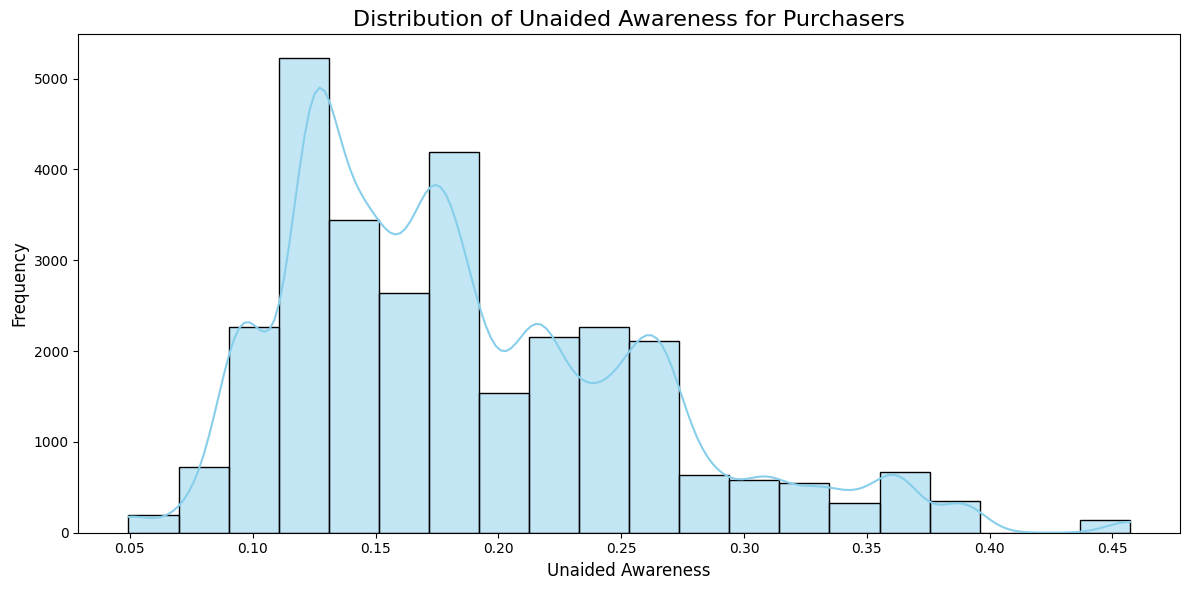

In [ ]:
#Understanding distributin of awareness in purchasers
# Filter data for purchasers (purchase_flag == 1)
purchasers = data[data['purchase_flag'] == 1]

# Plot the distribution of unaided_awareness for purchasers
plt.figure(figsize=(12, 6))
sns.histplot(
    purchasers['unaided_awareness'],
    bins=20,
    kde=True,
    color='skyblue'
)

# Add labels and title
plt.title('Distribution of Unaided Awareness for Purchasers', fontsize=16)
plt.xlabel('Unaided Awareness', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


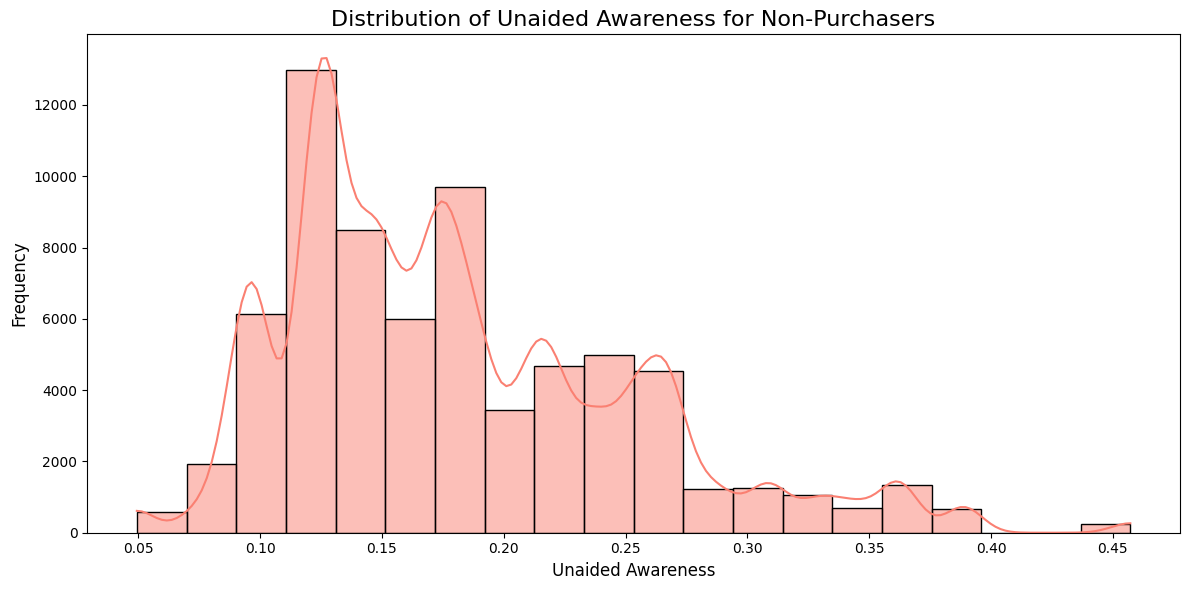

In [ ]:
# Understanding distributin of awareness in non-purchasers
# Filter data for non-purchasers (purchase_flag == 0)
non_purchasers = data[data['purchase_flag'] == 0]

# Plot the distribution of unaided_awareness for non-purchasers
plt.figure(figsize=(12, 6))
sns.histplot(
    non_purchasers['unaided_awareness'],
    bins=20,
    kde=True,
    color='salmon'
)

# Add labels and title
plt.title('Distribution of Unaided Awareness for Non-Purchasers', fontsize=16)
plt.xlabel('Unaided Awareness', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
#Check for Correlations

# Correlation with unaided awareness
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])

correlations = numeric_data.corr()['unaided_awareness'].sort_values(ascending=False)
print("Correlations with Unaided Awareness:")
print(correlations)


Correlations with Unaided Awareness:
unaided_awareness         1.000000
service_plan_customer     0.045643
finance_customer          0.037807
campaign_c_touchpoints    0.014594
campaign_a_touchpoints    0.008362
total_touchpoints         0.002580
Unnamed: 0                0.000193
campaign_b_touchpoints   -0.003167
num_web_visits           -0.036032
Name: unaided_awareness, dtype: float64


All correlations are weak, indicating that none of the factors analyzed have a strong impact on unaided awareness. This suggests that unaided awareness is influenced by other factors not captured in this analysis, such as overall brand reputation, market presence, or external advertising efforts.

# Marketing Strategies

### Initial understanding

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [3]:
# Let's Load the dataset again
file = '/content/Fall 2024 Dataset (1).csv'
data = pd.read_csv(file, on_bad_lines='skip')

In [4]:
# Using the len() function
row_count = len(data)

print("Number of Observations:", row_count)

Number of Observations: 100000


In [5]:
#Understand the data distribution

# Summary statistics
print(data[['campaign_a_touchpoints', 'campaign_b_touchpoints',
            'campaign_c_touchpoints', 'total_touchpoints',
            'num_web_visits']].describe())

       campaign_a_touchpoints  campaign_b_touchpoints  campaign_c_touchpoints  \
count           100000.000000           100000.000000           100000.000000   
mean                 0.185650                1.644060                0.179440   
std                  1.642355                4.329376                0.831365   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                0.000000                0.000000   
50%                  0.000000                0.000000                0.000000   
75%                  0.000000                1.000000                0.000000   
max                 95.000000               98.000000               21.000000   

       total_touchpoints  num_web_visits  
count      100000.000000   100000.000000  
mean            2.009150       25.875940  
std             4.710237       24.373602  
min             0.000000        1.000000  
25%             0.000000        8.000000  
50%         

In [ ]:
# Count rows where total_touchpoints > 0
total_touchpoints_count = data[data['total_touchpoints'] > 0].shape[0]

# Display the result
print("Number of rows where atlease one touchpoint is made across all the three campaings:", total_touchpoints_count)


Number of rows where atlease one touchpoint is made across all the three campaings: 42497


42% of our total observers have interacted with at least one marketing campaign at least once.

In [ ]:
# Count rows where num_web_visits > 0
num_web_visits_count = data[data['num_web_visits'] > 0].shape[0]

# Display the result
print("Number of observers visited web page atleast once:", num_web_visits_count)

Number of observers visited web page atleast once: 100000


All of our observations have visited CarMax's website at least once.

## Comparing conversions

Campaign Effectiveness Summary:
      Campaign  Conversions (Purchases)  Non-Conversions  Total Touchpoints  \
0   Campaign A                     1365             2671               4036   
1   Campaign B                    11849            23636              35485   
2   Campaign C                     3255             3971               7226   
3  No Campaign                    15473            42030              57503   

   Conversion Rate (%)  Non-Conversion Rate (%)  
0            33.820614                66.179386  
1            33.391574                66.608426  
2            45.045668                54.954332  
3            26.908161                73.091839  


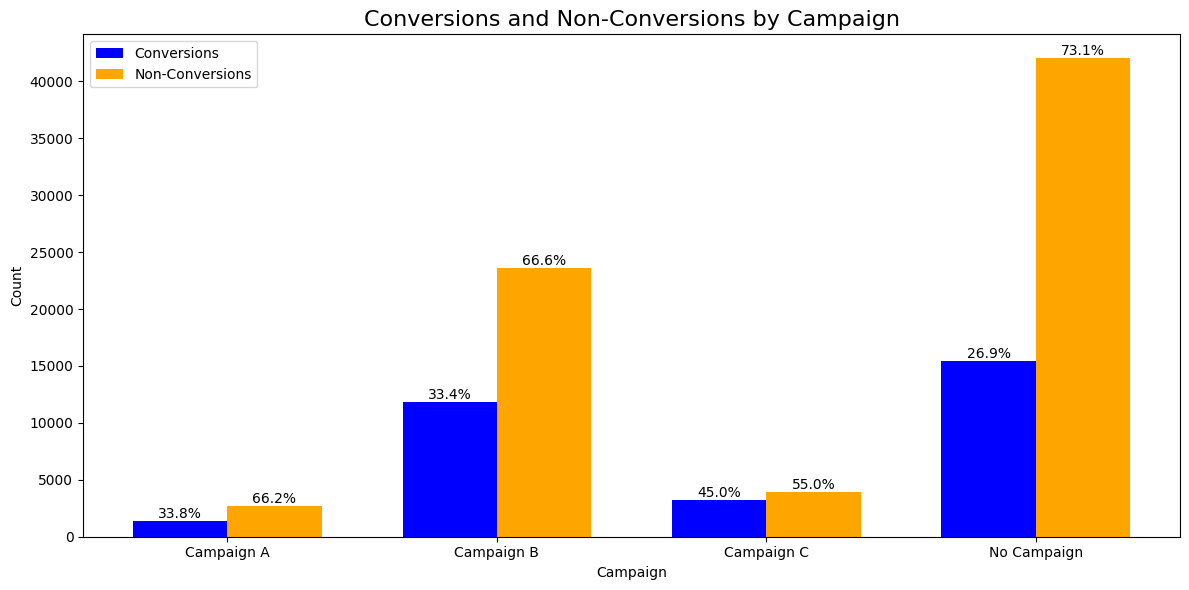

In [ ]:
# Count Campaign A conversions and non-conversions
campaign_a_conversions = data[(data['campaign_a_touchpoints'] > 0) & (data['purchase_flag'] == 1)].shape[0]
campaign_a_non_conversions = data[(data['campaign_a_touchpoints'] > 0) & (data['purchase_flag'] == 0)].shape[0]

# Count Campaign B conversions and non-conversions
campaign_b_conversions = data[(data['campaign_b_touchpoints'] > 0) & (data['purchase_flag'] == 1)].shape[0]
campaign_b_non_conversions = data[(data['campaign_b_touchpoints'] > 0) & (data['purchase_flag'] == 0)].shape[0]

# Count Campaign C conversions and non-conversions
campaign_c_conversions = data[(data['campaign_c_touchpoints'] > 0) & (data['purchase_flag'] == 1)].shape[0]
campaign_c_non_conversions = data[(data['campaign_c_touchpoints'] > 0) & (data['purchase_flag'] == 0)].shape[0]

# Count "No Campaign" purchases
no_campaign_conversions = data[
    (data['campaign_a_touchpoints'] == 0) &
    (data['campaign_b_touchpoints'] == 0) &
    (data['campaign_c_touchpoints'] == 0) &
    (data['purchase_flag'] == 1)
].shape[0]

no_campaign_non_conversions = data[
    (data['campaign_a_touchpoints'] == 0) &
    (data['campaign_b_touchpoints'] == 0) &
    (data['campaign_c_touchpoints'] == 0) &
    (data['purchase_flag'] == 0)
].shape[0]

# Create a summary DataFrame
campaign_summary = pd.DataFrame({
    'Campaign': ['Campaign A', 'Campaign B', 'Campaign C', 'No Campaign'],
    'Conversions (Purchases)': [
        campaign_a_conversions,
        campaign_b_conversions,
        campaign_c_conversions,
        no_campaign_conversions
    ],
    'Non-Conversions': [
        campaign_a_non_conversions,
        campaign_b_non_conversions,
        campaign_c_non_conversions,
        no_campaign_non_conversions
    ]
})

# Calculate total touchpoints for each campaign
campaign_summary['Total Touchpoints'] = campaign_summary['Conversions (Purchases)'] + campaign_summary['Non-Conversions']

# Calculate percentages
campaign_summary['Conversion Rate (%)'] = (campaign_summary['Conversions (Purchases)'] / campaign_summary['Total Touchpoints']) * 100
campaign_summary['Non-Conversion Rate (%)'] = (campaign_summary['Non-Conversions'] / campaign_summary['Total Touchpoints']) * 100

# Display the summary table
print("Campaign Effectiveness Summary:")
print(campaign_summary)

# Visualization with bars side by side
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = range(len(campaign_summary['Campaign']))

# Plot conversions and non-conversions side by side
bars1 = plt.bar([i - bar_width / 2 for i in index], campaign_summary['Conversions (Purchases)'], bar_width, label='Conversions', color='blue')
bars2 = plt.bar([i + bar_width / 2 for i in index], campaign_summary['Non-Conversions'], bar_width, label='Non-Conversions', color='orange')

# Annotate percentages on top of bars
for i, (bar1, bar2, conv_rate, non_conv_rate) in enumerate(zip(bars1, bars2, campaign_summary['Conversion Rate (%)'], campaign_summary['Non-Conversion Rate (%)'])):
    plt.text(bar1.get_x() + bar1.get_width() / 2, bar1.get_height() + 1, f'{conv_rate:.1f}%', ha='center', va='bottom', color='black', fontsize=10)
    plt.text(bar2.get_x() + bar2.get_width() / 2, bar2.get_height() + 1, f'{non_conv_rate:.1f}%', ha='center', va='bottom', color='black', fontsize=10)

# Add labels and title
plt.title('Conversions and Non-Conversions by Campaign', fontsize=16)
plt.ylabel('Count')
plt.xlabel('Campaign')
plt.xticks(index, campaign_summary['Campaign'])
plt.legend()

# Finalize the plot
plt.tight_layout()
plt.show()3

When we analyze conversions at the individual campaign level, the results are quite impressive, with conversion rates ranging from 33% to 45%. However, when shifting to an overall perspective, an intriguing insight emerges: the "No Campaign" group, despite having the lowest conversion rate at 27%, accounts for a significant number of overall conversions. In fact, the total number of conversions from the "No Campaign" group exceeds those from Campaign B, which has the widest reach among the three campaigns, and even Campaign C, which boasts the highest conversion rate.

insights:
This analysis reveals that while campaign-driven conversions are strong, the "No Campaign" segment represents an underutilized opportunity. By targeting these organically-engaged individuals and optimizing existing campaigns, CarMax can significantly enhance both its reach and conversion rates. Combining the right adjustments in campaign strategy with efforts to capitalize on organic engagement will ensure sustained growth and increased market penetration.

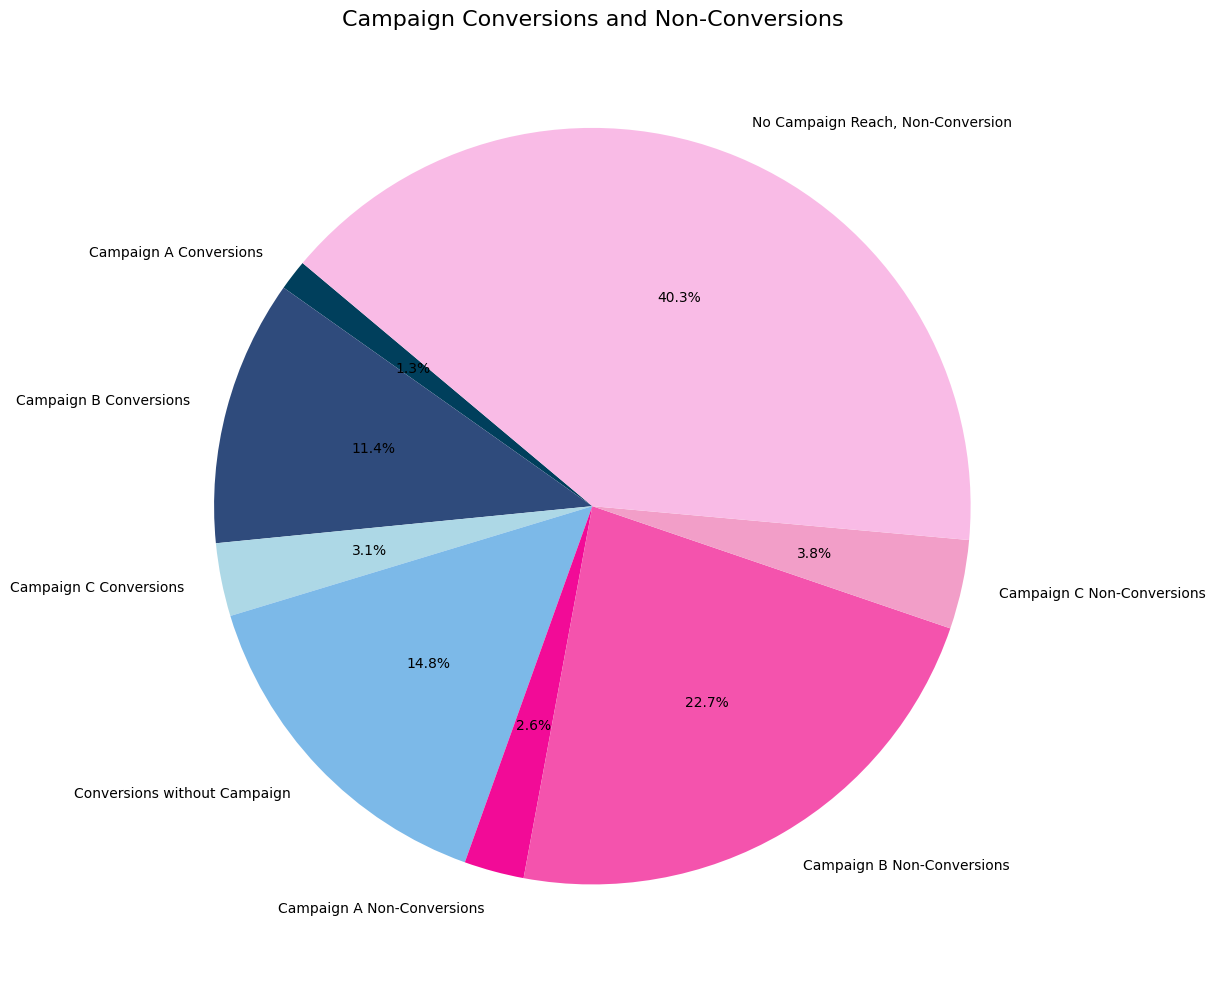

In [ ]:
#Let's look into the percentages of conversions or non-conversions happening through all the three campaings across all 100,000 enrties.
# Calculate counts for each condition
campaign_a_conversions = data[(data['campaign_a_touchpoints'] > 0) & (data['purchase_flag'] == 1)].shape[0]
campaign_b_conversions = data[(data['campaign_b_touchpoints'] > 0) & (data['purchase_flag'] == 1)].shape[0]
campaign_c_conversions = data[(data['campaign_c_touchpoints'] > 0) & (data['purchase_flag'] == 1)].shape[0]

conversions_without_campaign = data[
    (data['purchase_flag'] == 1) &
    (data['campaign_a_touchpoints'] == 0) &
    (data['campaign_b_touchpoints'] == 0) &
    (data['campaign_c_touchpoints'] == 0)
].shape[0]

no_campaign_no_conversion = data[
    (data['purchase_flag'] == 0) &
    (data['campaign_a_touchpoints'] == 0) &
    (data['campaign_b_touchpoints'] == 0) &
    (data['campaign_c_touchpoints'] == 0)
].shape[0]

campaign_a_non_conversions = data[(data['campaign_a_touchpoints'] > 0) & (data['purchase_flag'] == 0)].shape[0]
campaign_b_non_conversions = data[(data['campaign_b_touchpoints'] > 0) & (data['purchase_flag'] == 0)].shape[0]
campaign_c_non_conversions = data[(data['campaign_c_touchpoints'] > 0) & (data['purchase_flag'] == 0)].shape[0]

# Total for percentage calculation
total_count = (
    campaign_a_conversions + campaign_b_conversions + campaign_c_conversions +
    conversions_without_campaign + no_campaign_no_conversion +
    campaign_a_non_conversions + campaign_b_non_conversions + campaign_c_non_conversions
)

# Calculate percentages
percentages = [
    (campaign_a_conversions / total_count) * 100,
    (campaign_b_conversions / total_count) * 100,
    (campaign_c_conversions / total_count) * 100,
    (conversions_without_campaign / total_count) * 100,
    (campaign_a_non_conversions / total_count) * 100,
    (campaign_b_non_conversions / total_count) * 100,
    (campaign_c_non_conversions / total_count) * 100,
    (no_campaign_no_conversion / total_count) * 100
]

# Labels for the pie chart
labels = [
    'Campaign A Conversions',
    'Campaign B Conversions',
    'Campaign C Conversions',
    'Conversions without Campaign',
    'Campaign A Non-Conversions',
    'Campaign B Non-Conversions',
    'Campaign C Non-Conversions',
    'No Campaign Reach, Non-Conversion'
]

# Colors for the pie chart
colors = [
    '#003f5c',
    '#2f4b7c',
    '#ADD8E6',
    '#7CB9E8',
    '#f20b97',
    '#f453ad',
    '#f29ec8',
    '#f9bbe6'
]

# Plot the pie chart
plt.figure(figsize=(12, 10))
plt.pie(
    percentages,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

# Add a title
plt.title('Campaign Conversions and Non-Conversions', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


This pie chart breaks down the distribution of conversions and non-conversions across campaigns and other categories:

**No Campaign Reach, Non-Conversion (40.3%):** A significant portion of observations did not engage with any campaign and did not convert, highlighting an untapped audience.

**Campaign B Non-Conversions (22.7%):** Campaign B has the highest proportion of non-conversions among all campaigns, suggesting room for optimization.

**Conversions Without Campaign (14.8%):** A notable percentage of conversions occurred without any campaign touchpoint, indicating other factors driving these conversions.

**Campaign B Conversions (11.4%):** Campaign B has the most conversions compared to other campaigns, but it still trails behind its non-conversions.

**Campaign C Non-Conversions (3.8%) and Campaign A Non-Conversions (2.6%):** Both Campaign A and C have very low engagement and conversion rates, suggesting limited effectiveness.

**Campaign C Conversions (3.1%) and Campaign A Conversions (1.3%):**Campaign A and C show minimal conversions, indicating a need for a deeper review of their strategies.

**Key Takeaways:**

Campaign B drives the most engagement but has a high non-conversion rate, requiring efforts to convert more interactions.

The largest segment represents audiences with no campaign reach or engagement, offering a significant opportunity for expansion.

Campaign A and C underperform in both engagement and conversions, necessitating a strategic overhaul.

<ipython-input-84-efda4198fb6f>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




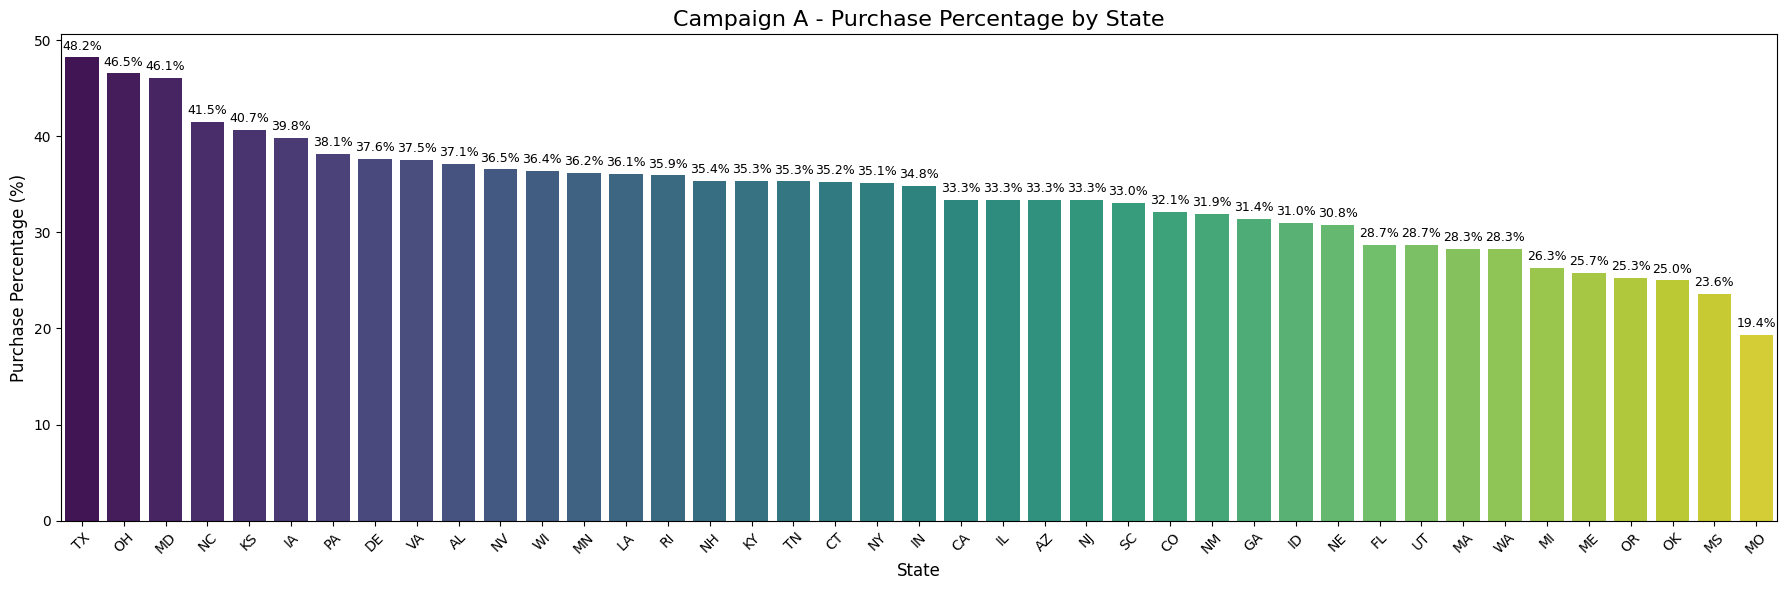

<ipython-input-84-efda4198fb6f>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




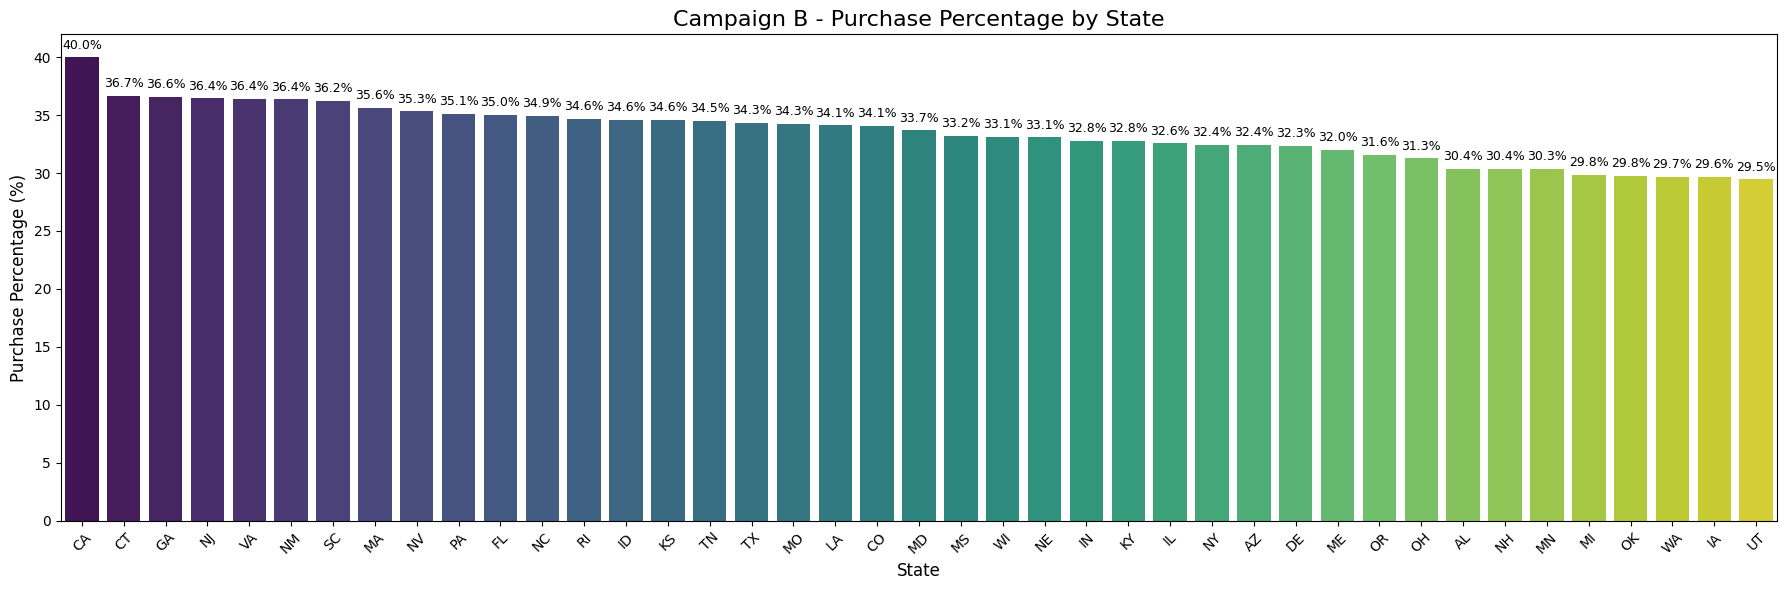

<ipython-input-84-efda4198fb6f>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




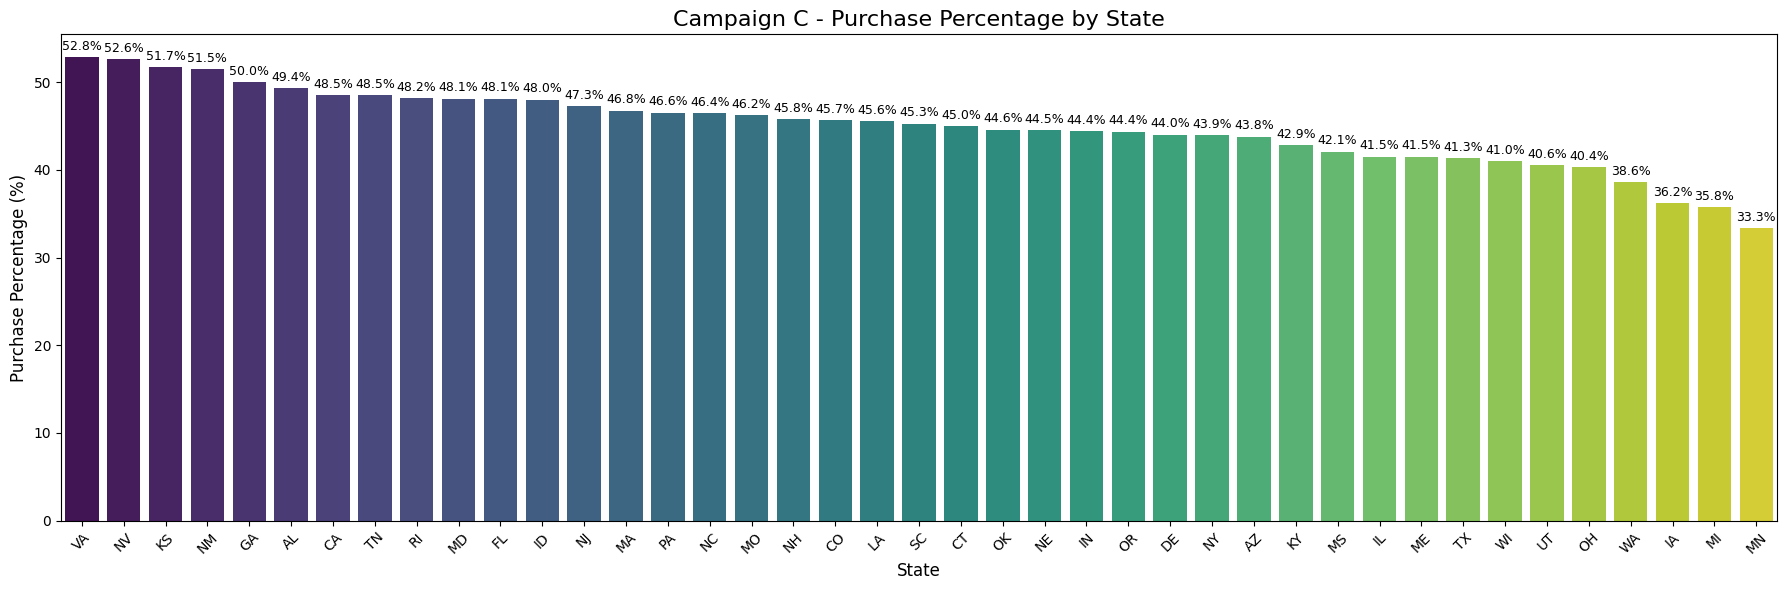

<ipython-input-84-efda4198fb6f>:60: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




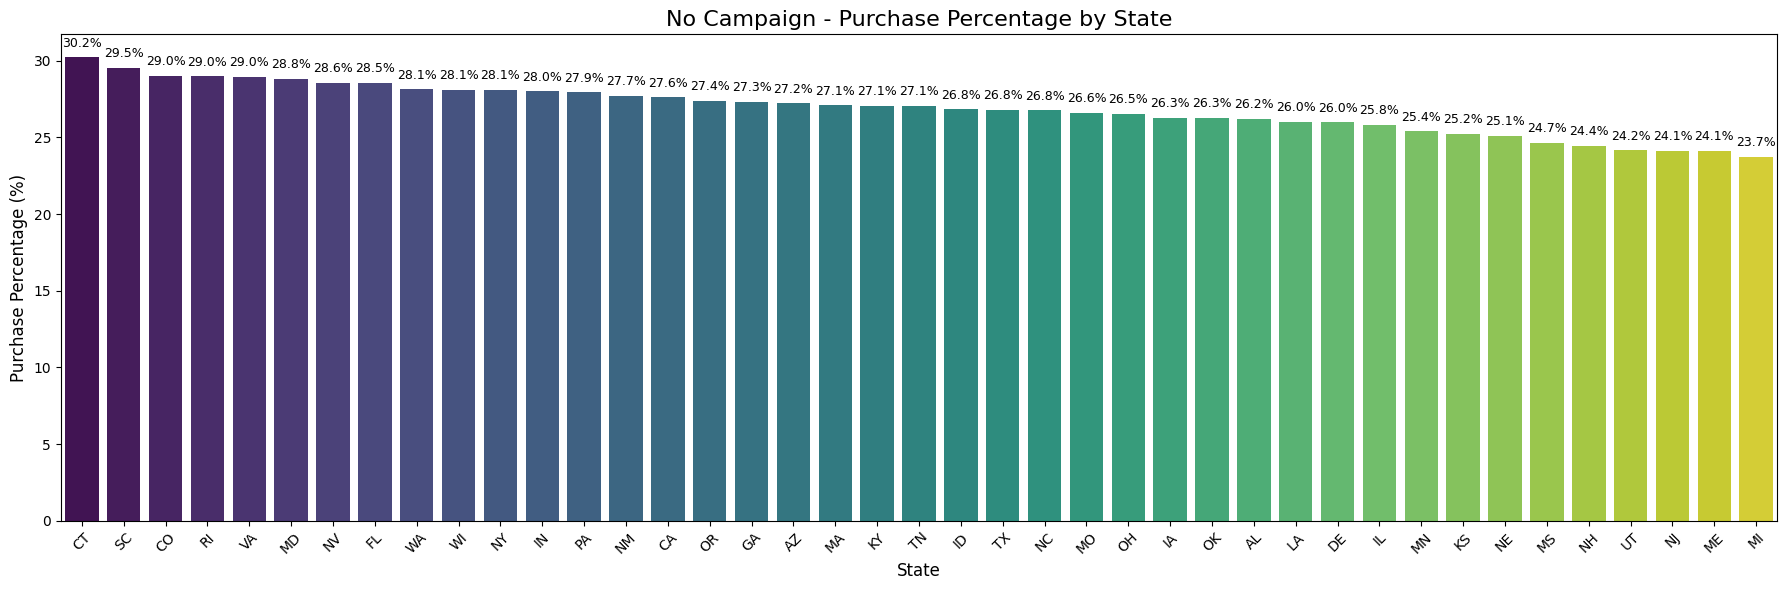

In [ ]:
# Function to calculate and visualize purchase percentages by state
def visualize_campaign_by_state(campaign_column, campaign_name):
    # Filter data for the specific campaign and purchase_flag
    campaign_data = data[data[campaign_column] > 0]
    purchases = campaign_data[campaign_data['purchase_flag'] == 1]

    # Group by state: total touchpoints and purchases
    state_summary = campaign_data.groupby('state').size().reset_index(name='Total Touchpoints')
    state_purchases = purchases.groupby('state').size().reset_index(name='Purchases')

    # Merge to calculate purchase percentage
    state_summary = state_summary.merge(state_purchases, on='state', how='left').fillna(0)
    state_summary['Purchase Percentage (%)'] = (state_summary['Purchases'] / state_summary['Total Touchpoints']) * 100

    # Sort in descending order by purchase percentage
    state_summary = state_summary.sort_values(by='Purchase Percentage (%)', ascending=False).reset_index(drop=True)

    # Visualization
    plt.figure(figsize=(18, 6))
    sns.barplot(data=state_summary, x='state', y='Purchase Percentage (%)', palette='viridis')
    plt.title(f'{campaign_name} - Purchase Percentage by State', fontsize=16)
    plt.xlabel('State', fontsize=12)
    plt.ylabel('Purchase Percentage (%)', fontsize=12)
    plt.xticks(rotation=45)

    # Annotate percentages on top of bars
    for index, row in state_summary.iterrows():
        plt.text(index, row['Purchase Percentage (%)'] + 0.5, f"{row['Purchase Percentage (%)']:.1f}%",
                 ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

# Visualize Campaign A
visualize_campaign_by_state('campaign_a_touchpoints', 'Campaign A')

# Visualize Campaign B
visualize_campaign_by_state('campaign_b_touchpoints', 'Campaign B')

# Visualize Campaign C
visualize_campaign_by_state('campaign_c_touchpoints', 'Campaign C')

# Visualize No Campaign
no_campaign_filter = (data['campaign_a_touchpoints'] == 0) & (data['campaign_b_touchpoints'] == 0) & (data['campaign_c_touchpoints'] == 0)
no_campaign_data = data[no_campaign_filter]
purchases_no_campaign = no_campaign_data[no_campaign_data['purchase_flag'] == 1]

# Group and visualize No Campaign
no_campaign_summary = no_campaign_data.groupby('state').size().reset_index(name='Total Touchpoints')
no_campaign_purchases = purchases_no_campaign.groupby('state').size().reset_index(name='Purchases')
no_campaign_summary = no_campaign_summary.merge(no_campaign_purchases, on='state', how='left').fillna(0)
no_campaign_summary['Purchase Percentage (%)'] = (no_campaign_summary['Purchases'] / no_campaign_summary['Total Touchpoints']) * 100
no_campaign_summary = no_campaign_summary.sort_values(by='Purchase Percentage (%)', ascending=False).reset_index(drop=True)

plt.figure(figsize=(18, 6))
sns.barplot(data=no_campaign_summary, x='state', y='Purchase Percentage (%)', palette='viridis')
plt.title('No Campaign - Purchase Percentage by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Purchase Percentage (%)', fontsize=12)
plt.xticks(rotation=45)

# Annotate percentages
for index, row in no_campaign_summary.iterrows():
    plt.text(index, row['Purchase Percentage (%)'] + 0.5, f"{row['Purchase Percentage (%)']:.1f}%",
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

Looking at the graph, we can observe that Campaign A exhibits the most variance among the four graphs, with the top-performing state (Texas) achieving a 48% conversion rate, while the lowest-performing state (Missouri) has a conversion rate of only 19%. This significant variation suggests that Campaign A is performing exceptionally well in top states like Texas, Ohio, and Maryland. To maximize its potential, we should analyze why this campaign is particularly successful in certain states and not in others. Identifying these factors will enable us to make strategic adjustments and improve performance across underperforming states, thereby increasing overall conversions.

In contrast, Campaign B demonstrates a more consistent performance range, with its top-performing state (California) achieving a 40% conversion rate. This consistency indicates that Campaign B's messaging or approach resonates more uniformly across states, offering a strong baseline for conversions. However, there is still room to enhance its performance in lower-performing states to achieve even better results.

Campaign C demonstrates the highest conversion rates across states, with multiple states exceeding 50% (e.g., Virginia, Nevada, and Kansas). This indicates that Campaign C resonates more effectively with customers compared to other campaigns.


Despite no targeted marketing, some states like Connecticut (30.2%) and South Carolina (29.5%) show relatively high purchase percentages. This suggests strong organic brand loyalty or interest in these regions.


States like Missouri, Mississippi, and Maine consistently show lower purchase percentages across all campaigns and "No Campaign." These regions may require focused efforts to improve customer engagement and conversions.


In [ ]:
# Function to analyze vehicle class distribution for a specific campaign
def vehicle_class_distribution(data, campaign_filter, campaign_name):
    """
    Filters the data based on campaign conditions, groups by vehicle class,
    and displays the count and total purchases.
    """
    filtered_data = data[campaign_filter]
    vehicle_counts = (
        filtered_data.groupby('vehicle_class')
        .size()
        .reset_index(name='Count')
        .sort_values(by='Count', ascending=False)
        .reset_index(drop=True)
    )
    total_purchases = filtered_data.shape[0]
    print(f"\n--- Total Purchases from {campaign_name}: {total_purchases} ---")
    print(vehicle_counts)
    return vehicle_counts, total_purchases


# Campaign A Analysis
campaign_a_filter = (data['campaign_a_touchpoints'] > 0) & (data['purchase_flag'] == 1)
campaign_a_vehicles, total_campaign_a = vehicle_class_distribution(data, campaign_a_filter, 'Campaign A')

# Campaign B Analysis
campaign_b_filter = (data['campaign_b_touchpoints'] > 0) & (data['purchase_flag'] == 1)
campaign_b_vehicles, total_campaign_b = vehicle_class_distribution(data, campaign_b_filter, 'Campaign B')

# Campaign C Analysis
campaign_c_filter = (data['campaign_c_touchpoints'] > 0) & (data['purchase_flag'] == 1)
campaign_c_vehicles, total_campaign_c = vehicle_class_distribution(data, campaign_c_filter, 'Campaign C')

# No Campaign Analysis
no_campaign_filter = (
    (data['campaign_a_touchpoints'] == 0) &
    (data['campaign_b_touchpoints'] == 0) &
    (data['campaign_c_touchpoints'] == 0) &
    (data['purchase_flag'] == 1)
)
no_campaign_vehicles, total_no_campaign = vehicle_class_distribution(data, no_campaign_filter, 'No Campaign')



--- Total Purchases from Campaign A: 1365 ---
  vehicle_class  Count
0     SMALL SUV    498
1    MEDIUM SUV    288
2        PICKUP    171
3        LUXURY    119
4       COMPACT     99
5      MID SIZE     70
6           VAN     40
7    SPORTS CAR     31
8     LARGE SUV     29
9     FULL SIZE     20

--- Total Purchases from Campaign B: 11849 ---
  vehicle_class  Count
0     SMALL SUV   4095
1    MEDIUM SUV   2488
2        PICKUP   1409
3        LUXURY   1163
4       COMPACT    914
5      MID SIZE    647
6           VAN    356
7    SPORTS CAR    302
8     LARGE SUV    255
9     FULL SIZE    220

--- Total Purchases from Campaign C: 3255 ---
  vehicle_class  Count
0     SMALL SUV   1058
1    MEDIUM SUV    648
2        PICKUP    351
3       COMPACT    347
4        LUXURY    307
5      MID SIZE    241
6           VAN    110
7     LARGE SUV     72
8    SPORTS CAR     63
9     FULL SIZE     58

--- Total Purchases from No Campaign: 15473 ---
  vehicle_class  Count
0     SMALL SUV   4927
1   

When comparing the purchasing patterns of car types among purchasers who converted from different campaigns, it is evident that the overall trends are consistent across all campaigns. Small SUVs and Medium SUVs remain the most purchased car types in every scenario, while Full-Size vehicles are consistently the least purchased.

Upon closer examination, however, subtle differences emerge between the purchasing patterns of campaign-converted purchasers and those converting without any campaign influence. For campaign conversions, the third most preferred car type is Pickup Trucks across all campaigns. In contrast, for no-campaign conversions, the third place is occupied by Compact cars.

Additionally, there is a slight variation in the ranking of less popular car types:

Campaign Conversions: Large SUVs and Sports Cars trade positions, with Large SUVs being slightly more preferred than Sports Cars.
No Campaign Conversions: The order is reversed, with Sports Cars marginally more preferred than Large SUVs.

Financed vs Outright Percentages by Campaign:
Type     Campaign   Financed   Outright
0      Campaign A  75.384615  24.615385
1      Campaign B  74.824880  25.175120
2      Campaign C  75.545315  24.454685
3     No Campaign  74.129128  25.870872


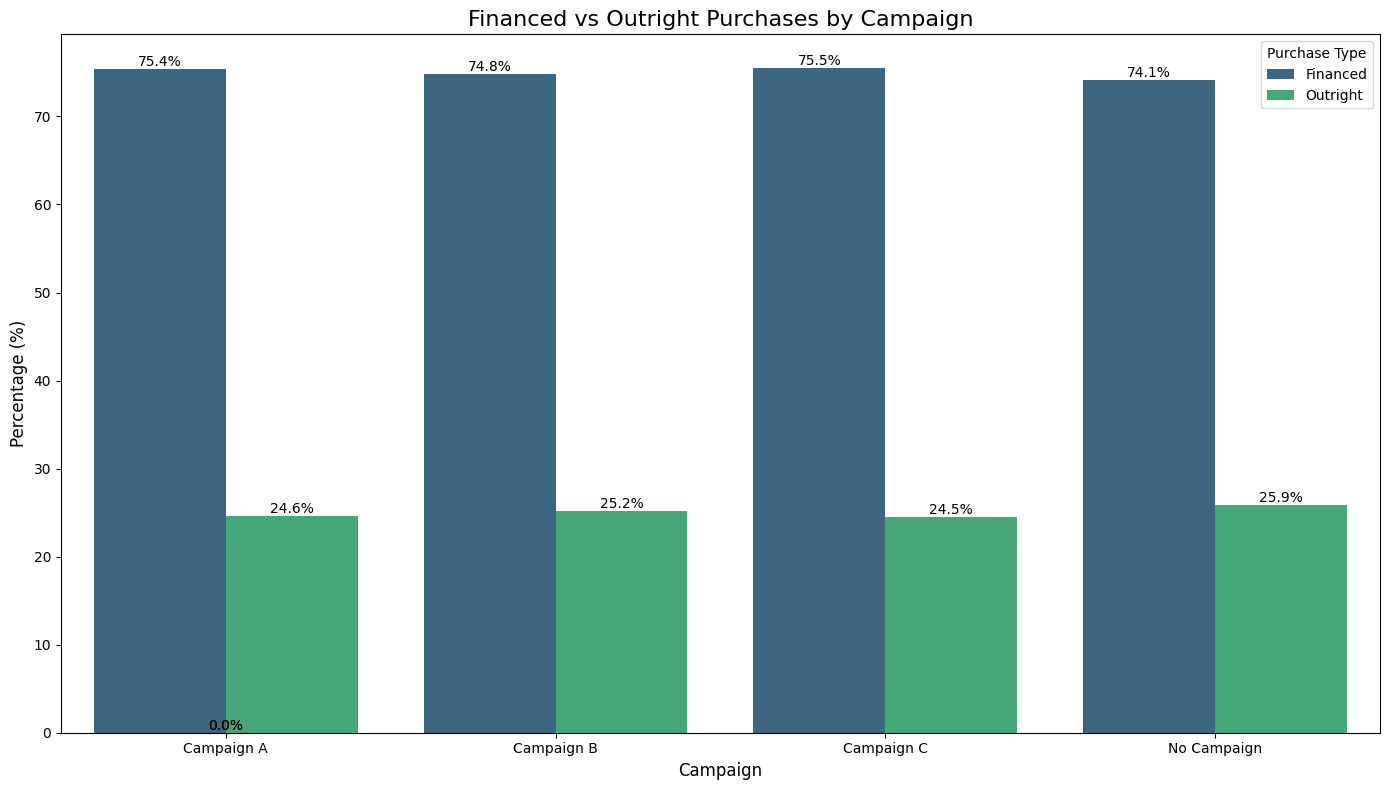

In [ ]:
# Function to calculate financed and outright percentages for a campaign
def calculate_finance_outright(data, campaign_column, campaign_name):
    campaign_data = data[(data[campaign_column] > 0) & (data['purchase_flag'] == 1)]
    finance_counts = campaign_data['finance_customer'].value_counts(normalize=True).reset_index()
    finance_counts.columns = ['Finance Customer', 'Percentage']
    finance_counts['Type'] = finance_counts['Finance Customer'].replace({1: 'Financed', 0: 'Outright'})
    finance_counts['Campaign'] = campaign_name
    finance_counts['Percentage'] = finance_counts['Percentage'] * 100
    return finance_counts[['Campaign', 'Type', 'Percentage']]

# Calculate percentages for each campaign
campaign_a = calculate_finance_outright(data, 'campaign_a_touchpoints', 'Campaign A')
campaign_b = calculate_finance_outright(data, 'campaign_b_touchpoints', 'Campaign B')
campaign_c = calculate_finance_outright(data, 'campaign_c_touchpoints', 'Campaign C')

# Calculate percentages for No Campaign
no_campaign_filter = (
    (data['campaign_a_touchpoints'] == 0) &
    (data['campaign_b_touchpoints'] == 0) &
    (data['campaign_c_touchpoints'] == 0) &
    (data['purchase_flag'] == 1)
)
no_campaign_data = data[no_campaign_filter]
finance_counts_no_campaign = no_campaign_data['finance_customer'].value_counts(normalize=True).reset_index()
finance_counts_no_campaign.columns = ['Finance Customer', 'Percentage']
finance_counts_no_campaign['Type'] = finance_counts_no_campaign['Finance Customer'].replace({1: 'Financed', 0: 'Outright'})
finance_counts_no_campaign['Campaign'] = 'No Campaign'
finance_counts_no_campaign['Percentage'] = finance_counts_no_campaign['Percentage'] * 100

# Combine all campaign data
combined_data = pd.concat([campaign_a, campaign_b, campaign_c, finance_counts_no_campaign], ignore_index=True)

# Pivot table to have campaigns as rows and financed/outright as columns
pivot_table = combined_data.pivot(index='Campaign', columns='Type', values='Percentage').fillna(0).reset_index()

# Display the pivot table
print("Financed vs Outright Percentages by Campaign:")
print(pivot_table)

# Visualization
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=combined_data, x='Campaign', y='Percentage', hue='Type', palette='viridis')

# Annotate percentages on top of bars
for bar in ax.patches:
    ax.annotate(
        f"{bar.get_height():.1f}%",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center', va='bottom', fontsize=10
    )

# Add labels and title
plt.title('Financed vs Outright Purchases by Campaign', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Campaign', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Purchase Type', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


The table displays the percentage breakdown of Financed and Outright purchases for different campaigns (Campaign A, Campaign B, Campaign C) and for cases without any campaign influence.

Financing is the dominant payment method: Across campaigns and no-campaign cases, more than 74% of purchases are financed. This reflects a strong consumer preference for financing as a payment option.
Campaigns do not significantly affect financing preference: The financing percentages for Campaigns A, B, and C, as well as no-campaign purchases, are relatively close, showing that campaigns might not be a critical factor in influencing the choice of payment method.


Under all four conditions, the percentage of financed and outright payments remains consistent, with approximately 75% for financed payments and 25% for outright payments. This trend aligns with the overall pattern observed when analyzing the entire dataset.

It is particularly interesting to note that the outright payments for the no-campaign case show a slightly higher percentage (26%) compared to the three campaign cases. While this difference is small, it could indicate that customers who are not influenced by campaigns might have a slightly stronger inclination toward outright purchases.

In [12]:
# Filter data for trade-in customers
trade_in_data = data[data['trade_in_customer'] == 1]

# Calculate total trade-in customers
total_trade_in_customers = trade_in_data.shape[0]

# Function to calculate percentages for a given campaign
def calculate_campaign_percentages(data, campaign_column):
    trade_in_with_campaign = data[data[campaign_column] > 0].shape[0]
    percentage_with_campaign = (trade_in_with_campaign / total_trade_in_customers) * 100 if total_trade_in_customers > 0 else 0
    trade_in_with_campaign_and_purchase = data[(data[campaign_column] > 0) & (data['purchase_flag'] == 1)].shape[0]
    percentage_with_campaign_and_purchase = (trade_in_with_campaign_and_purchase / trade_in_with_campaign) * 100 if trade_in_with_campaign > 0 else 0
    return percentage_with_campaign, percentage_with_campaign_and_purchase

# Campaign A
percentage_a, percentage_a_purchase = calculate_campaign_percentages(trade_in_data, 'campaign_a_touchpoints')

# Campaign B
percentage_b, percentage_b_purchase = calculate_campaign_percentages(trade_in_data, 'campaign_b_touchpoints')

# Campaign C
percentage_c, percentage_c_purchase = calculate_campaign_percentages(trade_in_data, 'campaign_c_touchpoints')

# No Campaign
no_campaign_filter = (
    (trade_in_data['campaign_a_touchpoints'] == 0) &
    (trade_in_data['campaign_b_touchpoints'] == 0) &
    (trade_in_data['campaign_c_touchpoints'] == 0)
)
trade_in_no_campaign = trade_in_data[no_campaign_filter].shape[0]
percentage_no_campaign = (trade_in_no_campaign / total_trade_in_customers) * 100 if total_trade_in_customers > 0 else 0
trade_in_no_campaign_and_purchase = trade_in_data[no_campaign_filter & (trade_in_data['purchase_flag'] == 1)].shape[0]
percentage_no_campaign_and_purchase = (trade_in_no_campaign_and_purchase / trade_in_no_campaign) * 100 if trade_in_no_campaign > 0 else 0

# Display the results
print(f"Total Trade-In Customers: {total_trade_in_customers}")
print(f"Percentage of Trade-In Customers with Campaign A Touchpoints > 0: {percentage_a:.2f}%")
print(f"Percentage of Trade-In Customers with Campaign A Touchpoints > 0 who Purchased: {percentage_a_purchase:.2f}%")
print(f"Percentage of Trade-In Customers with Campaign B Touchpoints > 0: {percentage_b:.2f}%")
print(f"Percentage of Trade-In Customers with Campaign B Touchpoints > 0 who Purchased: {percentage_b_purchase:.2f}%")
print(f"Percentage of Trade-In Customers with Campaign C Touchpoints > 0: {percentage_c:.2f}%")
print(f"Percentage of Trade-In Customers with Campaign C Touchpoints > 0 who Purchased: {percentage_c_purchase:.2f}%")
print(f"Percentage of Trade-In Customers with No Campaign Touchpoints: {percentage_no_campaign:.2f}%")
print(f"Percentage of Trade-In Customers with No Campaign Touchpoints who Purchased: {percentage_no_campaign_and_purchase:.2f}%")


Total Trade-In Customers: 21288
Percentage of Trade-In Customers with Campaign A Touchpoints > 0: 3.98%
Percentage of Trade-In Customers with Campaign A Touchpoints > 0 who Purchased: 42.69%
Percentage of Trade-In Customers with Campaign B Touchpoints > 0: 35.17%
Percentage of Trade-In Customers with Campaign B Touchpoints > 0 who Purchased: 41.83%
Percentage of Trade-In Customers with Campaign C Touchpoints > 0: 7.10%
Percentage of Trade-In Customers with Campaign C Touchpoints > 0 who Purchased: 53.57%
Percentage of Trade-In Customers with No Campaign Touchpoints: 57.84%
Percentage of Trade-In Customers with No Campaign Touchpoints who Purchased: 35.29%


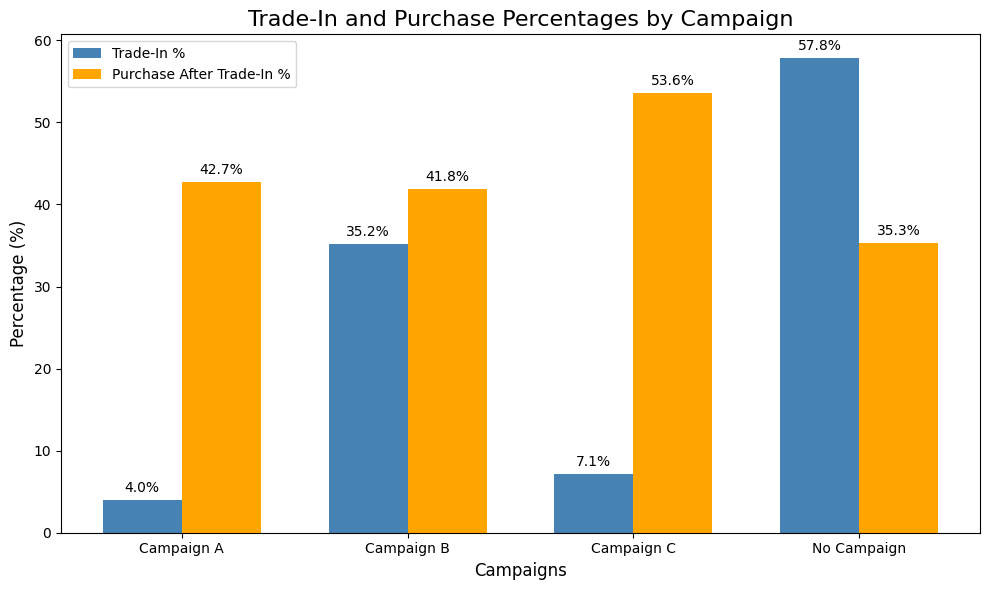

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Data for visualization
campaigns = ['Campaign A', 'Campaign B', 'Campaign C', 'No Campaign']
trade_in_percentages = [percentage_a, percentage_b, percentage_c, percentage_no_campaign]
purchase_percentages = [percentage_a_purchase, percentage_b_purchase, percentage_c_purchase, percentage_no_campaign_and_purchase]

# Create a bar chart
x = np.arange(len(campaigns))  # X-axis positions
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Bar for trade-in percentages
bars1 = ax.bar(x - width / 2, trade_in_percentages, width, label='Trade-In %', color='steelblue')

# Bar for purchase percentages
bars2 = ax.bar(x + width / 2, purchase_percentages, width, label='Purchase After Trade-In %', color='orange')

# Add percentage labels on top of bars
for bar, percentage in zip(bars1, trade_in_percentages):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f"{percentage:.1f}%", ha='center', fontsize=10)

for bar, percentage in zip(bars2, purchase_percentages):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f"{percentage:.1f}%", ha='center', fontsize=10)

# Add labels, title, and legend
ax.set_title('Trade-In and Purchase Percentages by Campaign', fontsize=16)
ax.set_xlabel('Campaigns', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(campaigns)
ax.legend()

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


This visualization highlights the percentage of the trade-in customer segment associated with the four cases—Campaign A, B, C, or no campaign—represented by the blue bars. The yellow bars indicate the conversion percentage of these trade-in customers into purchases for their respective campaigns.

From our initial analysis, we observed that 38% of all trade-ins result in conversions. This visualization further emphasizes that when a trade-in is associated with a campaign, the conversion rate is higher compared to trade-ins that are not connected to any campaign. This suggests that campaigns are effective in driving trade-in conversions.

However, it is also evident that the majority of trade-ins fall under the "no campaign" category, meaning these customers are not under influenced by any targeted marketing efforts. This represents a significant untapped opportunity. By addressing this gap—through tailored campaigns targeting trade-in customers not currently influenced by marketing efforts—there is potential to further increase trade-in conversions.

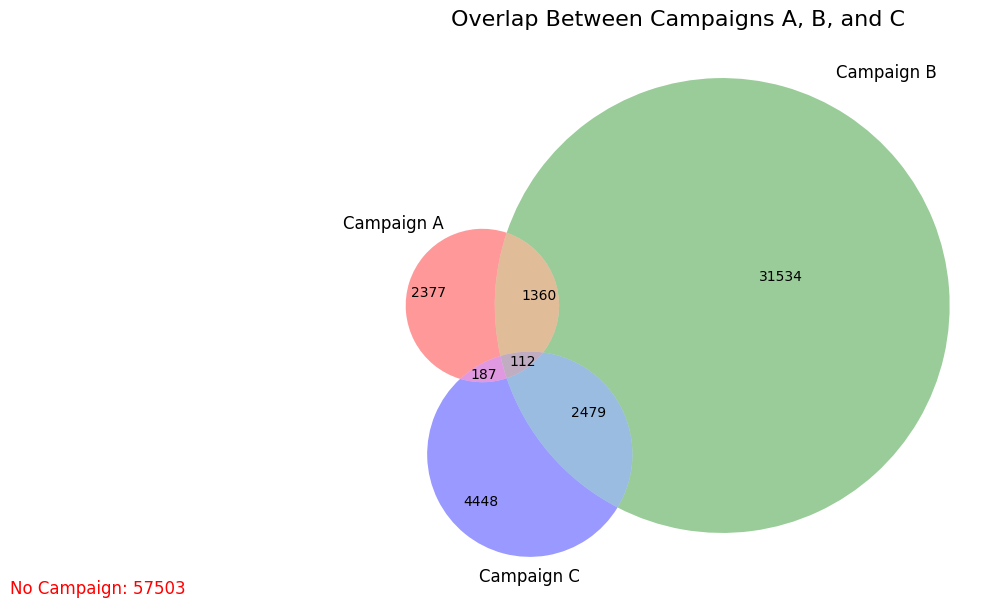

In [6]:
from matplotlib_venn import venn3, venn3_unweighted
import matplotlib.pyplot as plt

# Define conditions for each campaign and no campaign
campaign_a = data['campaign_a_touchpoints'] > 0
campaign_b = data['campaign_b_touchpoints'] > 0
campaign_c = data['campaign_c_touchpoints'] > 0
no_campaign = (data['campaign_a_touchpoints'] == 0) & (data['campaign_b_touchpoints'] == 0) & (data['campaign_c_touchpoints'] == 0)

# Calculate overlaps
only_a = campaign_a & ~campaign_b & ~campaign_c
only_b = campaign_b & ~campaign_a & ~campaign_c
only_c = campaign_c & ~campaign_a & ~campaign_b
a_and_b = campaign_a & campaign_b & ~campaign_c
a_and_c = campaign_a & ~campaign_b & campaign_c
b_and_c = ~campaign_a & campaign_b & campaign_c
all_three = campaign_a & campaign_b & campaign_c
no_overlap = no_campaign

# Counts for the Venn diagram
venn_counts = {
    '100': only_a.sum(),
    '010': only_b.sum(),
    '001': only_c.sum(),
    '110': a_and_b.sum(),
    '101': a_and_c.sum(),
    '011': b_and_c.sum(),
    '111': all_three.sum()
}

# Create the Venn diagram
plt.figure(figsize=(10, 8))
venn = venn3(
    subsets=venn_counts,
    set_labels=('Campaign A', 'Campaign B', 'Campaign C')
)

# Annotate the "No Campaign" data outside the Venn diagram
plt.text(-1.5, -0.6, f'No Campaign: {no_overlap.sum()}', fontsize=12, color='red')

# Add a title
plt.title('Overlap Between Campaigns A, B, and C', fontsize=16)

# Display the plot
plt.tight_layout()
plt.show()


This visualization is fascinating as it highlights the overlap of customers influenced by multiple marketing campaigns—Campaigns A, B, and C. It also illustrates the relative size and reach of each campaign, with Campaign B standing out as having the most extensive reach, as seen in its significantly larger area compared to Campaigns A and C.

This suggests potential redundancy in marketing efforts, as some customers are being targeted multiple times. To determine whether this overlap is beneficial, let us analyze the conversion rates to understand if it positively impacts overall performance.

In [14]:
# Understanding conversion rates at the intersections with exclusions
# Function to calculate conversion rate for a given filter
def calculate_conversion_rate(data, filter_condition):
    filtered_data = data[filter_condition]
    total = filtered_data.shape[0]
    purchases = filtered_data[filtered_data['purchase_flag'] == 1].shape[0]
    conversion_rate = (purchases / total) * 100 if total > 0 else 0
    return total, purchases, conversion_rate

# Define filters for each condition
filter_all_campaigns = (
    (data['campaign_a_touchpoints'] > 0) &
    (data['campaign_b_touchpoints'] > 0) &
    (data['campaign_c_touchpoints'] > 0)
)

# Define filter to exclude all three campaigns having touchpoints > 0
exclude_all_campaigns = ~(
    (data['campaign_a_touchpoints'] > 0) &
    (data['campaign_b_touchpoints'] > 0) &
    (data['campaign_c_touchpoints'] > 0)
)

# Define filters for each condition with exclusions
filter_campaign_a_b = (
    (data['campaign_a_touchpoints'] > 0) &
    (data['campaign_b_touchpoints'] > 0) &
    exclude_all_campaigns
)

filter_campaign_a_c = (
    (data['campaign_a_touchpoints'] > 0) &
    (data['campaign_c_touchpoints'] > 0) &
    exclude_all_campaigns
)

filter_campaign_b_c = (
    (data['campaign_b_touchpoints'] > 0) &
    (data['campaign_c_touchpoints'] > 0) &
    exclude_all_campaigns
)

# Calculate conversion rates
results = {
    "All Campaigns": calculate_conversion_rate(data, filter_all_campaigns),
    "Campaign A & B": calculate_conversion_rate(data, filter_campaign_a_b),
    "Campaign A & C": calculate_conversion_rate(data, filter_campaign_a_c),
    "Campaign B & C": calculate_conversion_rate(data, filter_campaign_b_c)
}

# Display results
for campaign, (total, purchases, rate) in results.items():
    print(f"{campaign}:")
    print(f"  Total interactions: {total}")
    print(f"  Total purchases: {purchases}")
    print(f"  Conversion rate: {rate:.2f}%\n")


All Campaigns:
  Total interactions: 112
  Total purchases: 85
  Conversion rate: 75.89%

Campaign A & B:
  Total interactions: 1360
  Total purchases: 477
  Conversion rate: 35.07%

Campaign A & C:
  Total interactions: 187
  Total purchases: 71
  Conversion rate: 37.97%

Campaign B & C:
  Total interactions: 2479
  Total purchases: 1221
  Conversion rate: 49.25%



The conversion rates provide significant insights. The "All Campaigns" overlap, where customers were targeted by all three campaigns, shows an impressive conversion rate of 75.8%, which is well above the overall conversion rate of 30%.

These findings highlight that customers targeted by multiple campaigns are significantly more likely to convert compared to the average. This suggests that overlapping campaigns are indeed beneficial for CarMax, as they appear to reinforce the marketing message, improve reach, and drive higher engagement.

<ipython-input-10-15b2ef0773d1>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=purchaser_counts, x='Touchpoints', y='Count', palette='viridis', ax=axes[0])
<ipython-input-10-15b2ef0773d1>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=non_purchaser_counts, x='Touchpoints', y='Count', palette='plasma', ax=axes[1])


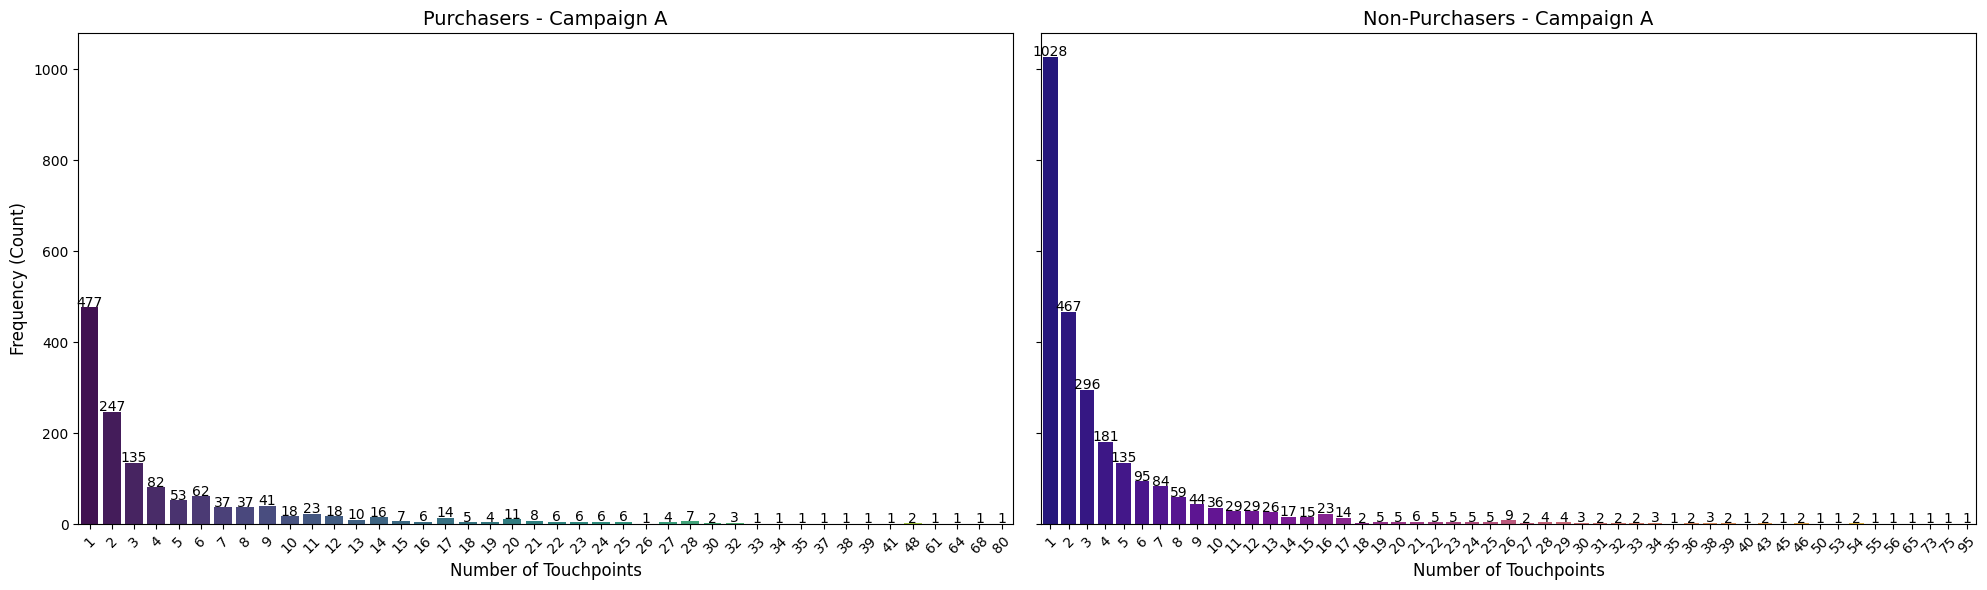

<ipython-input-10-15b2ef0773d1>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=purchaser_counts, x='Touchpoints', y='Count', palette='viridis', ax=axes[0])
<ipython-input-10-15b2ef0773d1>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=non_purchaser_counts, x='Touchpoints', y='Count', palette='plasma', ax=axes[1])


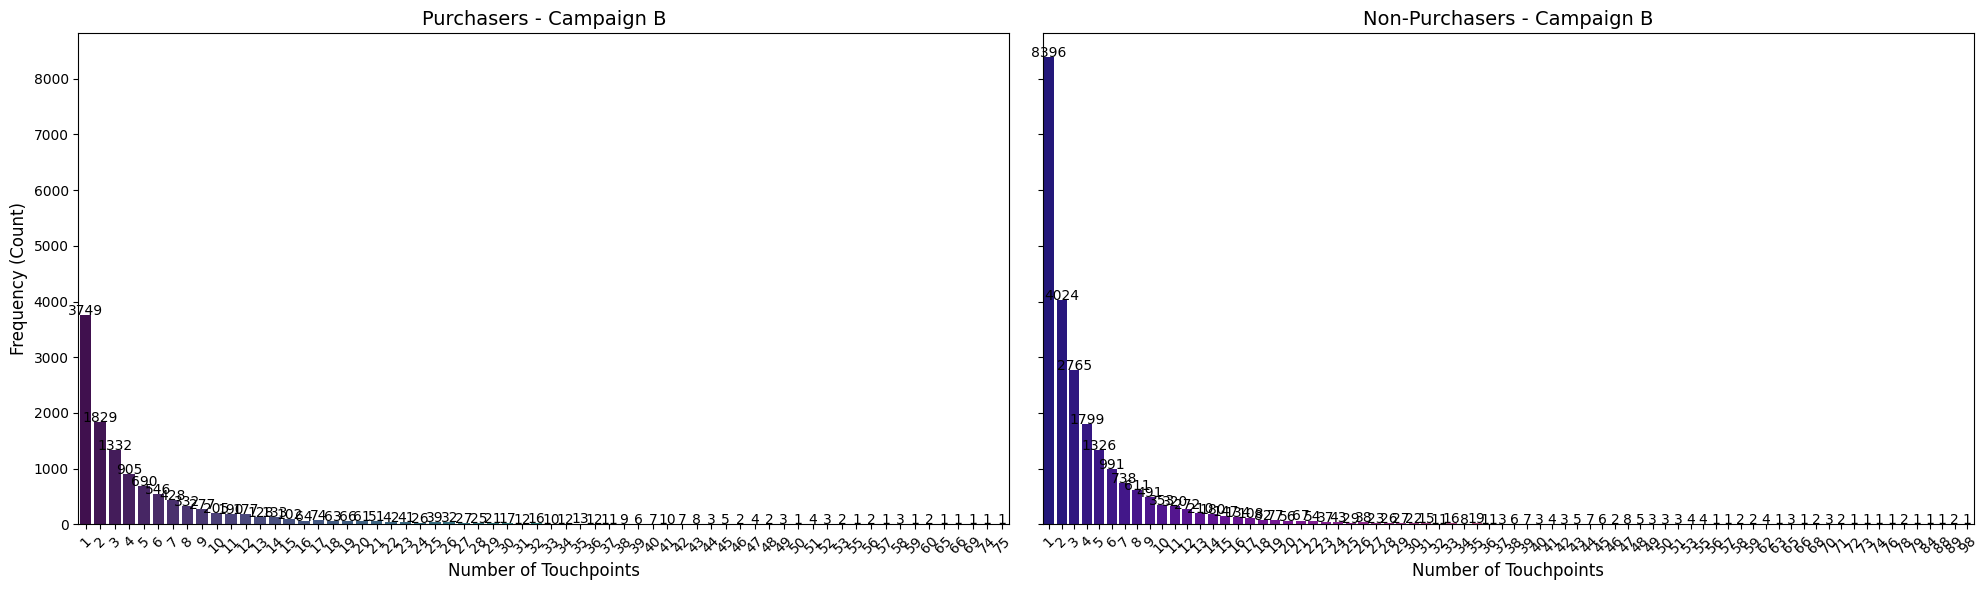

<ipython-input-10-15b2ef0773d1>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=purchaser_counts, x='Touchpoints', y='Count', palette='viridis', ax=axes[0])
<ipython-input-10-15b2ef0773d1>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=non_purchaser_counts, x='Touchpoints', y='Count', palette='plasma', ax=axes[1])


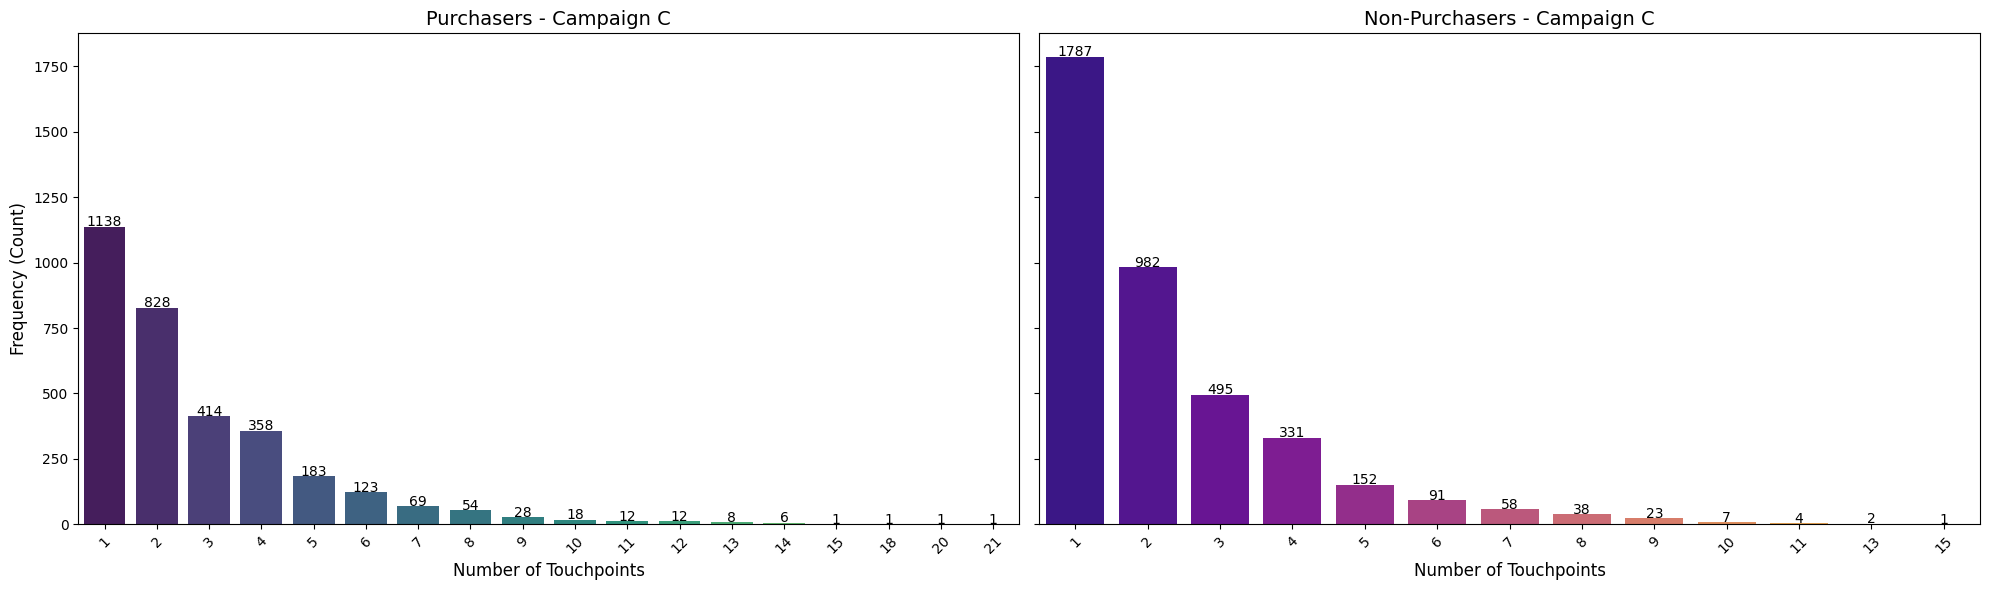

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a function to calculate and visualize touchpoint distribution for purchasers and non-purchasers
def analyze_touchpoints_side_by_side(touchpoint_column, campaign_name):
    # Filter touchpoints for purchasers where touchpoints > 0
    purchasers_data = data[(data['purchase_flag'] == 1) & (data[touchpoint_column] > 0)]
    purchaser_counts = purchasers_data[touchpoint_column].value_counts().reset_index()
    purchaser_counts.columns = ['Touchpoints', 'Count']
    purchaser_counts = purchaser_counts.sort_values(by='Touchpoints').reset_index(drop=True)

    # Filter touchpoints for non-purchasers where touchpoints > 0
    non_purchasers_data = data[(data['purchase_flag'] == 0) & (data[touchpoint_column] > 0)]
    non_purchaser_counts = non_purchasers_data[touchpoint_column].value_counts().reset_index()
    non_purchaser_counts.columns = ['Touchpoints', 'Count']
    non_purchaser_counts = non_purchaser_counts.sort_values(by='Touchpoints').reset_index(drop=True)

    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
    sns.barplot(data=purchaser_counts, x='Touchpoints', y='Count', palette='viridis', ax=axes[0])
    sns.barplot(data=non_purchaser_counts, x='Touchpoints', y='Count', palette='plasma', ax=axes[1])

    # Add labels to purchaser bars
    for i, row in purchaser_counts.iterrows():
        axes[0].text(i, row['Count'] + 1, f"{row['Count']}", ha='center', fontsize=10)

    # Add labels to non-purchaser bars
    for i, row in non_purchaser_counts.iterrows():
        axes[1].text(i, row['Count'] + 1, f"{row['Count']}", ha='center', fontsize=10)

    # Titles and labels
    axes[0].set_title(f'Purchasers - {campaign_name}', fontsize=14)
    axes[0].set_xlabel('Number of Touchpoints', fontsize=12)
    axes[0].set_ylabel('Frequency (Count)', fontsize=12)
    axes[0].tick_params(axis='x', rotation=45)

    axes[1].set_title(f'Non-Purchasers - {campaign_name}', fontsize=14)
    axes[1].set_xlabel('Number of Touchpoints', fontsize=12)
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Analyze for Campaign A
analyze_touchpoints_side_by_side('campaign_a_touchpoints', 'Campaign A')

# Analyze for Campaign B
analyze_touchpoints_side_by_side('campaign_b_touchpoints', 'Campaign B')

# Analyze for Campaign C
analyze_touchpoints_side_by_side('campaign_c_touchpoints', 'Campaign C')


In [ ]:
# Calculate counts for each condition
purchase_with_web_visits = data[(data['purchase_flag'] == 1) & (data['num_web_visits'] > 0)].shape[0]
purchase_without_web_visits = data[(data['purchase_flag'] == 1) & (data['num_web_visits'] == 0)].shape[0]
no_purchase_with_web_visits = data[(data['purchase_flag'] == 0) & (data['num_web_visits'] > 0)].shape[0]
no_purchase_without_web_visits = data[(data['purchase_flag'] == 0) & (data['num_web_visits'] == 0)].shape[0]

# Total for percentage calculation
total_count = (
    purchase_with_web_visits +
    purchase_without_web_visits +
    no_purchase_with_web_visits +
    no_purchase_without_web_visits
)

# Calculate percentages
percentages = [
    (purchase_with_web_visits / total_count) * 100,
    (purchase_without_web_visits / total_count) * 100,
    (no_purchase_with_web_visits / total_count) * 100,
    (no_purchase_without_web_visits / total_count) * 100
]

# Create a summary table
summary_table = pd.DataFrame({
    'Metric': [
        'Purchases with Web Visits',
        'Purchases without Web Visits',
        'No Purchases with Web Visits',
        'No Purchases without Web Visits'
    ],
    'Count': [
        purchase_with_web_visits,
        purchase_without_web_visits,
        no_purchase_with_web_visits,
        no_purchase_without_web_visits
    ],
    'Percentage (%)': percentages
})

# Display the summary table
print(summary_table)


                            Metric  Count  Percentage (%)
0        Purchases with Web Visits  30003          30.003
1     Purchases without Web Visits      0           0.000
2     No Purchases with Web Visits  69997          69.997
3  No Purchases without Web Visits      0           0.000


Upon reviewing the web visit data, it is evident that every observation includes at least one recorded website visit to CarMax.

<ipython-input-12-90e1eb9a6375>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=purchaser_counts, x='Num Web Visits', y='Count', palette='viridis', ax=axes[0])
<ipython-input-12-90e1eb9a6375>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=non_purchaser_counts, x='Num Web Visits', y='Count', palette='plasma', ax=axes[1])


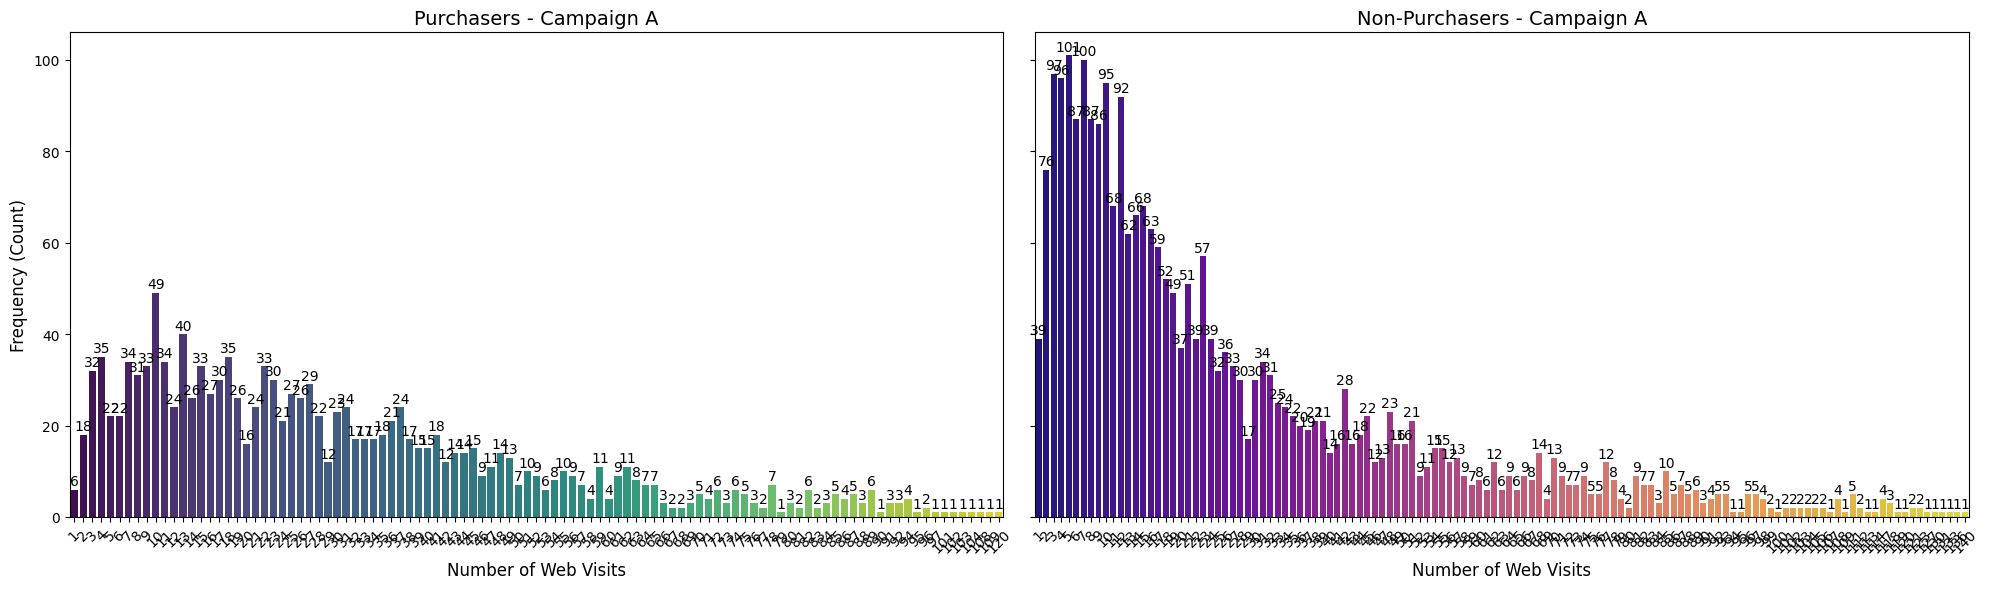

<ipython-input-12-90e1eb9a6375>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=purchaser_counts, x='Num Web Visits', y='Count', palette='viridis', ax=axes[0])
<ipython-input-12-90e1eb9a6375>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=non_purchaser_counts, x='Num Web Visits', y='Count', palette='plasma', ax=axes[1])


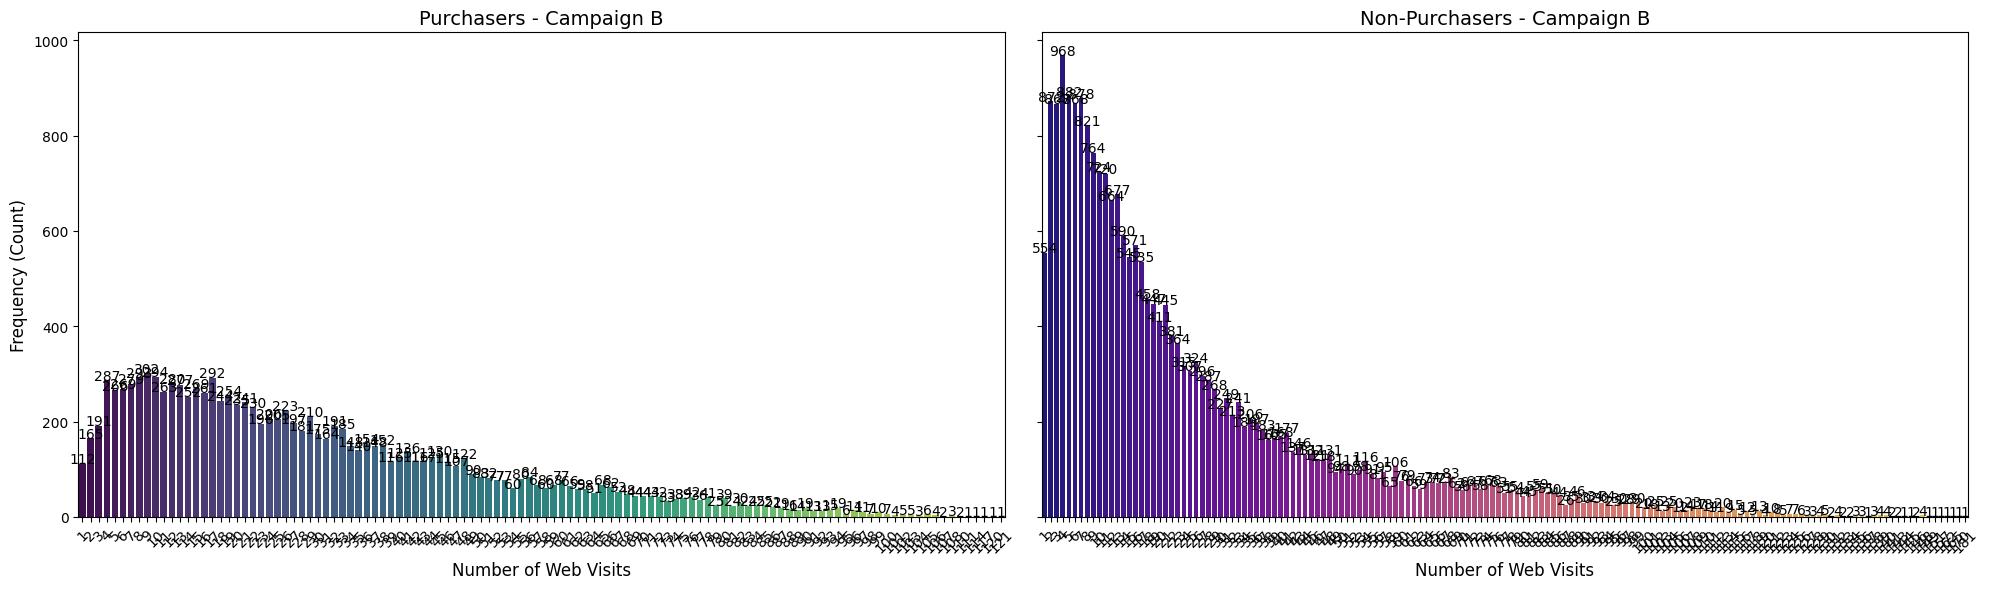

<ipython-input-12-90e1eb9a6375>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=purchaser_counts, x='Num Web Visits', y='Count', palette='viridis', ax=axes[0])
<ipython-input-12-90e1eb9a6375>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=non_purchaser_counts, x='Num Web Visits', y='Count', palette='plasma', ax=axes[1])


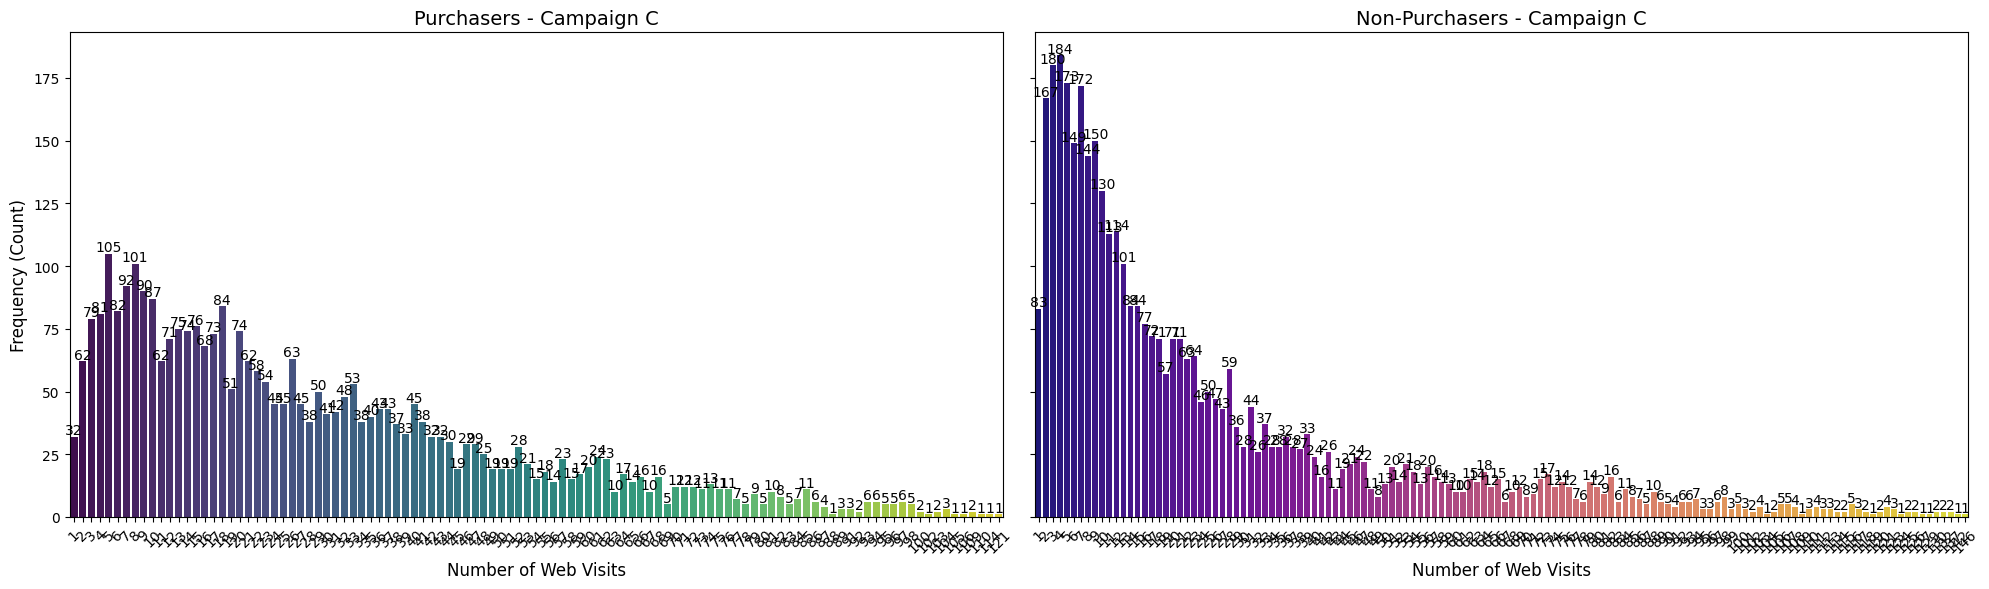

<ipython-input-12-90e1eb9a6375>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=purchaser_counts, x='Num Web Visits', y='Count', palette='viridis', ax=axes[0])
<ipython-input-12-90e1eb9a6375>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=non_purchaser_counts, x='Num Web Visits', y='Count', palette='plasma', ax=axes[1])


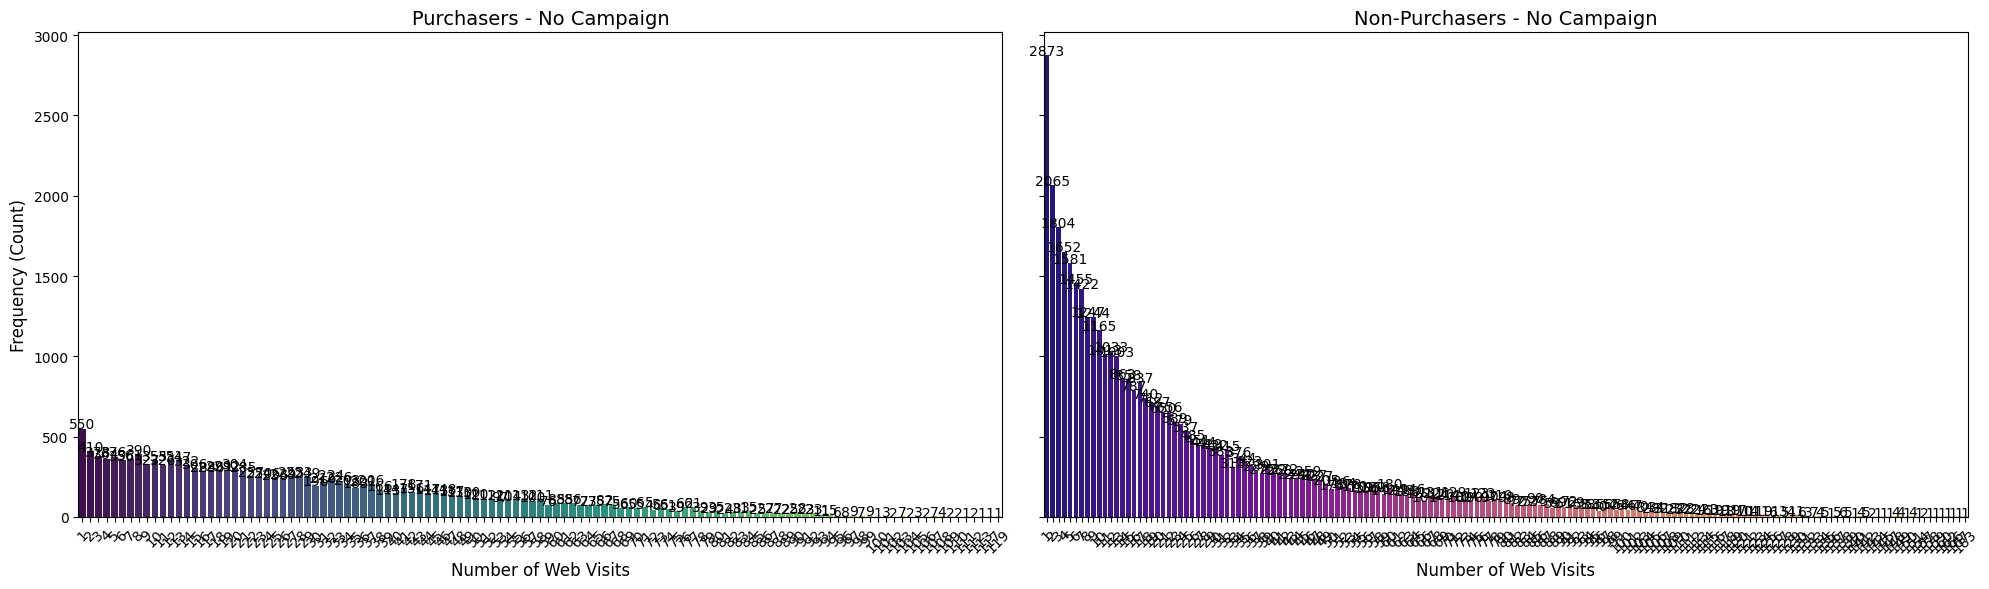

In [12]:
# Create a function to calculate and visualize num_web_visits distribution for purchasers and non-purchasers
def analyze_web_visits_side_by_side(campaign_filter, campaign_name):
    # Filter data for purchasers and non-purchasers based on the campaign filter
    purchasers_data = data[(data['purchase_flag'] == 1) & campaign_filter]
    purchaser_counts = purchasers_data['num_web_visits'].value_counts().reset_index()
    purchaser_counts.columns = ['Num Web Visits', 'Count']
    purchaser_counts = purchaser_counts.sort_values(by='Num Web Visits').reset_index(drop=True)

    non_purchasers_data = data[(data['purchase_flag'] == 0) & campaign_filter]
    non_purchaser_counts = non_purchasers_data['num_web_visits'].value_counts().reset_index()
    non_purchaser_counts.columns = ['Num Web Visits', 'Count']
    non_purchaser_counts = non_purchaser_counts.sort_values(by='Num Web Visits').reset_index(drop=True)

    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
    sns.barplot(data=purchaser_counts, x='Num Web Visits', y='Count', palette='viridis', ax=axes[0])
    sns.barplot(data=non_purchaser_counts, x='Num Web Visits', y='Count', palette='plasma', ax=axes[1])

    # Add labels to purchaser bars
    for i, row in purchaser_counts.iterrows():
        axes[0].text(i, row['Count'] + 1, f"{row['Count']}", ha='center', fontsize=10)

    # Add labels to non-purchaser bars
    for i, row in non_purchaser_counts.iterrows():
        axes[1].text(i, row['Count'] + 1, f"{row['Count']}", ha='center', fontsize=10)

    # Titles and labels
    axes[0].set_title(f'Purchasers - {campaign_name}', fontsize=14)
    axes[0].set_xlabel('Number of Web Visits', fontsize=12)
    axes[0].set_ylabel('Frequency (Count)', fontsize=12)
    axes[0].tick_params(axis='x', rotation=45)

    axes[1].set_title(f'Non-Purchasers - {campaign_name}', fontsize=14)
    axes[1].set_xlabel('Number of Web Visits', fontsize=12)
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Analyze for Campaign A
analyze_web_visits_side_by_side(data['campaign_a_touchpoints'] > 0, 'Campaign A')

# Analyze for Campaign B
analyze_web_visits_side_by_side(data['campaign_b_touchpoints'] > 0, 'Campaign B')

# Analyze for Campaign C
analyze_web_visits_side_by_side(data['campaign_c_touchpoints'] > 0, 'Campaign C')

# Analyze for No Campaign
no_campaign_filter = (
    (data['campaign_a_touchpoints'] == 0) &
    (data['campaign_b_touchpoints'] == 0) &
    (data['campaign_c_touchpoints'] == 0)
)
analyze_web_visits_side_by_side(no_campaign_filter, 'No Campaign')


These graphs provide a compelling visual illustration of customer behavior, distinguishing between purchasers and non-purchasers and highlighting the influence of marketing campaigns versus no campaign influence.

**Non-Purchasers:**

The graph exhibits a sharp initial peak, indicating that many users interact briefly with the website before disengaging. This sharp decline suggests limited sustained engagement among non-purchasers.

For campaigns (A, B, C), we notice a clear "awareness period" where web visits increase before tapering off. However, this awareness phase is absent in the "No Campaign" segment, where the graph falls sharply without any significant rise.

**Purchasers:**
Unlike non-purchasers, the purchaser graphs demonstrate a smoother and longer-lasting engagement curve. This gradual decline implies that purchasers take their time exploring the website before making a decision.
Campaign-driven purchasers show an initial growth in visits, reflecting a period of awareness or interest generation before conversions occur. In contrast, "No Campaign" purchasers show a consistently declining curve without a noticeable rise in visits, indicating limited external triggers influencing their behavior.

The "No Campaign" audience, while contributing to conversions, lacks engagement opportunities that campaigns provide. Introducing awareness-driving mechanisms, even minimal ones like personalized email follow-ups or targeted ads, could capitalize on this untapped potential.

**Key Insights:**

Purchaser Behavior:

Conversions are not necessarily tied to a high number of touchpoints. Many customers convert after minimal interaction (1-3 touchpoints), indicating that Campaign A is effective at engaging some individuals quickly.

Non-Purchaser Behavior:

Non-purchasers also show significant engagement, with many interacting with Campaign A multiple times. For instance, some observations reach as many as 95 touchpoints without converting. This highlights that non-purchasers were considering purchasing but chose to back off at some point, which reflects untapped potential for conversion.

**Opportunities for Targeted Re-engagement:**

Remarketing Campaigns: Target customers with high touchpoints but no conversions with personalized ads, discounts, or incentives to re-engage and drive purchase decisions. Trigger-Based Messaging: Use automated triggers after specific numbers of touchpoints (e.g., 5, 10, or 20) to send tailored content such as testimonials, vehicle promotions, or limited-time offers. Identify Drop-Off Points: Analyze customer journeys to understand where and why customers stop engaging, and address these friction points (e.g., price sensitivity, lack of information).

# Inventory and Marketing Suggestions

To maximize sales at CarMax's new stores, the following inventory and marketing suggestions can be implemented:

**Inventory Suggestions**

**Focus on High-Demand Vehicle Types:**
Since we’ve observed that Small SUVs and Medium SUVs are consistently the top two most purchased vehicle types across all states, we should prioritize stocking these vehicles in the new stores to meet universal customer demand.

**Regional Adjustment for Third-Position Vehicles:**
Because the third most purchased vehicle type varies by state (e.g., Pickup trucks, Compact cars, Luxury cars, or Mid-size cars), we should fine-tune the inventory for new stores based on regional preferences to optimize sales.

**Standardize Inventory for Low-Demand Vehicles:**
Since Large SUVs, Vans, Sports Cars, Full-Size, and Mid-Size cars consistently occupy the bottom positions across states, we should limit stocking these vehicle types in new stores to avoid overstocking low-demand items.

**Prepare for Financing Preferences:**
Because 75% of transactions are financed purchases, we should ensure that the inventory strategy aligns with this preference, focusing on vehicles that appeal to financing customers, such as Small and Medium SUVs.

**Regional Focus on Outright Purchases:**
Since outright purchases vary across states (e.g., Idaho has the highest at 35%, Mississippi the lowest at 16%), we should consider these variations when planning inventory for states with a higher inclination toward outright payments.

**Prepare for Service Plan Purchases:**
Since we’ve noticed that up to 70% of purchasers opt for a service plan and that service plans are more commonly included with financed purchases, we should ensure a good supply of service plans and design processes to integrate them seamlessly into financed transactions.

**Cater to Trade-In Customers:**
Because 27% of purchases involve trade-ins and 38% of trade-in customers proceed to purchase, we should maintain an inventory that appeals to trade-in customers, focusing on high-demand vehicles like Small SUVs and Medium SUVs, which are likely to convert trade-ins into purchases.



**Marketing Suggestions**



**Leverage Campaigns B and C:**
Since we’ve observed that Campaigns B and C achieve conversion rates of 33% and 45%, respectively, we should prioritize a combination of these campaigns in new states. Campaign B’s wider reach and Campaign C’s higher conversion rate make them complementary for maximizing awareness and conversions.

**Optimize "No Campaign" Opportunities:**
Since the "No Campaign" group accounts for more conversions than Campaign B despite its lower conversion rate, we should identify what drives these organic engagements.

**Combine Campaign Overlaps for Higher Impact:**
Since customers exposed to multiple campaigns tend to convert at a higher rate (up to 75.8%), we should explore overlapping Campaigns B and C in targeted marketing strategies. This could involve unified messaging across digital, social media, and traditional channels.

**Invest in Awareness-First Strategies:**
Because we noticed the "awareness period" in campaigns drives initial interest, the new stores should employ early-stage marketing tactics such as teaser campaigns, local events, and introductory offers to spark curiosity and drive foot traffic.

**Engage the Untapped "No Campaign" Trade-In Segment:**
Since a significant percentage of trade-ins occur without campaign influence, new stores should focus on localized marketing strategies to engage this audience. Utilize targeted ads, email campaigns, and in-store promotions to encourage trade-in customers to convert to purchases.

**Replicate the Success of Campaign C:**
As Campaign C demonstrates the highest purchase-after-trade-in percentage, new stores should analyze and adopt similar messaging and strategies for their local markets. Emphasize clear, compelling trade-in benefits tailored to regional preferences.

**Develop Trade-In Focused Campaigns for New Markets:**
Since trade-ins serve as a valuable customer engagement point, new stores should implement campaigns exclusively promoting the trade-in process. Highlight features like instant appraisals, flexible financing options, and the ease of upgrading vehicles.

**Leverage Overlapping Campaign Strategies:**
Since customers targeted by all three campaigns (A, B, and C) exhibit an impressive 75.8% conversion rate, new stores should adopt an overlapping campaign approach. Coordinate messaging across campaigns to reinforce brand awareness and drive higher engagement among potential customers.

**Introduce Awareness Periods for Untargeted Audiences:**
Since "No Campaign" purchasers lack engagement opportunities, new stores should implement minimal awareness mechanisms, such as personalized email follow-ups, targeted ads, or in-store promotions. These efforts can bridge the engagement gap and convert untapped potential into actual sales.

**Target Non-Purchasers with Re-Engagement Strategies:**
Since many non-purchasers interact significantly with campaigns before disengaging, new stores should implement remarketing campaigns targeting these individuals. Offer tailored incentives such as discounts, exclusive offers, or educational content to encourage conversion.



